# HOUSE PRICES: ADVANCED REGRESSION TECHNIQUES

**Summary**

<p>'House Prices: Advanced Regression Techniques' is one of the most engaging Kaggle challenges that helps competitors developing their skills in solving problems using Machine-Learning algorithms. This challenge is all about predicting the sale-price of a house in Ames, Iowa based on the provided information about many key-factors that may have influence on the price of the houses. Therefore, it is a regression problem and the task here is to minimize the error of prediction. Stacking and ensembling of many algorithms have also been implemented to achieve better accuracy. A lot of emphasis has been given to feature-engineering. Therefore this section is the largest part of the kernel. The key steps of the kernel are listed below:</p>
<ui>
    <li>1. Importing Libraries and Datasets</li>
    <li>2. Dataset Visualization</li>
    <li>3. Separating ID Column</li>
    <li>4. Removing Outliers</li>
    <li>5. Normalizing Label-Column</li>
    <li>6. Concatenating Train and Test Datasets</li>
    <li>7. Dealing with missing Values</li>
    <li>8. Feature Engineering</li>
    <li>9. Handling Skewness</li>
   <li>10. Recreating Train and Test DB</li>
   <li>11. Regressor Models Implementation</li>
   <li>12. DNN Implementation</li>
   <li>13. Conclusion</li>
</ui>   

**Step1: Importing Libraries and Datasets**

**1.1 Connecting Co-lab to Google-drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.2 Importing Mathematical & Statistical Packages**

In [3]:
# PANDAS FOR DATA MANIPULATION
import pandas as pd

# NUMPY FOR MATHEMATICAL COMPUTATION 
import numpy as np

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
print('Packages for Mathematical Computation and visualization imported!')

# STATISTICAL MODULES USED FOR TRANSFORMATIONS
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

Packages for Mathematical Computation and visualization imported!
Statistical packages imported!


**1.3 Importing Algorithm Model Packages**

In [4]:
# ALGORITHMS USED FOR MODELING
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
print('Algorithm packages imported!')

# PIPELINE AND SCALING PREPROCESSING
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

# MODEL SELECTION PACKAGES USED FOR SAMPLING DATASET AND OPTIMISING PARAMETERS
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

Algorithm packages imported!
Pipeline and preprocessing packages imported!
Model selection packages imported!


**1.4 Importing Datasets**

In [5]:
# TO IGNORE ANNOYING WARNING
import warnings
warnings.filterwarnings('ignore')

# LIMITING FLOATS OUTPUT TO 3 DECIMAL POINTS
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x)) 

# SHOWING AVAILABLE FILES IN THE DIRECTORY
from subprocess import check_output
print(check_output(['ls', '/content/drive/My Drive/housePrice/hpdb']).decode('utf8'))

# IMPORTING TRAIN AND TEST DATASETS AS PANDAS DATA-FRAME
train = pd.read_csv('/content/drive/My Drive/housePrice/hpdb/train.csv')
test = pd.read_csv('/content/drive/My Drive/housePrice/hpdb/test.csv')
print('Train and Test Dataset Imported!')


a2q.csv
aqa.csv
l211.csv
test.csv
train.csv
z2.csv
z3.csv
z4.csv

Train and Test Dataset Imported!


**Step2: Dataset Visualization**
<p>Lets visualize the initial rows of train and test datasets</p>

In [6]:
pd.set_option('display.max_columns', None)
print('5 rows of Train dataset:')
train.head()

5 rows of Train dataset:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL      65.0000     8450   Pave   NaN      Reg   
1   2          20       RL      80.0000     9600   Pave   NaN      Reg   
2   3          60       RL      68.0000    11250   Pave   NaN      IR1   
3   4          70       RL      60.0000     9550   Pave   NaN      IR1   
4   5          60       RL      84.0000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    196.0000        Gd        TA      PConc       Gd       TA           No   
1      0.0000        TA        TA     CBlock       Gd       TA           Gd   
2    162.0000        Gd        TA      PConc       Gd       TA           Mn   
3      0.0000        TA        TA     BrkTil       TA       Gd           No   
4    350.0000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
print('5 rows of Test dataset:')
test.head()

5 rows of Test dataset:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH      80.0000    11622   Pave   NaN      Reg   
1  1462          20       RL      81.0000    14267   Pave   NaN      IR1   
2  1463          60       RL      74.0000    13830   Pave   NaN      IR1   
3  1464          60       RL      78.0000     9978   Pave   NaN      IR1   
4  1465         120       RL      43.0000     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      0.0000        TA        TA     CBlock       TA       TA           No   
1    108.0000        TA        TA     CBlock       TA       TA           No   
2      0.0000        TA        TA      PConc       Gd       TA           No   
3     20.0000        TA        TA      PConc       TA       TA           No   
4      0.0000        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec    468.0000          LwQ    144.0000   270.0000     882.0000   
1          ALQ    923.0000          Unf      0.0000   406.0000    1329.0000   
2          GLQ    791.0000          Unf      0.0000   137.0000     928.0000   
3          GLQ    602.0000          Unf      0.0000   324.0000     926.0000   
4          ALQ    263.0000          Unf      0.0000  1017.0000    1280.0000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896        0.0000        0.0000         1         0             2   
1       1329        0.0000        0.0000         1         1             3   
2       1629        0.0000        0.0000         2         1             3   
3       1604        0.0000        0.0000         2         1             3   
4       1280        0.0000        0.0000         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [0]:
# KEEPING A COPY OF TRAIN AND TEST DB FOR FURTHER USAGE
rawTrain = train.copy()
rawTest = test.copy()

**Step3: Separating ID Column**
<p>Now we will separate the ID column that represents serial numbers</p>

In [0]:
# STORING NUMBER OF ROWS AND COLUMNS IN LISTS
train_shape_list=[]
test_shape_list=[]
train_shape_list.append(train.shape)
test_shape_list.append(test.shape)

# SAVING ID COLUMNS
train_ID = train['Id']
test_ID = test['Id']

# DROPPING ID COLUMNS FROM DATASETS
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

# MAKING A SERIES TO SHOW WHETHER ID IS REMOVED OR NOT
id_removal = pd.Series(['before', 'after'])

# STORING SHAPES OF DATASETS AFTER REMOVING ID
train_shape_list.append(train.shape)
test_shape_list.append(test.shape)

# MAKING A DATA-FRAME TO REPRESENT STATUS
data_size_check = pd.DataFrame(
    {'trainDB': train_shape_list,
     'testDB': test_shape_list,
     'ID removal': id_removal
    })
# MAKING A COPY OF DATASETS
trainNoId = train.copy()
testNoId = test.copy()

In [10]:
# SHOWING THE DATAFRAME
print('Size of datasets before and after removing ID Column: ')
data_size_check

Size of datasets before and after removing ID Column: 


ID removal      testDB     trainDB
0     before  (1459, 80)  (1460, 81)
1      after  (1459, 79)  (1460, 80)

**Step 4: Removing Outliers**

**4.1: Separating the numeric columns**
<p>First we will separate the numeric columns and discover how many unique values they have so that we can realize the possibility of having outliers. The more the unique values the higher the possibility</p>

Number of Neumeric Columns =  37


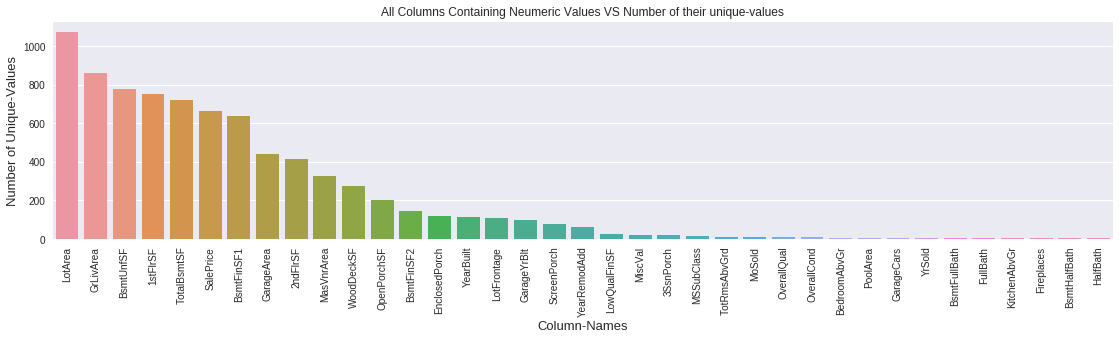

In [11]:
# SEPARATING NUMERIC COLUMNS
numeric_columns = train.select_dtypes(exclude=['object']).columns.values.tolist()
print('Number of Neumeric Columns = ',len(numeric_columns))
unique_values=[]
ninety = 90
for item in numeric_columns: unique_values.append(train[item].nunique())
numeric_column_list = list(zip(numeric_columns, unique_values))
numeric_column_list = sorted(numeric_column_list,key=lambda l:l[1], reverse=True)
numeric_column_list=pd.DataFrame(numeric_column_list, columns=['Column-Names', 'Unique-Values'])

# PLOTTING NUMBER OF UNIQUE-VALUES FOR EACH NUMERIC COLUMNS
plt.subplots(figsize=(19, 4))
sns.barplot(x=numeric_column_list['Column-Names'], y=numeric_column_list['Unique-Values'])
plt.xticks(rotation=ninety)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title('All Columns Containing Neumeric Values VS Number of their unique-values')
plt.show()

<p>It is more certain to find outliers in the neumeric-columns with large number of unique values. Also the existance of outliers in such columns that are highly correlated to target-variable may result in lower accuracy of prediction. So lets select the first 19 features having the largest number of unique-values (upto YearRemodAdd) and Find their corrilation with SalesPrice.</p>

**4.2: Checking the correlation**

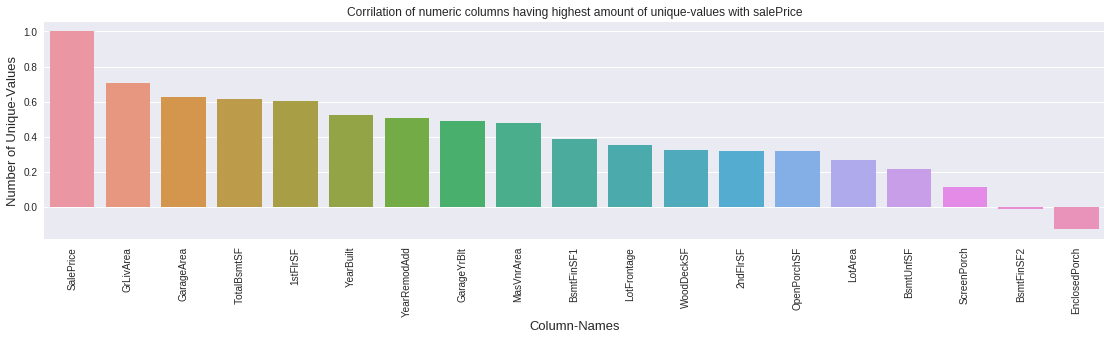

In [12]:
# CHECKING CORRELATION OF THE SELECTED COLUMNS WITH SALEPRICE
highly_unique_columns = numeric_column_list.drop(numeric_column_list[numeric_column_list['Unique-Values'] < 49].index)
cols = highly_unique_columns['Column-Names']
corrs=[]
for item in cols:
    corrs.append((train[item].corr(train['SalePrice'])))
    
# MAKING A DATAFRAME TO STORE THE CORRELATIONS     
ist = pd.DataFrame(
    {'cols': cols,
     'corrs': corrs
    })
ist = ist.sort_values(by='corrs', ascending=False)

# VISUALIZING CORRELATIONS GRAPHICALLY
plt.subplots(figsize=(19, 4))
sns.barplot(x=ist['cols'], y=ist['corrs'])
plt.xticks(rotation=ninety)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title('Corrilation of numeric columns having highest amount of unique-values with salePrice')
plt.show()

<p>As we can see that most of the columns have maintained pretty high corrilation with salePrice except the last few</p>

**4.3: Looking for outliers**
<p>Now we will scatter-polt each of the selected features against salePrice and discover outliers</p>

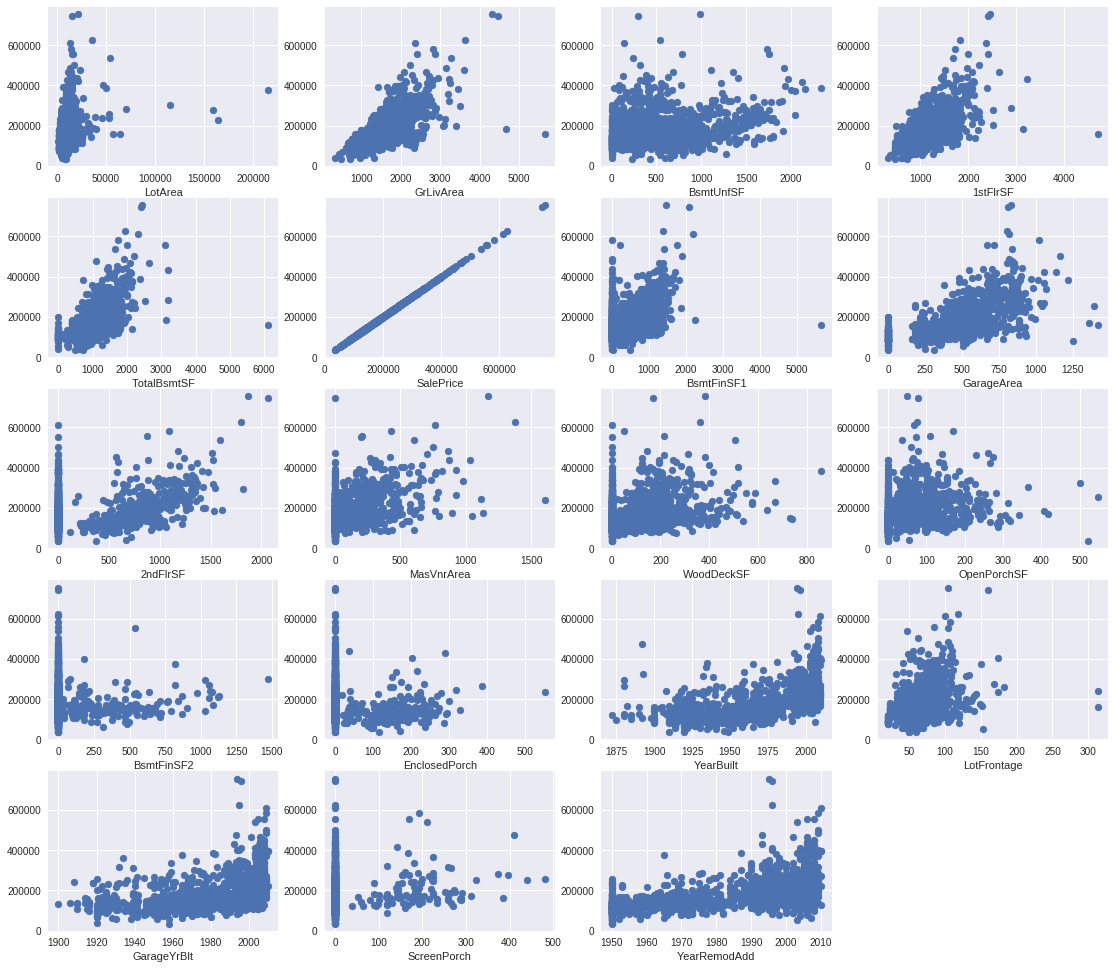

In [13]:
# A FUNCTION TO SCATTER-PLOT ALL SELECTED FEATURES AGAINST SALEPRICE
def relation_with_SalePrice(c,column):
    plt.subplot(5, 4, c)
    plt.scatter(x = train[column], y = train['SalePrice'])
    plt.xlabel(column)    
c=1
plt.subplots(figsize=(19, 17))
for item in cols:
    relation_with_SalePrice(c,item)
    c=c+1
plt.show()

<p>We can see some outliers in 1stFlrSF, BsmtFinSF1, MasVnrArea, LotArea, LotFrontage and GrLivArea columns. and now we will remove them.</p>

**4.4: Removal**
<p>Now we have selected the columns containing outliers and ready to remove them.</p>

**4.4.0 Creating Function to Check Outliers**
<p>Defining a function to check outliers in both train and test datasets</p>

In [0]:
# A FUNCTION THAT SHOWS SCATTER-PLOT AND DISTRIBUTION-PLOT
def outlier_check_plot(column):
    plt.subplots(figsize=(19, 5))
    # SCATTER PLOT OF THE 19 HIGHEST-VALUES OF A COLUMN
    plt.subplot(1, 3, 1)
    plt.scatter(x = train[column].sort_values(ascending=False)[:19], y = train_ID[:19], color='red', label='Train' )
    plt.scatter(x = test[column].sort_values(ascending=False)[:19], y = test_ID[:19], label='Test')
    plt.ylabel('Serial Number', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 1: 19 highest-values of category {} \n in both train and test dataset'.format(column))
    plt.legend(loc='center',fontsize=13)

    # DISTRIBUTION-PLOT OF THE COLUMN
    plt.subplot(1, 3, 2)                                                                                
    sns.distplot(train[column],color='red', rug=True, hist=False, label='Train')
    sns.distplot(test[column], rug=True, hist=False, label='Test')
    plt.ylabel('Distribution', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 2: Distribution-plot of category {} \n for both train and test dataset'.format(column))
    plt.legend(fontsize=13)

    # SCATTER-PLOT OF THE COLUMN WITH RESPECT TO SALEPRICE 
    plt.subplot(1, 3, 3)
    plt.scatter(x = train[column], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 3: Scatter-plot of train-category {} \n with respect to SalePrice'.format(column))
    plt.show()

<p>Removing Outliers is good if there is no or few outliers in test-dataset. Therefore for each column we have checked whether there is any outlier-type data in the testset (left) and then compared the distribution of data for both train and test set to figure out whether they look similar or not (middle). Then finally we checked the saleprice for outlier-values (right)</p>

**4.4.1 1stFlrSF**

Before outlier-removal of 1stFlrSF: 


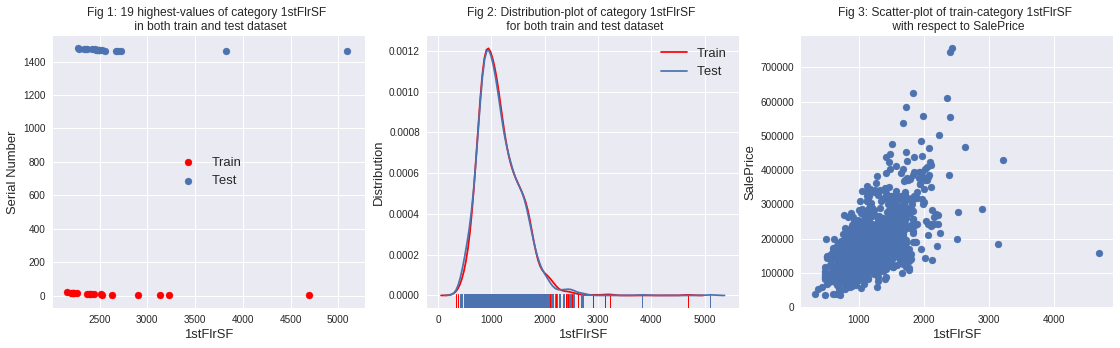

In [15]:
print('Before outlier-removal of 1stFlrSF: ')
outlier_check_plot('1stFlrSF')

<p>We can see one value in train set that is highly contradictory with SalePrice (1stFlrSF is too high but SalePrice is too low). And there is only one such high-value point available in test dataset. So we are willing to remove this outlier</p>

After outlier-removal of 1stFlrSF: 


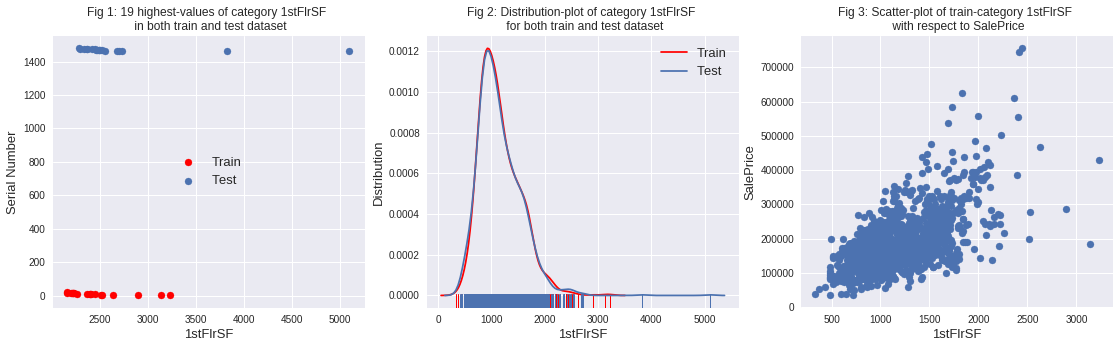

In [16]:
train = train.drop(train[train['1stFlrSF'] > 4000].index)
print('After outlier-removal of 1stFlrSF: ')
outlier_check_plot('1stFlrSF')

**4.4.2 BsmtFinSF1**

Before outlier-removal of BsmtFinSF1: 


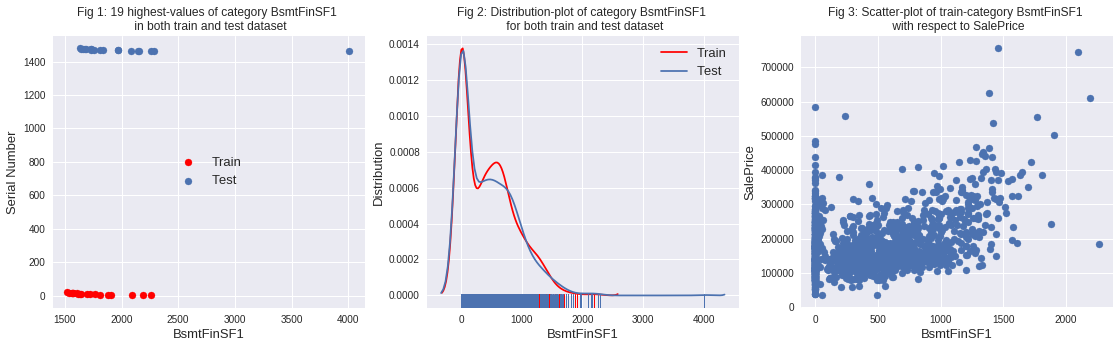

In [17]:
print('Before outlier-removal of BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1')

<p>If we compare Fig. 3 with code-cell 13 we can see that one outlier is already removed from BsmtFinSF1. This is because it was a mutual outlier for both 1stFlrSF and BsmtFinSF1.<br><br> But still there is another value above 2000 in train set that is contradictory with SalePrice (BsmtFinSF1-value is high but SalePrice is low). And there is only one such high-value point available in test dataset. So we are willing to remove it.</p>

After outlier-removal of BsmtFinSF1: 


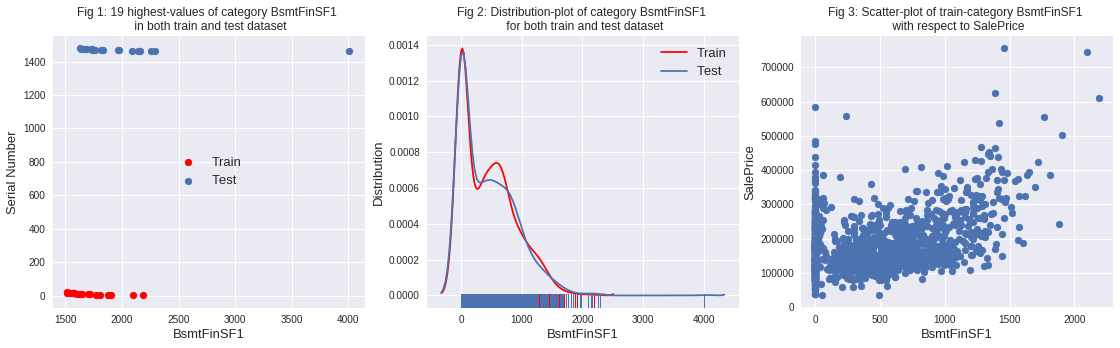

In [18]:
train = train.drop(train[(train['BsmtFinSF1']>2000) & (train['SalePrice']<300000)].index)
print('After outlier-removal of BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1')

<p>Now comparing Fig 1 and 3 between code-cell 17 and 18 we see that there is one dot-point missing after BsmtFinSF1>2000. That was the outlier we removed.</p>

**4.4.3 LotArea**
<p>Lets check scatter-plots and distribution-plots for column- LotArea</p>

Before outlier-removal of LotArea: 


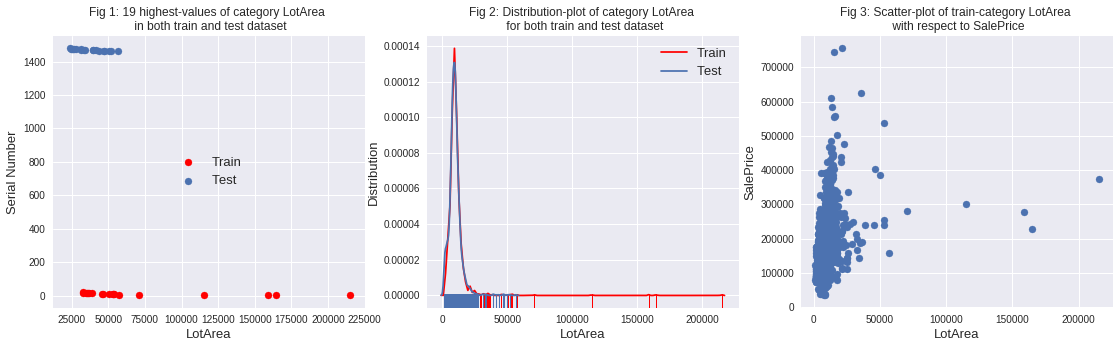

In [19]:
print('Before outlier-removal of LotArea: ')
outlier_check_plot('LotArea')

<p>We can see in Fig 3 that there are 4 LotArea train-samples above 80000 that are very high in size but comperatively very low in SalePrice. Also there are no such values present in test-data: Fig 1. So we will drop them</p>

After outlier-removal of LotArea: 


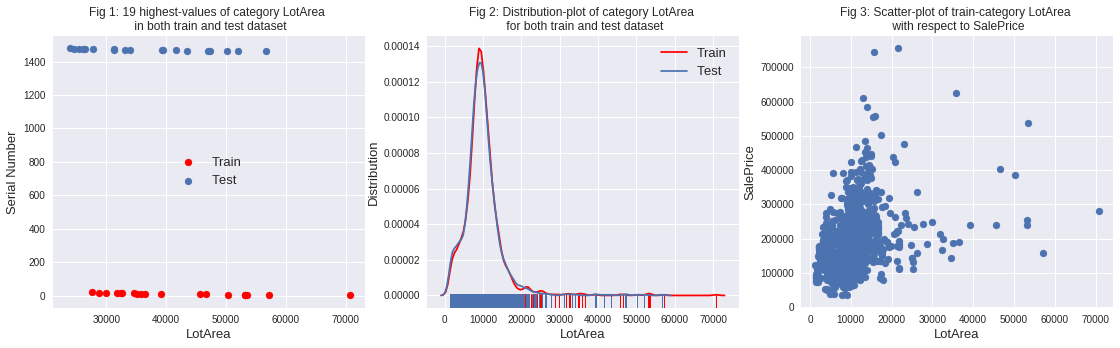

In [20]:
train = train.drop(train[train['LotArea'] > 80000].index)
print('After outlier-removal of LotArea: ')
outlier_check_plot('LotArea')

**4.4.4 GrLivArea**

Before outlier-removal of GrLivArea: 


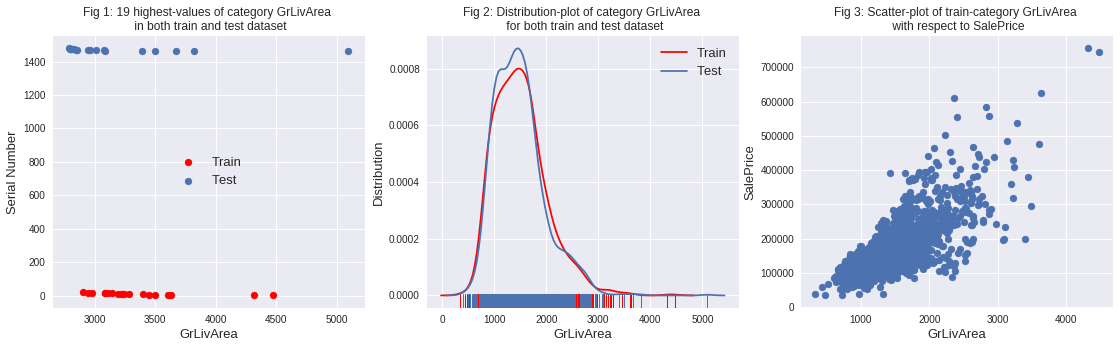

In [21]:
print('Before outlier-removal of GrLivArea: ')
outlier_check_plot('GrLivArea')

<p>If we compare Fig. 3 with code-cell 13 we can see that two outliers are already removed from GrLivArea. These two outliers of GrLivArea train-samples were above 4000 with very low SalePrice (below 300000). But they are already dropped due to being mutual outliers of previous-columns and GrLivArea-column.</p>

**4.4.5 MasVnrArea**

Before outlier-removal of MasVnrArea: 


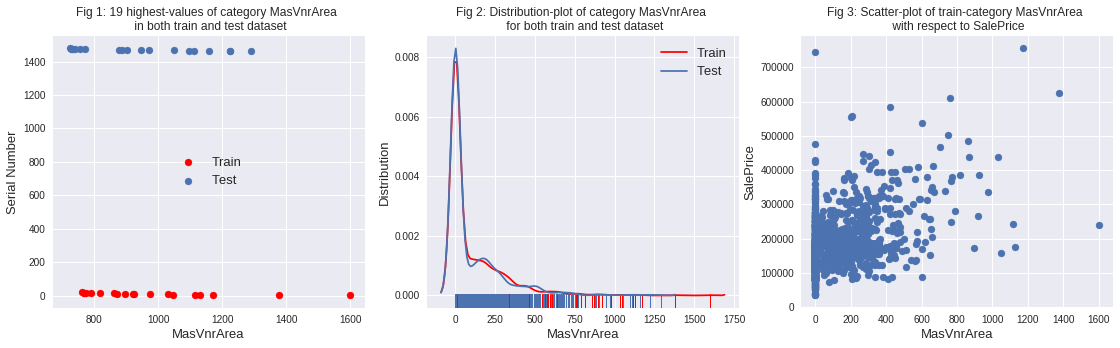

In [22]:
print('Before outlier-removal of MasVnrArea: ')
outlier_check_plot('MasVnrArea')

<p>As we can see in Fig 3 that above 1500 there is 1 MasVnrArea train-samples that are very high in size but comperatively very low in SalePrice (below 300000) and there is no such values present in test-data: Fig 1. So we will drop it.</p>

After outlier-removal of MasVnrArea: 


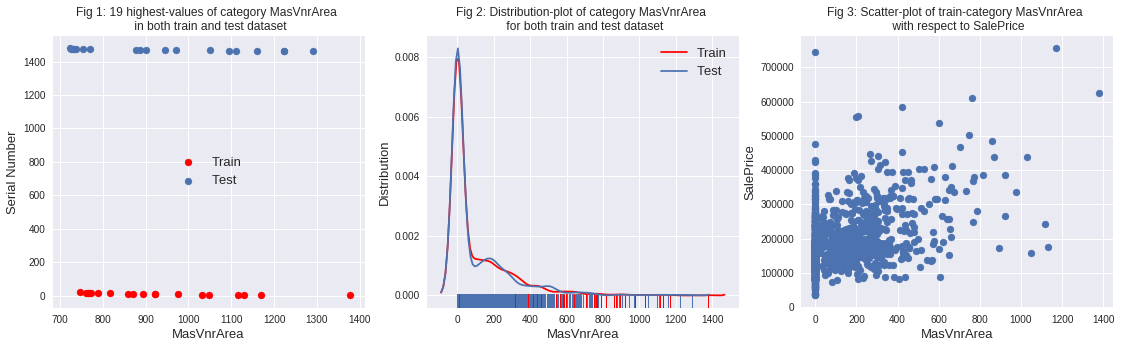

In [23]:
train = train.drop(train[train['MasVnrArea'] > 1500].index)
print('After outlier-removal of MasVnrArea: ')
outlier_check_plot('MasVnrArea')

**4.4.6 LotFrontage**

Before outlier-removal of LotFrontage: 


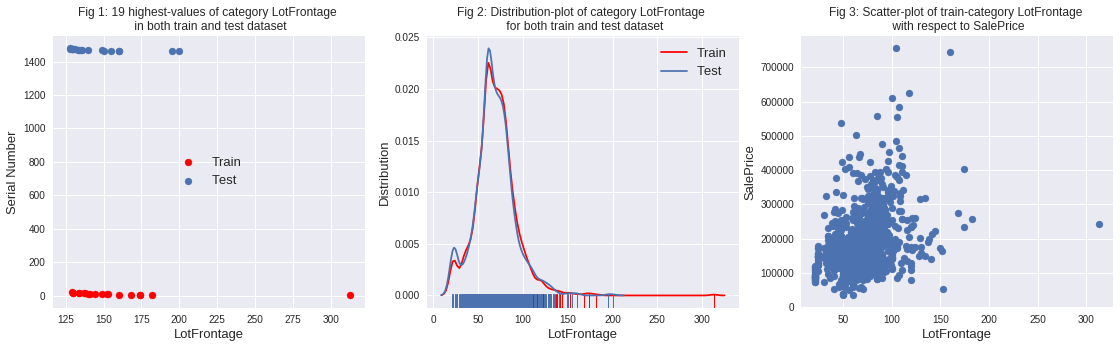

In [24]:
print('Before outlier-removal of LotFrontage: ')
outlier_check_plot('LotFrontage')

<p>As we can see in Fig 3 that above 200 there is 1 LotFrontage train-samples that is very high in size but comperatively very low in SalePrice (below 300000) and there is no such value present in test-data: Fig 1. So we will drop it.</p>

After outlier-removal of LotFrontage: 


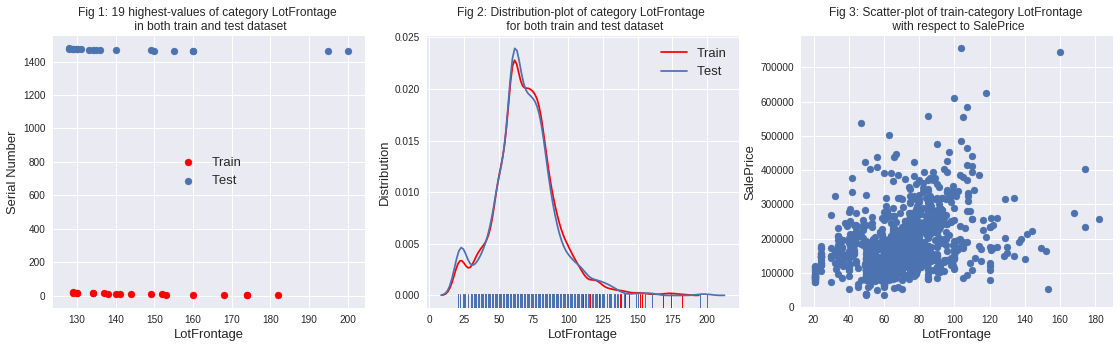

In [25]:
train = train.drop(train[train["LotFrontage"] > 200].index)
print('After outlier-removal of LotFrontage: ')
outlier_check_plot('LotFrontage')

####4.4.6 TotalBsmtSF

Before outlier-removal of TotalBsmtSF: 


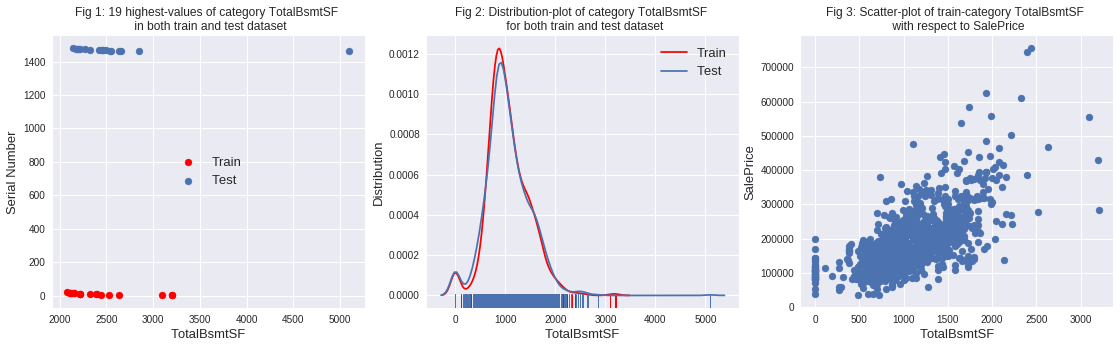

In [26]:
print('Before outlier-removal of TotalBsmtSF: ')
outlier_check_plot('TotalBsmtSF')

<p>If we compare Fig. 3 with code-cell 13 we can see that one outlier is already removed from TotalBsmtSF. This outliers of TotalBsmtSF train-samples was above 5000 with very low SalePrice (below 200000). But it is already dropped due to being mutual outlier of previous-columns and TotalBsmtSF-column.</p>

##Step 5: Normalizing Label-Column
<p>Now SalePrice is the variable we need to predict. We need to check-out whether the SalePrice-values are normally distributed or not. In the distribution-plot mu is average distribution(Black) and sigma is the difference in between the middle-point and inflection-point</p>

In [0]:
# MAKING A COPY OF TRAIN & TEST DB
trainNoOutlier = train.copy()
testNoOutlier = test.copy()

# A FUNCTION TO CHECK ACTUAL AND NORMALIZED DISTRIBUTION-PLOT OF SALEPRICE
def check_distribution(column):
    
    #DISTRIBUTION-PLOT
    plt.subplots(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(train[column] , fit=norm)
    (mu, sigma) = norm.fit(train[column])
    plt.legend(['mu= {:.2f} & sigma= {:.2f} in normal-dist'.format(mu, sigma)], loc='best', fontsize=13)
    plt.ylabel('Frequency')
    plt.title('distribution')
    
    # QUANTILE-QUANTILE PLOT
    plt.subplot(1, 2, 2)                                                                                
    res = stats.probplot(train[column], plot=plt)
    plt.show()

Distribution of SalePrice before normalization:


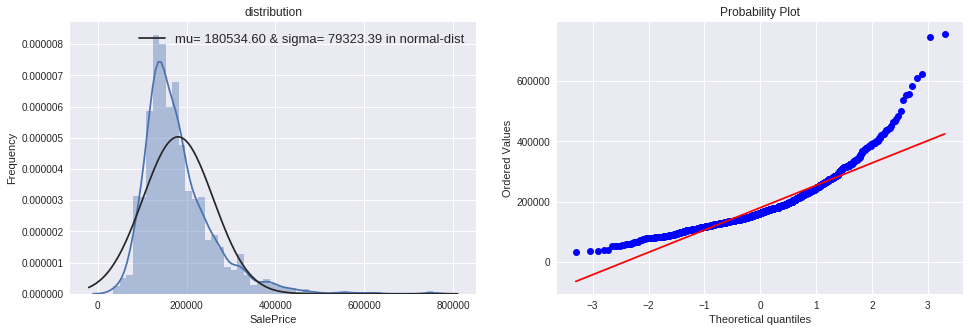

In [28]:
print('Distribution of SalePrice before normalization:')
check_distribution('SalePrice')

<p>The actual and normalized distribution-plots of SalePrice are shown in Blue and Black respectively. The target variable is right skewed. Now Linear models love normally distributed data. So we need to transform this variable and make it more normally distributed. Therefore we do Log-transformation of the target variable. We use the numpy fuction log1p which applies log(1+x) to all elements of the column</p>

Distribution of SalePrice after normalization:


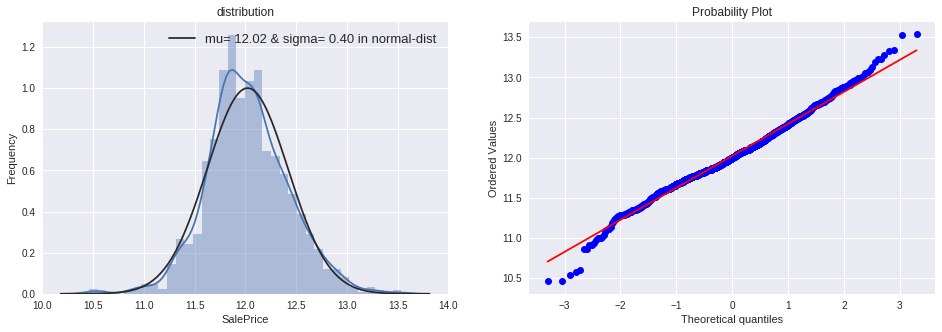

In [29]:
train["SalePrice"] = np.log1p(train["SalePrice"]) 
print('Distribution of SalePrice after normalization:')
check_distribution('SalePrice')

<p>The skew seems now corrected and the data appears to be more normally distributed</p>

##Step 6: Concatenating Train and Test Datasets:

In [30]:
# SAVING TRAINING AND TEST DATA LENGTH
zero = 0
ntrain = train.shape[zero]
ntest = test.shape[zero]

# STORING TRAIN-DATA LABELS SEPARATELY
y_train = train.SalePrice.values

# CONCATENATING TRAIN AND TEST DATAFRAME
all_data = pd.concat((train, test)).reset_index(drop=True)

# REMOVING TRAIN-DATA LABELS
all_data.drop(['SalePrice'], axis=1, inplace=True)

# CHECKING SIZE OF CONCATENATED DATAFRAME
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2911, 79)


##Step 7: Dealing with missing Values

###7.1 Observation of Missing-value columns
<p>Lets discover all columns containing missing values</p>

In [31]:
# MAKING A SERIES CONTAINING PERCENTAGE OF MISSING VALUES FOR EACH COLUMN
missing_value_counts = all_data.isnull().sum()
all_data_na = missing_value_counts / len(all_data)

#DROPPING FEATURES WITH NO MISSING-VALUES
all_data_na = all_data_na.drop(all_data_na[all_data_na == zero].index)
all_data_na = all_data_na.sort_values(ascending=False)

# MAKING A DATAFRAME WITH THAT SERIES
missing_data = pd.DataFrame({'Missing Data Ratio' :all_data_na})

# CHECKING THE SIZE OF THE DATAFRAME
print('Total number of Features with missing data = '+str(len(missing_data))+'\n')

Total number of Features with missing data = 34



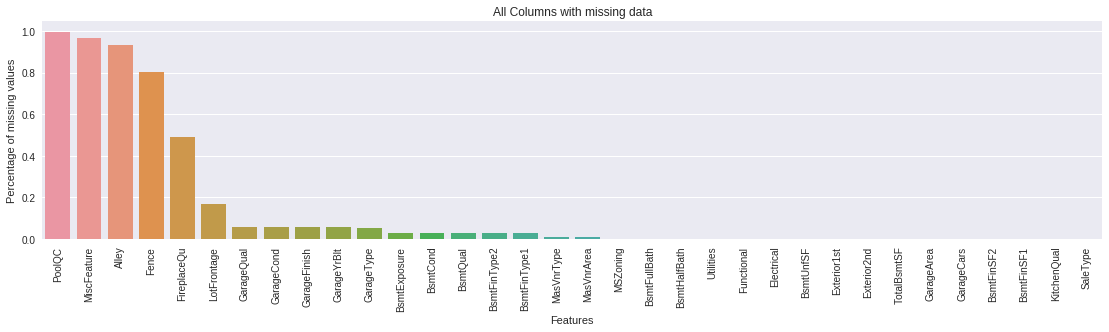

In [32]:
#PLOTTING RATIO OF MISSING VALUES FOR EACH COLUMN
plt.subplots(figsize=(19, 4))
plt.xticks(rotation=ninety)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.title('All Columns with missing data')
plt.show()

<p>Now we have separated the missing-value columns into 2 categories: Low Percentage Missing Value Columns:LPMVC that are the last 18 columns of above plot. The rests are considered as High Percentage Missing Value Columns:HPMVC</p>

###7.2 Low Percentage Missing Value Columns: LPMVC

####7.2.1 Visualization
<p>Lets visualize all Columns with very less percentage of missing data</p>

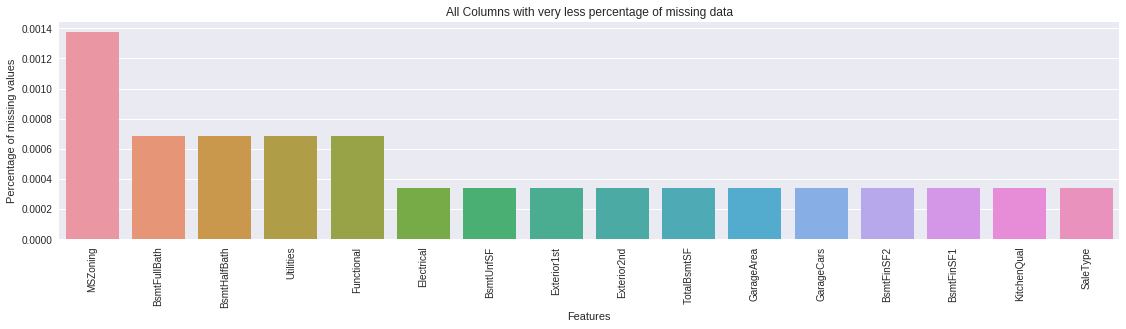

In [33]:
# VISUALIZING LOW PERCENTAGE MISSING VALUE COLUMNS: LPMVC
LPMVC=all_data_na.drop(all_data_na.index[:18])
plt.subplots(figsize=(19, 4))
plt.xticks(rotation=ninety)
sns.barplot(x=LPMVC.index, y=LPMVC)
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.title('All Columns with very less percentage of missing data')
plt.show()

####7.2.2 Distinguishing numeric and non-numeric LPMVCs

In [34]:
# LETS DISTINGUISH NUMERIC AND NON-NUMERIC COLUMNS IN LPMVC
numeric_LPMVC = LPMVC
non_numeric_LPMVC = LPMVC
for item in range(len(LPMVC)):
    if(train[LPMVC.index[item]].dtype == object):
        numeric_LPMVC = numeric_LPMVC.drop(LPMVC.index[item])
    else:
        non_numeric_LPMVC = non_numeric_LPMVC.drop(LPMVC.index[item])
        
# MAKING A DATAFRAME WITH THAT SERIES
numeric_colums_with_low_percentage_of_missing_data = pd.DataFrame({'missing-ratio of numeric LPMVC' :numeric_LPMVC})
numeric_colums_with_low_percentage_of_missing_data

missing-ratio of numeric LPMVC
BsmtFullBath                          0.0007
BsmtHalfBath                          0.0007
BsmtUnfSF                             0.0003
TotalBsmtSF                           0.0003
GarageArea                            0.0003
GarageCars                            0.0003
BsmtFinSF2                            0.0003
BsmtFinSF1                            0.0003

####7.2.3 Filling Numeric LPMVCs with ZERO 

In [0]:
for item in range(len(numeric_LPMVC)):
    all_data[numeric_LPMVC.index[item]] = all_data[numeric_LPMVC.index[item]].fillna(zero)

####7.2.4 Remove Utilities from Non-numeric LPMVCs
<p>Here we have dropped the column: Utilities as we want to treat it separately. Here non_numeric_LPMVC Except Utilities is represented as non_numeric_LPMVCEU in short</p>

In [0]:
non_numeric_LPMVCEU = non_numeric_LPMVC

for item in range(len(non_numeric_LPMVC)):
    if(non_numeric_LPMVC.index[item]=='Utilities'):
        non_numeric_LPMVCEU = non_numeric_LPMVCEU.drop(non_numeric_LPMVC.index[item])

In [37]:
non_neumeric_colums_with_low_percentage_of_missing_data = pd.DataFrame({'missing-ratio of non-numeric LPMVC' :
                                                                        non_numeric_LPMVCEU})
non_neumeric_colums_with_low_percentage_of_missing_data

missing-ratio of non-numeric LPMVC
MSZoning                                 0.0014
Functional                               0.0007
Electrical                               0.0003
Exterior1st                              0.0003
Exterior2nd                              0.0003
KitchenQual                              0.0003
SaleType                                 0.0003

<p>Lets visualize the non-neumeric_LPMVCs</p>

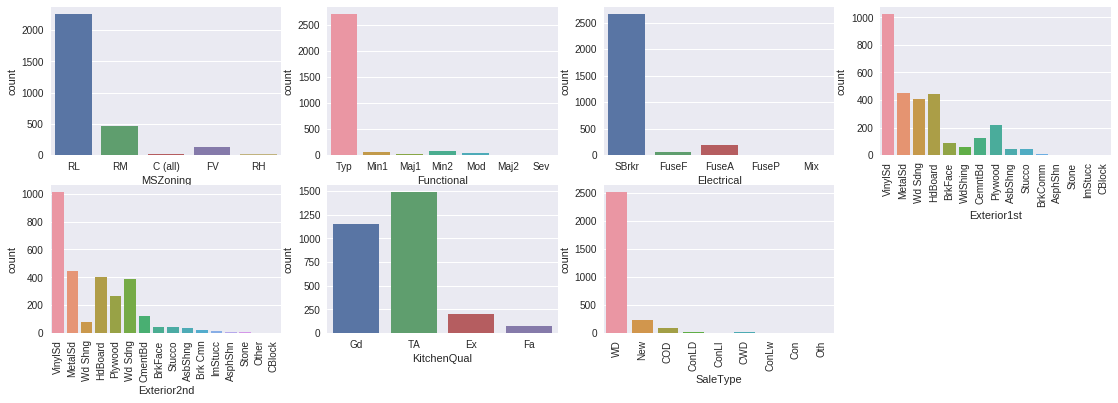

In [38]:
N2LPMVCEU = non_numeric_LPMVCEU
def plt_missing_value_columns(c, column, rotation): 
    plt.subplot(2, 4, c)
    sns.countplot(all_data[column])
    plt.xticks(rotation=rotation)
    plt.xlabel(column)
    
plt.subplots(figsize=(19, 6))
for item in range(len(N2LPMVCEU)):
    column = N2LPMVCEU.index[item]
    if((column =='Exterior1st') | (column =='Exterior2nd')| (column =='SaleType')): rotation = ninety
    else: rotation = zero
    plt_missing_value_columns(item+1, column, rotation)
plt.show()

####7.2.5 Filling Non-numeric LPMVCs with Highest-Frequency-Value

In [0]:
for item in range(len(N2LPMVCEU)):
    all_data[N2LPMVCEU.index[item]] = all_data[N2LPMVCEU.index[item]].fillna(all_data[N2LPMVCEU.index[item]].mode()[zero])

###7.3 High Percentage Missing Value Columns: HPMVC

####7.3.1 Visualization
<p>Now lets visualize the High Percentage Missing Value Columns or HPMVCs which are the first 18 columns of all-missing-data plot </p>

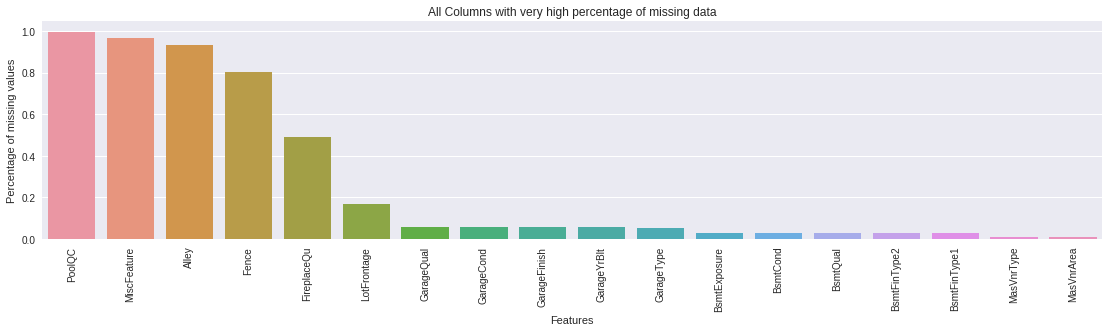

In [40]:
HPMVC = all_data_na.drop(all_data_na.index[18:])
plt.subplots(figsize=(19, 4))
plt.xticks(rotation=ninety)
sns.barplot(x=HPMVC.index, y=HPMVC)
plt.xlabel('Features')
plt.ylabel('Percentage of missing values')
plt.title('All Columns with very high percentage of missing data')
plt.show()

####7.3.2 Distinguish Numeric and Non-numeric HPMVCs 
<p>Lets distinguish neumeric and non-neumeric columns in HPMVC. Here numeric_HPMVC Except LotFrontage is represented as numeric_HPMVCELF in short</p>

In [41]:
numeric_HPMVC = HPMVC
non_numeric_HPMVC = HPMVC
for item in range(len(HPMVC)):
    if(train[HPMVC.index[item]].dtype == object):
        numeric_HPMVC = numeric_HPMVC.drop(HPMVC.index[item])
    else:
        non_numeric_HPMVC = non_numeric_HPMVC.drop(HPMVC.index[item])

numeric_HPMVCELF = numeric_HPMVC
for item in range(len(numeric_HPMVC)):
    if(numeric_HPMVC.index[item]=='LotFrontage'):
        numeric_HPMVCELF = numeric_HPMVCELF.drop(numeric_HPMVC.index[item])

numeric_colums_with_high_percentage_of_missing_data = pd.DataFrame({'missing-ratio of Numeric HPMVCs' :numeric_HPMVCELF})
numeric_colums_with_high_percentage_of_missing_data

missing-ratio of Numeric HPMVCs
GarageYrBlt                           0.0546
MasVnrArea                            0.0079

<p>We removed LotFrontage from Numeric HPMVCs as we want to treat it separately</p>

####7.3.3 Filling Numeric HPMVCs with ZERO

In [0]:
for item in range(len(numeric_HPMVCELF)):
    all_data[numeric_HPMVCELF.index[item]] = all_data[numeric_HPMVCELF.index[item]].fillna(zero)

<p>Now lets see those non-neumeric colums with high percentage of missing data</p>

In [43]:
non_neumeric_colums_with_high_percentage_of_missing_data = pd.DataFrame({'missing ratio' :non_numeric_HPMVC})
non_neumeric_colums_with_high_percentage_of_missing_data

missing ratio
PoolQC               0.9969
MiscFeature          0.9646
Alley                0.9323
Fence                0.8038
FireplaceQu          0.4878
GarageQual           0.0546
GarageCond           0.0546
GarageFinish         0.0546
GarageType           0.0539
BsmtExposure         0.0282
BsmtCond             0.0282
BsmtQual             0.0278
BsmtFinType2         0.0275
BsmtFinType1         0.0271
MasVnrType           0.0082

####7.3.4 Filling Non-numeric HPMVCs with None
<p>Non-numeric HPMVCs will be filled with the string: None according the the data-description</p>

Non-numeric_HPMVCs before Filling Null values


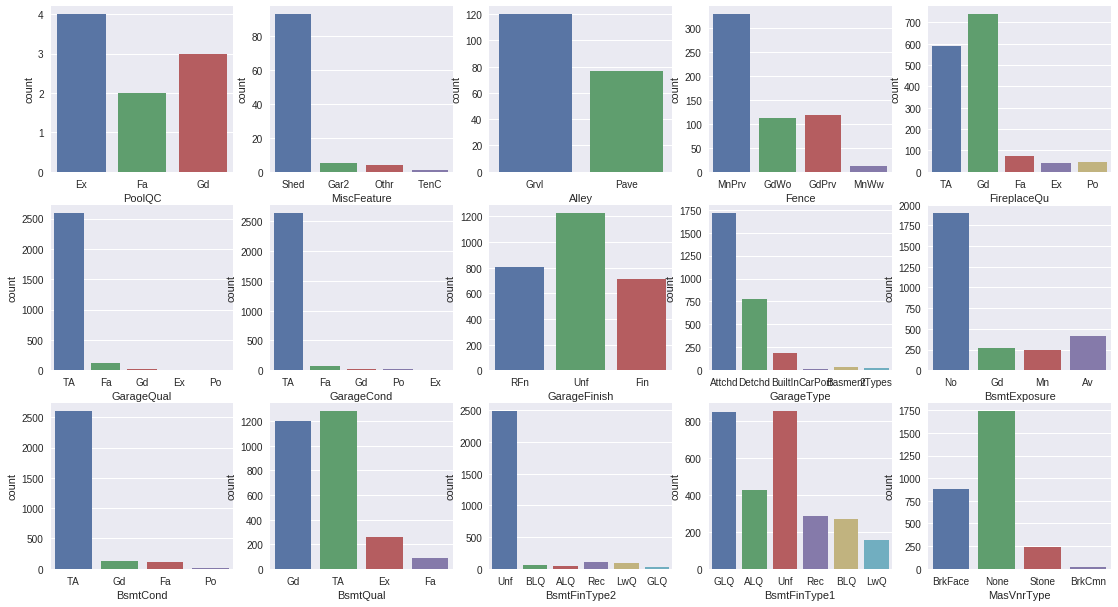

In [44]:
N2HPMVC = non_numeric_HPMVC
print('Non-numeric_HPMVCs before Filling Null values')
def plot_missing_value_columns(c,column): 
    plt.subplot(4, 5, c)
    sns.countplot(all_data[column])
    plt.xlabel(column)
#Lets visualize the non-numeric_HPMVCs
plt.subplots(figsize=(19, 14))
for item in range(len(N2HPMVC)):
    column = N2HPMVC.index[item]
    plot_missing_value_columns(item+1, column)
plt.show()

<p>Filling missing values of non-neumeric HPMVCs with None</p>

Non-numeric_HPMVCs after Filling Null values


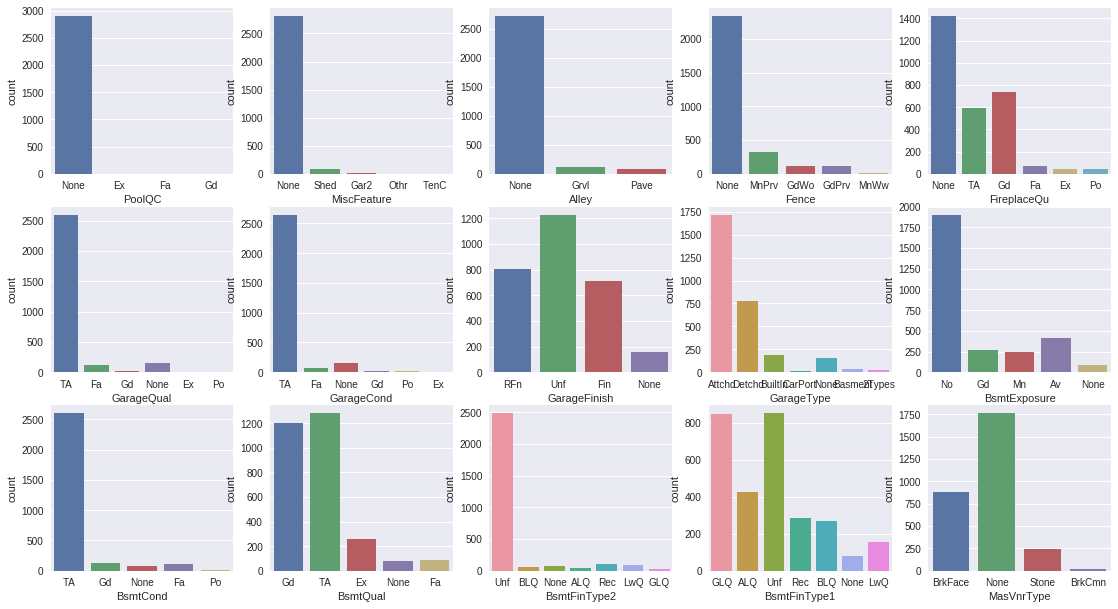

In [45]:
for item in range(len(N2HPMVC)):
    all_data[N2HPMVC.index[item]] = all_data[N2HPMVC.index[item]].fillna('None')
#Lets visualize the non-neumeric_HPMVCs
plt.subplots(figsize=(19, 14))
for item in range(len(N2HPMVC)):
    column = N2HPMVC.index[item]
    plot_missing_value_columns(item+1, column)
print('Non-numeric_HPMVCs after Filling Null values')
plt.show()

<p>Now we can see that the number of unique-values in every feature has increased by one. The new value is: None</p>

###7.4 Dealing with LotFrontage Missing-values

<p>Since the area of each street connected to the house property are likely to have a similar area with respect to other houses in its neighborhood, we can fill in missing values by the mean or median LotFrontage of the neighborhoods. Lets visualize the median and mean LoatFrontage for every neighborhood.
</p>

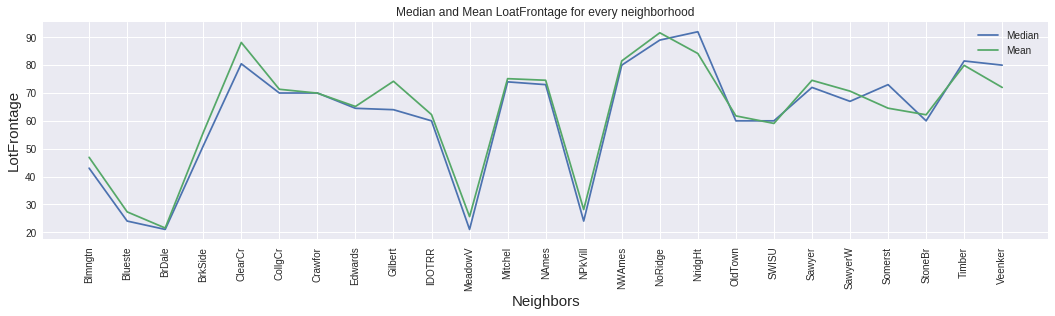

In [46]:
plt.subplots(figsize=(18, 4))
plt.xticks(rotation=ninety)
median = plt.plot(all_data['LotFrontage'].groupby(all_data['Neighborhood']).median(), label='Median')
mean = plt.plot(all_data['LotFrontage'].groupby(all_data['Neighborhood']).mean(), label='Mean')
plt.xlabel('Neighbors', fontsize=15)
plt.ylabel('LotFrontage', fontsize=15)
plt.title('Median and Mean LoatFrontage for every neighborhood')
plt.legend()
plt.show()

<p>The median-line is smoother and Therefore missing values will be filled by the median LotFrontage of neighborhood</p>

In [0]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

###7.5 Dealing with Utilities
<p>Now lets visualize the column: Utilities in both train and test dataset</p>

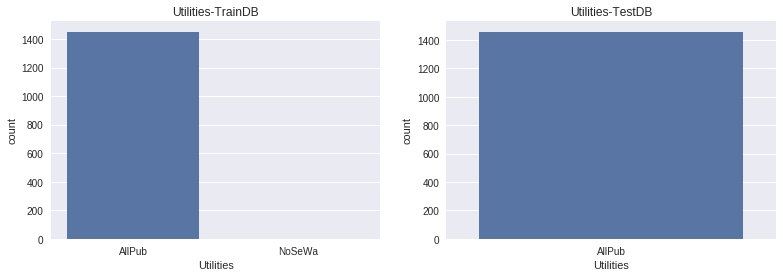

In [48]:
plt.subplots(figsize =(13, 4))
plt.subplot(1, 2, 1)
sns.countplot(train['Utilities']).set_title('Utilities-TrainDB')
plt.subplot(1, 2, 2)
sns.countplot(test['Utilities']).set_title('Utilities-TestDB')
plt.show()

<p>Now most of the values of the feature Utilities are: AllPub except for: one NoSeWa and 2 NA. Since the samples with NoSewa is only present in the training set, So we can remove it. As it will have no effect on predicting test-set</p>

In [0]:
# DROPPING UTILITIES
all_data = all_data.drop(['Utilities'], axis=1)

###7.6: The FInal Check

In [50]:
# CHECKING IF THERE IS ANY REMAINING MISSING VALUE
all_data_na = all_data.isnull().sum() / len(all_data)
all_data_na = all_data_na.drop(all_data_na[all_data_na == zero].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

Empty DataFrame
Columns: [Missing Ratio]
Index: []

<p>So no missing value is left anymore</p>

In [0]:
# LETS KEEP A COPY OF TRAIN & TEST DATA
trainNoValueMissing = all_data[:ntrain]
testNoValueMissing = all_data[ntrain:]

##Step 8: Feature Engineering

<p>Lets begin some feature-engineering</p>

###8.1 Create Polynomial Features

<p>We made polynomial features from those features that are mostly correlated to SalePrice</p>

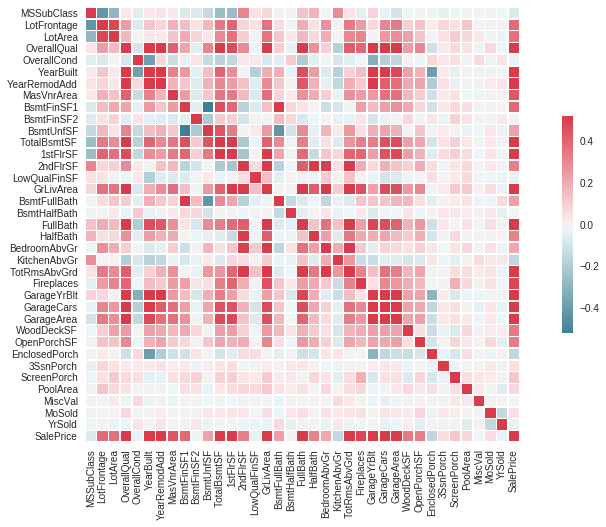

In [52]:
# CORRELATION MAP TO SEE HOW FEATURES ARE CORRELATED WITH SALEPRICE
corrmat = train.corr()
plt.subplots(figsize=(15,8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(219, 9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}) #annot=True/False
plt.show()

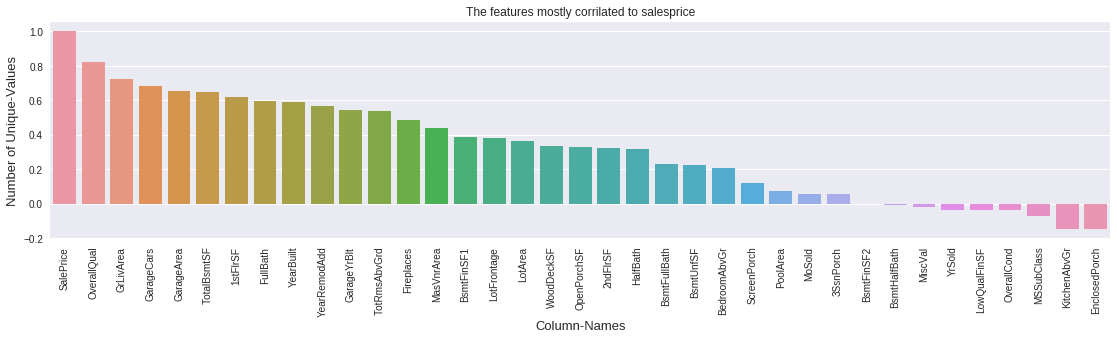

In [53]:
# THE FEATURES MOSTLY CORRELATED TO SALESPRICE
cols = train.dtypes[train.dtypes != 'object'].index
corrs=[]
for item in cols:
    corrs.append((train[item].corr(train['SalePrice'])))
    
ist = pd.DataFrame(
    {'cols': cols,
     'corrs': corrs
    })
ist = ist.sort_values(by='corrs', ascending=False)
#ist.head()
plt.subplots(figsize=(19, 4))
sns.barplot(x=ist['cols'], y=ist['corrs'])
plt.xticks(rotation=ninety)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title('The features mostly corrilated to salesprice')
plt.show()

In [0]:
ist = ist.drop(ist[(ist['cols'] == 'SalePrice') | (ist['cols'] == 'YearBuilt')| (ist['cols'] == 'GarageYrBlt')
             | (ist['cols'] == 'YearRemodAdd')| (ist['cols'] == 'LotArea')].index)

ist = ist.reset_index(drop=True)

<P>Making a function to create three kinds of polynomial features: square(power 2), square-root and power 3 </P>

In [55]:
print('Shape of all-data before creating polynomials: ')
print(all_data.shape)
fet=ist['cols'].tolist()[:15]

def polynomial_generator(column):
    all_data[column+'-2'] = np.square(all_data[column])
    all_data[column+'-3'] = np.power(all_data[column],3)
    all_data[column+'-Sq'] = np.sqrt(all_data[column])

for item in fet:
    polynomial_generator(item)
print('Shape of all-data after creating polynomials: ')
print(all_data.shape)

Shape of all-data before creating polynomials: 
(2911, 78)
Shape of all-data after creating polynomials: 
(2911, 123)


###8.2 Manual Feature-engineering
<p>In this section we discussed each and every feature and modified it according to necessity. Therefore the section is long.<br><br> <u>Necessity of Feature-clustering</u><br>Categorizing a continuous-feature by applying both clustering and one-hot-encoding is done very frequently in this section.It is a way to minimize the number of features while making them categorical. This method reduces model-complexity tremendously while allowing the model to learn normalized-input that is not quite exact for any one sample but close to all other samples in a cluster.<br><br></p>

####8.2.1 Making Function for Feature-Analysis
<p>All features of house-price dataset have been separated into 3 different categories: Type, Size and Period(Year/Month). Type or size based features represent type or size of the sample respectively. Type-based features are generally non-numeric and have very few categories.</p>

In [0]:
def type_based_feature_analysis(column, rotation = None):
    
    order_all_data = all_data[column].value_counts().index
    order_train = train[column].value_counts().index
    
    if rotation is None: rotation = zero
    
    plt.subplots(figsize =(19, 4))
    plt.subplot(1, 5, 1)
    sns.barplot(x=train[column], y=train['SalePrice'], order = order_train)
    plt.xlabel(column+' (train)')
    plt.xticks(rotation=rotation)
    
    plt.subplot(1, 5, 2)
    sns.countplot(x=train[column], order = order_train)
    plt.xlabel(column+' (train)')
    plt.xticks(rotation=rotation)
    
    plt.subplot(1, 5, 3)
    sns.countplot(x=all_data[column], order = order_all_data)
    plt.xlabel(column+' (all_data)')
    plt.xticks(rotation=rotation)
    
    plt.subplot(1, 5, 4)
    sns.stripplot(x=train[column], y=train['SalePrice'], jitter = True, order = order_train)
    plt.xlabel(column+' (train)')
    plt.xticks(rotation=rotation)
    
    plt.subplot(1, 5, 5)
    sns.boxplot(x=train[column], y=train['SalePrice'], order = order_train)
    plt.xlabel(column+' (train)')
    plt.xticks(rotation=rotation)
    
    plt.show()

<p>Size based features show the area: square-feet that are continuous numeric values.</p>

In [0]:
def size_based_feature_analysis(column):
    grid = plt.GridSpec(2, 4)
    plt.subplots(figsize =(19, 7))

    plt.subplot(grid[zero, zero])
    sns.barplot(x=train['HouseStyle'], y=train[column])

    plt.subplot(grid[zero,1])
    sns.barplot(x=train['BldgType'], y=train[column])

    plt.subplot(grid[zero, 2])
    sns.barplot(x=train['LotShape'], y=train[column])

    plt.subplot(grid[zero, 3])
    g = sns.regplot(x=train[column], y=train['SalePrice'], fit_reg=False, 
                    label = "corr: %2f"%(pearsonr(train[column], train['SalePrice'])[zero]))
    g = g.legend(loc='best', fontsize=12)
    
    plt.subplot(grid[1, zero:])
    sns.boxplot(x=train['Neighborhood'], y=train[column])

    plt.show()

<p>And Period/Year based features show duration or periods.</p>

In [0]:
def year_based_feature_analysis(column, rotation = None, box = True):
    
    if rotation is None: rotation = ninety
    
    if(box == True): 
        n = 3
        a = 2
        b = 3
        plt.subplots(figsize =(19, 16))
    else: 
        n = 2
        b = 2
        plt.subplots(figsize =(19, 9))
    
    plt.subplot(n, 1, 1)
    sns.barplot(x=train[column], y=train['SalePrice'])
    plt.xlabel(column+' (train)')
    plt.xticks(rotation=rotation)
    
    if(box == True):  
        plt.subplot(n, 1, a)
        sns.boxplot(x=train[column], y=train['SalePrice'])
        plt.xlabel(column+' (train)')
        plt.xticks(rotation=rotation)
    
    plt.subplot(n, 1, b)
    sns.stripplot(x=train[column], y=train['SalePrice'], jitter = True)
    plt.xlabel(column+' (train)')
    plt.xticks(rotation=rotation)
    
    plt.show()


<p>All these 3 categories have their own unique pattern of values. Therefore they have been presented in 3 separeate ways all through the karnel. Lets have a look at the graph-plotting of the functions and analyze then one-by-one.</p>

####8.2.2 BsmtQual

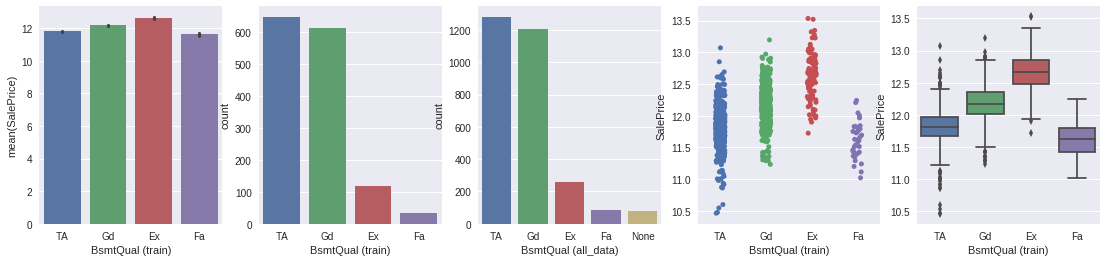

In [59]:
# BEFORE FEATURE ENGINEERING
type_based_feature_analysis('BsmtQual')

<p>As we can see most houses have either Good or Typical sized basements SalePrice increase with the increase of Basement quality. So the feature contains information in its order and the values can be compared with one-another. Therefore we decided to convert it to a neumeric feature.</p>

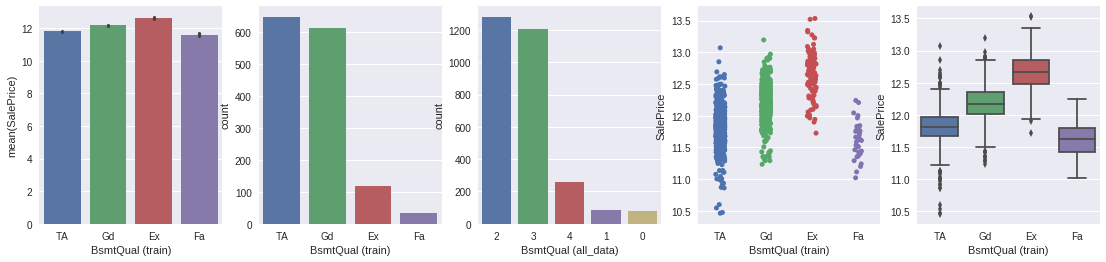

In [60]:
# CONVERSION TO NUMERIC
all_data['BsmtQual'] = all_data['BsmtQual'].map({'None':zero, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

# AFTER FEATURE ENGINEERING
type_based_feature_analysis('BsmtQual')

####8.2.3 BsmtCond

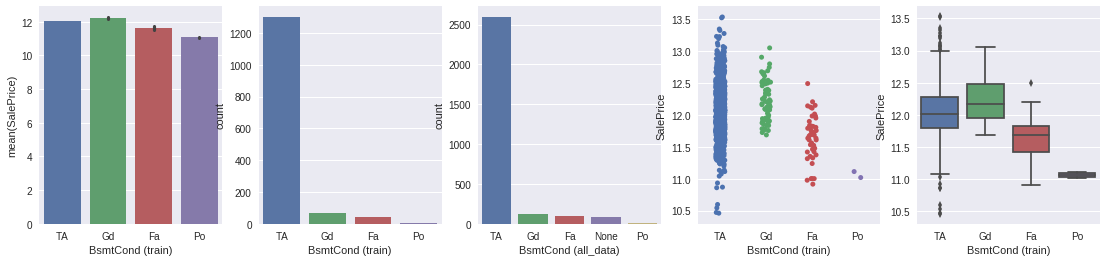

In [61]:
type_based_feature_analysis('BsmtCond')

<p>Most of the Basement has Typical: TA condition though the condition influences SalePrice positively. The feature contains information in its order and the values can be compared with one-another. Therefore we decided to convert it to a neumeric feature</p>

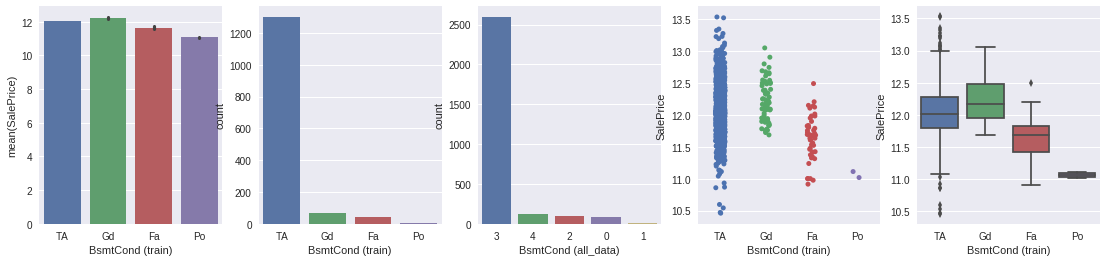

In [62]:
# CONVERSION TO NUMERIC
all_data['BsmtCond'] = all_data['BsmtCond'].map({'None':zero, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

# AFTER FEATURE ENGINEERING
type_based_feature_analysis('BsmtCond')

####8.2.4 BsmtExposure

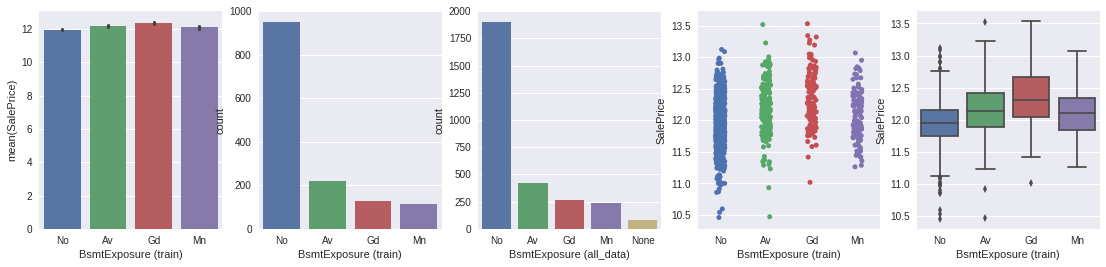

In [63]:
type_based_feature_analysis('BsmtExposure')

<p>The feature contains information in its order and the values can be compared with one-another. Therefore we decided to convert it to a neumeric feature</p>

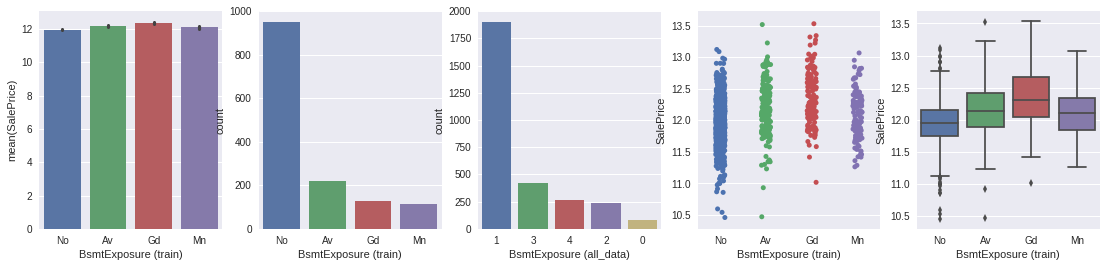

In [64]:
# CONVERSION TO NUMERIC
all_data['BsmtExposure'] = all_data['BsmtExposure'].map({'None':zero, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})

#AFTER FEATURE ENGINEERING
type_based_feature_analysis('BsmtExposure')


####8.2.5 BsmtFinType1
<p>Description: Basement Finished Type 1</p>

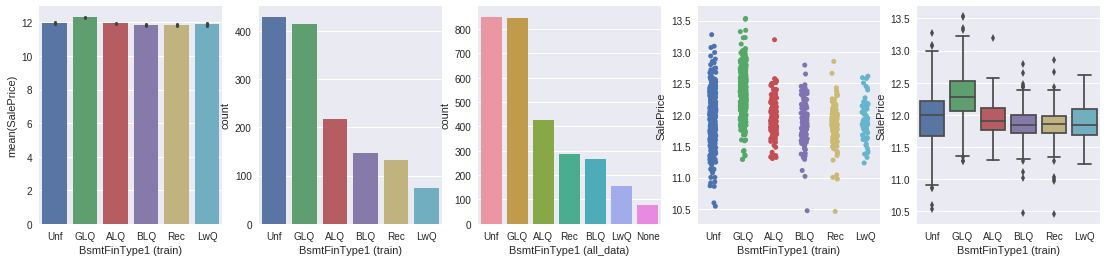

In [65]:
type_based_feature_analysis('BsmtFinType1')

<p>Though basements with a good Living Quarters (GLQ) demands more money than unfinished/Average ones (ALQ/Ucf). Yet it has very little impact on SalePrice. So we will not make it neumeric. We just create Dummy variables (One-hot-encoding) from the feature.</p>

In [66]:
# MAKING DUMMIES
all_data = pd.get_dummies(all_data, columns = ['BsmtFinType1'], prefix = 'BsmtFinType1')

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-7:all_data.shape[1]].head(3)

BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   

   BsmtFinType1_None  BsmtFinType1_Rec  BsmtFinType1_Unf  
0                  0                 0                 0  
1                  0                 0                 0  
2                  0                 0                 0

####8.2.6 BsmtFinType2
<p>Basement Finished Type 2</p>

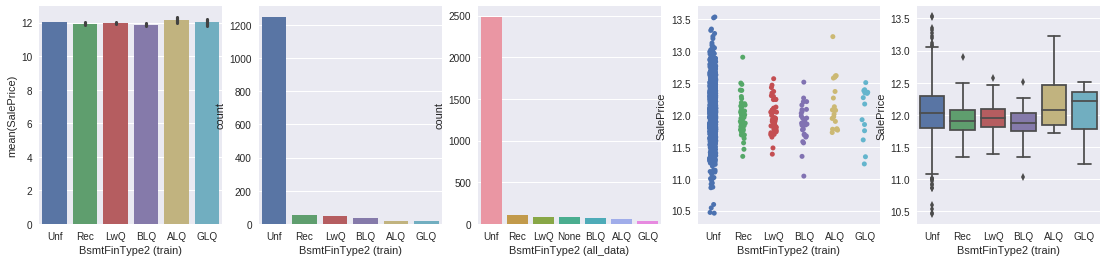

In [67]:
type_based_feature_analysis('BsmtFinType2')

<p>Most of the Type2 basements are found unfinishes. The feature has almost no impact on SalePrice. So we will not make it neumeric. We just create Dummy variables from the feature</p>

In [68]:
# MAKING DUMMIES
all_data = pd.get_dummies(all_data, columns = ['BsmtFinType2'], prefix = 'BsmtFinType2')

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-7:all_data.shape[1]].head(3)

BsmtFinType2_ALQ  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   

   BsmtFinType2_None  BsmtFinType2_Rec  BsmtFinType2_Unf  
0                  0                 0                 1  
1                  0                 0                 1  
2                  0                 0                 1

####8.2.7 BsmtFinSF1
<p>Basement Finished Square-Feet 1</p>

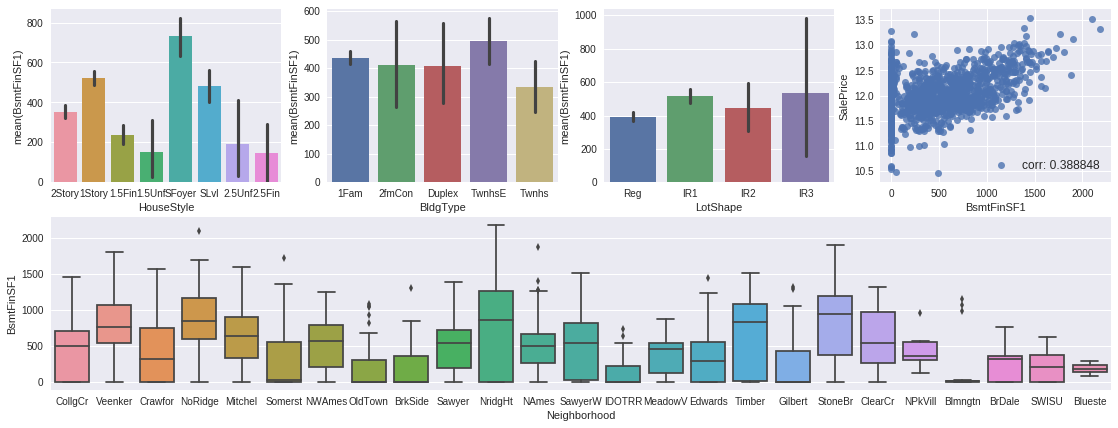

In [69]:
size_based_feature_analysis('BsmtFinSF1')

<p>Basement Finished Square-Feet is diversely influenced by BldgType, HouseStyle and LotShape. It is categorical and maintains positive correlation with SalePrice. Thesefore we will bin/slice the feature and create dummy variables- one-hot encoded.</p>

In [70]:
# BINNING/SLICING INTO 4 SECTIONS-
all_data['BsmtFinSF1_Band'] = pd.cut(all_data['BsmtFinSF1'], 4)
pd.DataFrame({'seperations' :all_data['BsmtFinSF1_Band'].unique()})

seperations
0   (-4.01, 1002.5]
1  (1002.5, 2005.0]
2  (2005.0, 3007.5]
3  (3007.5, 4010.0]

In [71]:
def slicing(raw_separations):
    separations=[]
    for count in range(len(raw_separations)):
        separations.append(str(raw_separations[count]).strip('[]()'))

    separations = [x for xs in separations for x in xs.split(',')]
    slices=[]

    for count in range(len(separations)):
        if(((count%2) != zero) | (count == zero)):
            slices.append(float(separations[count]))

    return slices
slices = slicing(list(all_data['BsmtFinSF1_Band'].unique()))  
slices_df= pd.DataFrame({'slices' : slices})
slices_df

slices
0   -4.0100
1 1002.5000
2 2005.0000
3 3007.5000
4 4010.0000

In [72]:
all_data.loc[all_data['BsmtFinSF1']<=slices[1], 'BsmtFinSF1'] = 1
all_data.loc[(all_data['BsmtFinSF1']>slices[1]) & (all_data['BsmtFinSF1']<=slices[2]), 'BsmtFinSF1'] = 2
all_data.loc[(all_data['BsmtFinSF1']>slices[2]) & (all_data['BsmtFinSF1']<=slices[3]), 'BsmtFinSF1'] = 3
all_data.loc[all_data['BsmtFinSF1']>slices[3], 'BsmtFinSF1'] = 4

all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].astype(int)

all_data.drop('BsmtFinSF1_Band', axis=1, inplace=True)
all_data = pd.get_dummies(all_data, columns = ['BsmtFinSF1'], prefix='BsmtFinSF1')

#Now lets discover the dummy-variables generated from BsmtFinSF1:
all_data.iloc[:,all_data.shape[1]-4:all_data.shape[1]].head(3)

BsmtFinSF1_1  BsmtFinSF1_2  BsmtFinSF1_3  BsmtFinSF1_4
0             1             0             0             0
1             1             0             0             0
2             1             0             0             0

<p>So four dummy-variables have been generated from BsmtFinSF1</p>

####8.2.8 BsmtFinSF2
<p>Basement Finished Square-Feet 2. It is a size-based feature</p>

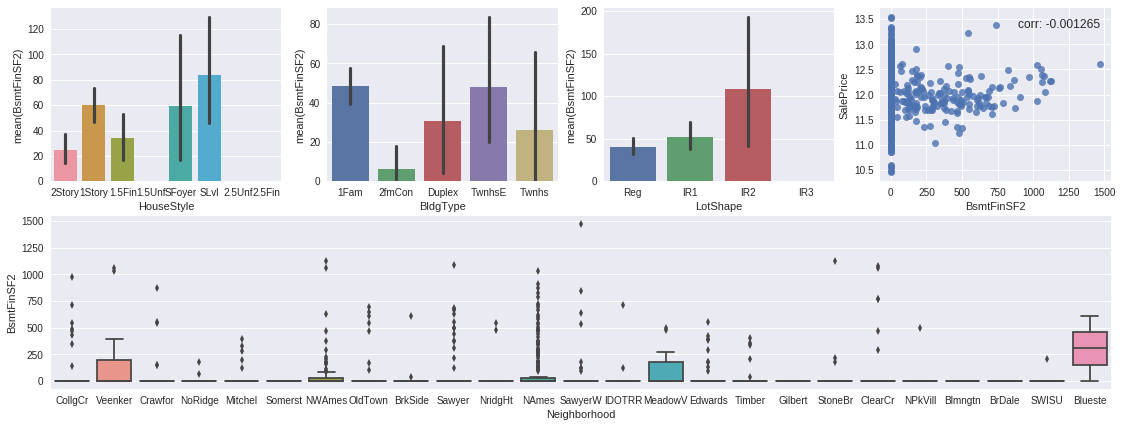

In [73]:
size_based_feature_analysis('BsmtFinSF2')

<p>There are a large number of data points in the feature where the value is zero. Also there is no significant correlation with SalePrice. So we create a flag.</p>

In [74]:
# CREATING FLAG VARIABLE-
all_data['BsmtFinSf2_Flag'] = all_data['BsmtFinSF2'].map(lambda x:zero if x==zero else 1)
all_data.drop('BsmtFinSF2', axis=1, inplace=True)

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-1:all_data.shape[1]].head(3)

BsmtFinSf2_Flag
0                0
1                0
2                0

####8.2.9 BsmtUnfSF
<p>Basement Unfinished Square-Feet</p>

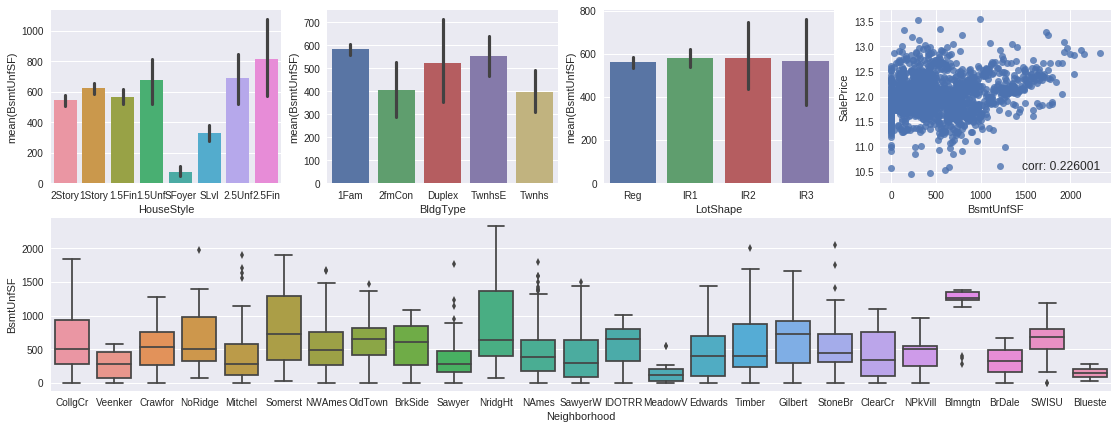

In [75]:
size_based_feature_analysis('BsmtUnfSF')

<p>Unfinished square-feet is found constant across the different lot shapes though it varies with location and style most houses will have some amount of square feet unfinished within the basement that contributes positively to SalePrice. This continuous feature maintains strongly positive correlation with SalePrice. So we will create bins/slices and then create dummy variables.</p>

In [76]:
# BINNING/SLICING INTO 3 SECTIONS-
all_data['BsmtUnfSF_Band'] = pd.cut(all_data['BsmtUnfSF'], 3)

pd.DataFrame({'seperations' :all_data['BsmtUnfSF_Band'].unique()})

seperations
0    (-2.336, 778.667]
1  (778.667, 1557.333]
2   (1557.333, 2336.0]

In [77]:
slices = slicing(list(all_data['BsmtUnfSF_Band'].unique()))
slices_df= pd.DataFrame({'slices' : slices})
slices_df

slices
0   -2.3360
1  778.6670
2 1557.3330
3 2336.0000

In [78]:
all_data.loc[all_data['BsmtUnfSF']<=slices[1], 'BsmtUnfSF'] = 1
all_data.loc[(all_data['BsmtUnfSF']>slices[1]) & (all_data['BsmtUnfSF']<=slices[2]), 'BsmtUnfSF'] = 2
all_data.loc[all_data['BsmtUnfSF']>slices[2], 'BsmtUnfSF'] = 3

all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].astype(int)
all_data.drop('BsmtUnfSF_Band', axis=1, inplace=True)

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data = pd.get_dummies(all_data, columns = ['BsmtUnfSF'], prefix='BsmtUnfSF')
all_data.iloc[:,all_data.shape[1]-3:all_data.shape[1]].head(3)

BsmtUnfSF_1  BsmtUnfSF_2  BsmtUnfSF_3
0            1            0            0
1            1            0            0
2            1            0            0

####8.2.10 TotalSF

<p>Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house</p>

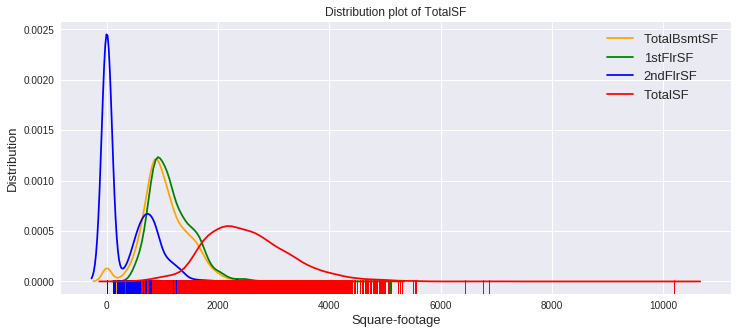

In [79]:
# ADDING TOTAL SQUARE-FOOTAGE FEATURE
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

plt.subplots(figsize=(12, 5))
sns.distplot(all_data['TotalBsmtSF'], color='orange', rug=True, hist=False, label='TotalBsmtSF')
sns.distplot(all_data['1stFlrSF'], color='green', rug=True, hist=False, label='1stFlrSF')
sns.distplot(all_data['2ndFlrSF'], color='blue', rug=True, hist=False, label='2ndFlrSF')
sns.distplot(all_data['TotalSF'], color='red', rug=True, hist=False, label='TotalSF')
plt.ylabel('Distribution', fontsize=13)
plt.xlabel('Square-footage', fontsize=13)
plt.legend(fontsize=13)
plt.title('Distribution plot of TotalSF')
plt.show()

<p>As we can see that TotalSF is more normally distributed and least-skewed than other features</p>


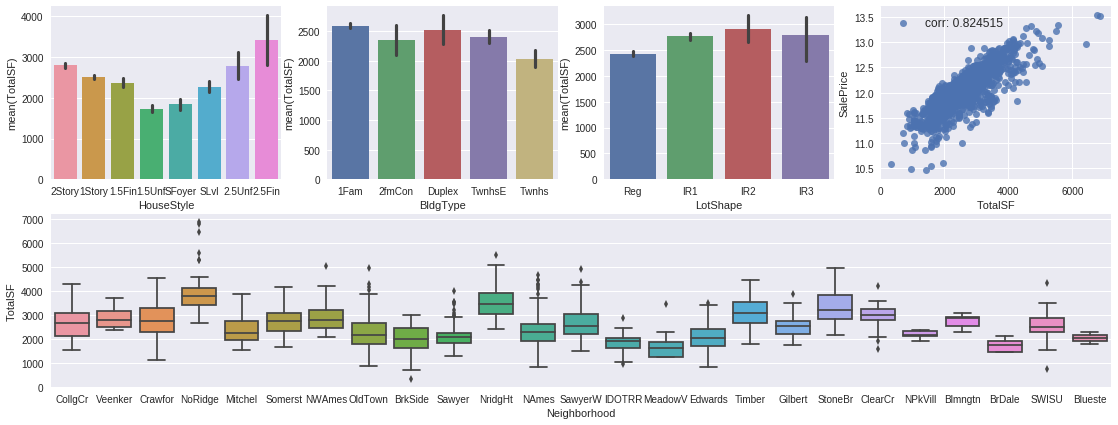

In [80]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
size_based_feature_analysis('TotalSF')

<p>The Feature- TotalSF has become extremely corrilated to SalePrice. This is what we wanted to achieve. We will create more bins than usual and then create dummies.</p>

In [81]:
# BINNING/SLICING INTO 11 SECTIONS-
all_data['TotalSF_Band'] = pd.cut(all_data['TotalSF'], 11)

pd.DataFrame({'seperations' :all_data['TotalSF_Band'].unique()})

seperations
0   (2126.0, 3022.0]
1   (3022.0, 3918.0]
2   (1230.0, 2126.0]
3  (324.144, 1230.0]
4   (3918.0, 4814.0]
5   (4814.0, 5710.0]
6   (5710.0, 6606.0]
7   (6606.0, 7502.0]
8  (9294.0, 10190.0]

In [82]:
slices = slicing(list(all_data['TotalSF_Band'].unique()))
slices_df = pd.DataFrame({'slices' : slices}).sort_values(by=['slices']).reset_index(drop = True)
slices = list(slices_df['slices'])
slices_df

slices
0  1230.0000
1  2126.0000
2  2126.0000
3  3022.0000
4  3918.0000
5  4814.0000
6  5710.0000
7  6606.0000
8  7502.0000
9 10190.0000

In [83]:
all_data.loc[all_data['TotalSF']<=slices[zero], 'TotalSF'] = 1
all_data.loc[(all_data['TotalSF']>slices[zero]) & (all_data['TotalSF']<=slices[2]), 'TotalSF'] = 2
all_data.loc[(all_data['TotalSF']>slices[2]) & (all_data['TotalSF']<=slices[3]), 'TotalSF'] = 3
all_data.loc[(all_data['TotalSF']>slices[3]) & (all_data['TotalSF']<=slices[4]), 'TotalSF'] = 4
all_data.loc[(all_data['TotalSF']>slices[4]) & (all_data['TotalSF']<=slices[5]), 'TotalSF'] = 5
all_data.loc[(all_data['TotalSF']>slices[5]) & (all_data['TotalSF']<=slices[6]), 'TotalSF'] = 6
all_data.loc[(all_data['TotalSF']>slices[6]) & (all_data['TotalSF']<=slices[7]), 'TotalSF'] = 7
all_data.loc[(all_data['TotalSF']>slices[7]) & (all_data['TotalSF']<=slices[8]), 'TotalSF'] = 8
all_data.loc[all_data['TotalSF']>slices[8], 'TotalSF'] = 9
all_data['TotalSF'] = all_data['TotalSF'].astype(int)
all_data.drop('TotalSF_Band', axis=1, inplace=True)
all_data = pd.get_dummies(all_data, columns = ['TotalSF'], prefix='TotalSF')

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-9:all_data.shape[1]].head(3)

TotalSF_1  TotalSF_2  TotalSF_3  TotalSF_4  TotalSF_5  TotalSF_6  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   

   TotalSF_7  TotalSF_8  TotalSF_9  
0          0          0          0  
1          0          0          0  
2          0          0          0

<p>So nine dummy-variables have been generated from TotalSF</p>

####8.2.11 TotalBsmtSF
<p>Total Basement Square-Feet</p>

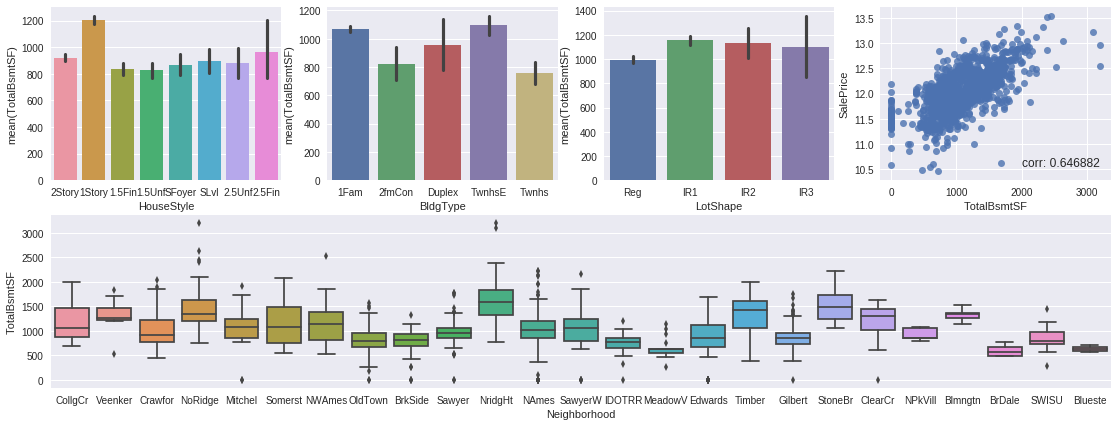

In [84]:
size_based_feature_analysis('TotalBsmtSF')

<p>Total-Basement size did not change much with respect to style,type or lot-shap but changed a lot with neighourhood. It maintained very high correlation with Saleprice. Therefore we will create more bins(slices) than usual and then create dummies.</p>

In [85]:
# BINNING/SLICING INTO 10 SECTIONS-
all_data['TotalBsmtSF_Band'] = pd.cut(all_data['TotalBsmtSF'], 10)
pd.DataFrame({'seperations' :all_data['TotalBsmtSF_Band'].unique()})

seperations
0   (509.5, 1019.0]
1  (1019.0, 1528.5]
2  (1528.5, 2038.0]
3   (-5.095, 509.5]
4  (2038.0, 2547.5]
5  (3057.0, 3566.5]
6  (2547.5, 3057.0]
7  (4585.5, 5095.0]

In [86]:
slices = slicing(list(all_data['TotalBsmtSF_Band'].unique()))
slices_df = pd.DataFrame({'slices' : slices}).sort_values(by=['slices']).reset_index(drop = True)
slices = list(slices_df['slices'])
slices_df

slices
0  509.5000
1  509.5000
2 1019.0000
3 1528.5000
4 2038.0000
5 2547.5000
6 3057.0000
7 3566.5000
8 5095.0000

In [87]:
all_data.loc[all_data['TotalBsmtSF']<=slices[1], 'TotalBsmtSF'] = 1
all_data.loc[(all_data['TotalBsmtSF']>slices[1]) & (all_data['TotalBsmtSF']<=slices[2]), 'TotalBsmtSF'] = 2
all_data.loc[(all_data['TotalBsmtSF']>slices[2]) & (all_data['TotalBsmtSF']<=slices[3]), 'TotalBsmtSF'] = 3
all_data.loc[(all_data['TotalBsmtSF']>slices[3]) & (all_data['TotalBsmtSF']<=slices[4]), 'TotalBsmtSF'] = 4
all_data.loc[(all_data['TotalBsmtSF']>slices[4]) & (all_data['TotalBsmtSF']<=slices[5]), 'TotalBsmtSF'] = 5
all_data.loc[(all_data['TotalBsmtSF']>slices[5]) & (all_data['TotalBsmtSF']<=slices[6]), 'TotalBsmtSF'] = 6
all_data.loc[(all_data['TotalBsmtSF']>slices[6]) & (all_data['TotalBsmtSF']<=slices[7]), 'TotalBsmtSF'] = 7
all_data.loc[all_data['TotalBsmtSF']>slices[7], 'TotalBsmtSF'] = 8
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].astype(int)

all_data.drop('TotalBsmtSF_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ['TotalBsmtSF'], prefix='TotalBsmtSF')

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-8:all_data.shape[1]].head(3)

TotalBsmtSF_1  TotalBsmtSF_2  TotalBsmtSF_3  TotalBsmtSF_4  TotalBsmtSF_5  \
0              0              1              0              0              0   
1              0              0              1              0              0   
2              0              1              0              0              0   

   TotalBsmtSF_6  TotalBsmtSF_7  TotalBsmtSF_8  
0              0              0              0  
1              0              0              0  
2              0              0              0

<p>So eight dummy-variables have been generated from TotalBsmtSF</p>

####8.2.12 1stFlrSF

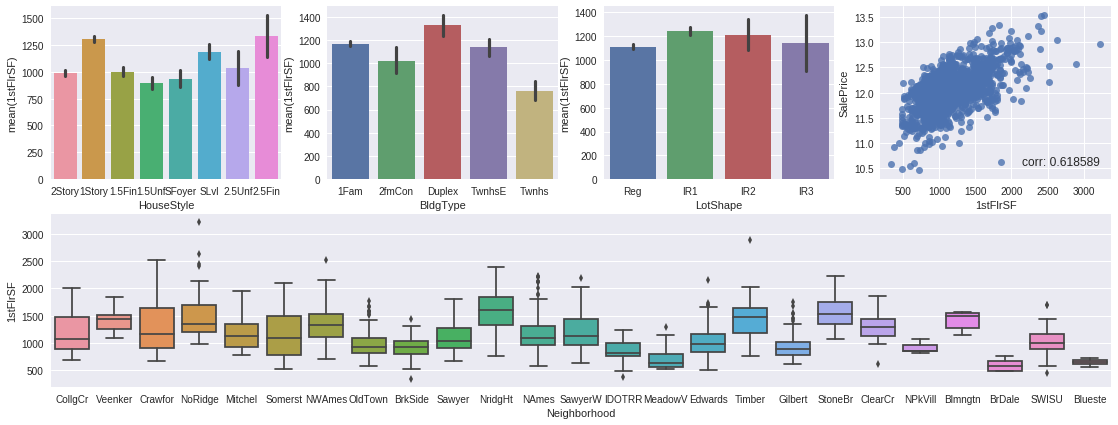

In [88]:
size_based_feature_analysis('1stFlrSF')



```
# Continuous numeric & high positive correlation with SalePrice
varient to = neighborhood, House-Style and building-type
Invarient to = lotShape. Decision = Slicing and creating dummies
```



In [89]:
all_data['1stFlrSF_Band'] = pd.cut(all_data['1stFlrSF'], 6)
pd.DataFrame({'seperations' :all_data['1stFlrSF_Band'].unique()})

seperations
0  (329.239, 1127.5]
1   (1127.5, 1921.0]
2   (1921.0, 2714.5]
3   (2714.5, 3508.0]
4   (3508.0, 4301.5]
5   (4301.5, 5095.0]

In [90]:
slices = slicing(list(all_data['1stFlrSF_Band'].unique()))
slices_df= pd.DataFrame({'slices' : slices})
slices_df

slices
0  329.2390
1 1127.5000
2 1921.0000
3 2714.5000
4 3508.0000
5 4301.5000
6 5095.0000

In [91]:
all_data.loc[all_data['1stFlrSF']<=slices[1], '1stFlrSF'] = 1
all_data.loc[(all_data['1stFlrSF']>slices[1]) & (all_data['1stFlrSF']<=slices[2]), '1stFlrSF'] = 2
all_data.loc[(all_data['1stFlrSF']>slices[2]) & (all_data['1stFlrSF']<=slices[3]), '1stFlrSF'] = 3
all_data.loc[(all_data['1stFlrSF']>slices[3]) & (all_data['1stFlrSF']<=slices[4]), '1stFlrSF'] = 4
all_data.loc[(all_data['1stFlrSF']>slices[4]) & (all_data['1stFlrSF']<=slices[5]), '1stFlrSF'] = 5
all_data.loc[all_data['1stFlrSF']>slices[5], '1stFlrSF'] = 6
all_data['1stFlrSF'] = all_data['1stFlrSF'].astype(int)

all_data.drop('1stFlrSF_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ['1stFlrSF'], prefix='1stFlrSF')

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
print('Generated dummies-')
all_data.iloc[:,all_data.shape[1]-6:all_data.shape[1]].head(3)

Generated dummies-


1stFlrSF_1  1stFlrSF_2  1stFlrSF_3  1stFlrSF_4  1stFlrSF_5  1stFlrSF_6
0           1           0           0           0           0           0
1           0           1           0           0           0           0
2           1           0           0           0           0           0

####8.2.13 2ndFlrSF

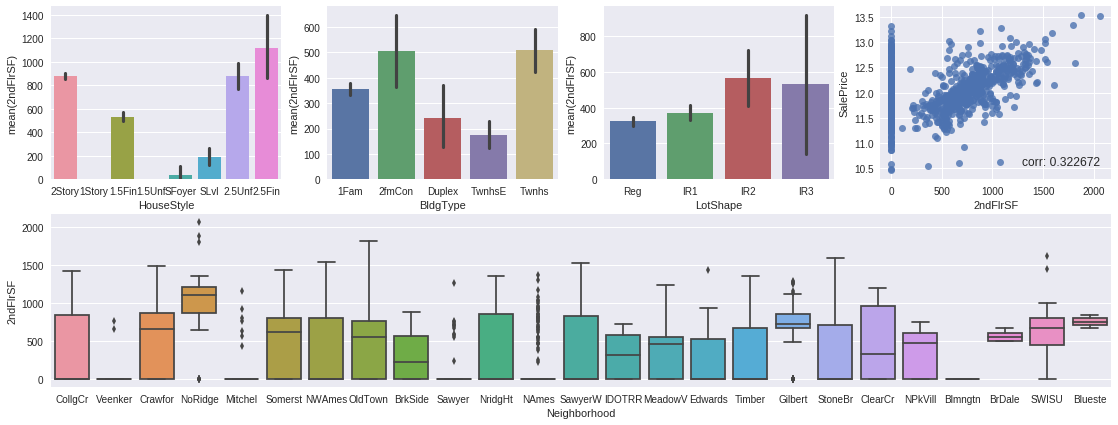

In [92]:
size_based_feature_analysis('2ndFlrSF')



```
# type = continuous numeric but large number of zero-values
correlation with SalePrice = highly positive
varient to = neighborhood, House-Style, Lot-shape and building-type
Decision = Slicing and creating dummies
```



In [93]:
all_data['2ndFlrSF_Band'] = pd.cut(all_data['2ndFlrSF'], 6)
pd.DataFrame({'seperations' :all_data['2ndFlrSF_Band'].unique()})

seperations
0     (688.333, 1032.5]
1     (-2.065, 344.167]
2    (1032.5, 1376.667]
3    (344.167, 688.333]
4  (1376.667, 1720.833]
5    (1720.833, 2065.0]

In [94]:
slices = slicing(list(all_data['2ndFlrSF_Band'].unique()))
slices_df = pd.DataFrame({'slices' : slices}).sort_values(by=['slices']).reset_index(drop = True)
slices = list(slices_df['slices'])
print('Slicing 2ndFlrSF')
slices_df

Slicing 2ndFlrSF


slices
0  344.1670
1  688.3330
2  688.3330
3 1032.5000
4 1376.6670
5 1720.8330
6 2065.0000

In [95]:
all_data.loc[all_data['2ndFlrSF']<=slices[zero], '2ndFlrSF'] = 1
all_data.loc[(all_data['2ndFlrSF']>slices[zero]) & (all_data['2ndFlrSF']<=slices[2]), '2ndFlrSF'] = 2
all_data.loc[(all_data['2ndFlrSF']>slices[2]) & (all_data['2ndFlrSF']<=slices[3]), '2ndFlrSF'] = 3
all_data.loc[(all_data['2ndFlrSF']>slices[3]) & (all_data['2ndFlrSF']<=slices[4]), '2ndFlrSF'] = 4
all_data.loc[(all_data['2ndFlrSF']>slices[4]) & (all_data['2ndFlrSF']<=slices[5]), '2ndFlrSF'] = 5
all_data.loc[all_data['2ndFlrSF']>slices[5], '2ndFlrSF'] = 6
all_data['2ndFlrSF'] = all_data['2ndFlrSF'].astype(int)

all_data.drop('2ndFlrSF_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ['2ndFlrSF'], prefix='2ndFlrSF')

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
print('Generated dummies-')
all_data.iloc[:,all_data.shape[1]-6:all_data.shape[1]].head(3)

Generated dummies-


2ndFlrSF_1  2ndFlrSF_2  2ndFlrSF_3  2ndFlrSF_4  2ndFlrSF_5  2ndFlrSF_6
0           0           0           1           0           0           0
1           1           0           0           0           0           0
2           0           0           1           0           0           0

####8.2.14 LowQualFinSF
<p>Low Quality Finished Square-feet. A size-based feature</p>

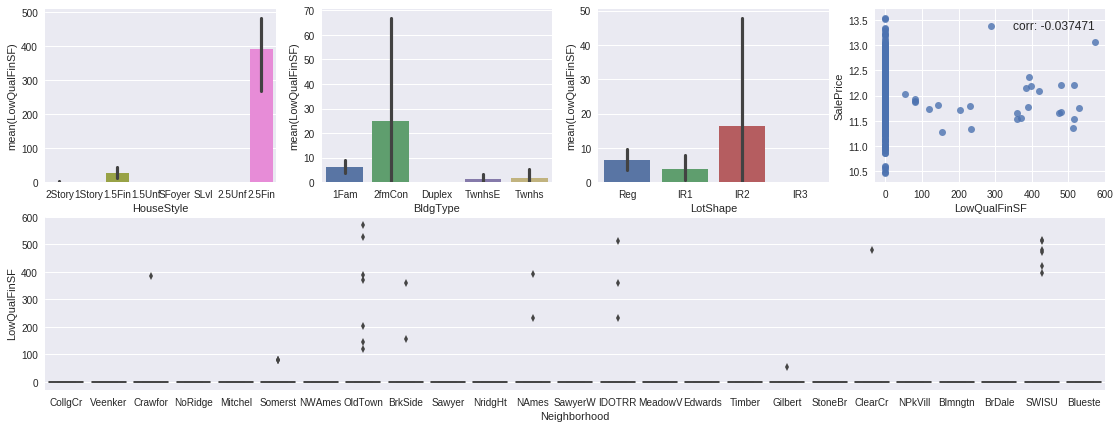

In [96]:
size_based_feature_analysis('LowQualFinSF')

<p>large number values are zero. So no correlation with SalePrice. So we will replace this feature with flag</p>

In [97]:
all_data['LowQualFinSF_Flag'] = all_data['LowQualFinSF'].map(lambda x:zero if x==zero else 1)
all_data.drop('LowQualFinSF', axis=1, inplace=True)

# LETS DISCOVER THE FLAG GENERATED
all_data.iloc[:,all_data.shape[1]-1:all_data.shape[1]].head(3)

LowQualFinSF_Flag
0                  0
1                  0
2                  0

####8.2.15 TotalBathrooms



```
# Creating a total bathrooms feature by adding all bathroom-related features
```



In [98]:
all_data['TotalBathrooms'] = all_data['BsmtHalfBath'] + all_data['BsmtFullBath'] + all_data['HalfBath'] + all_data['FullBath']
columns = ['BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'FullBath']
all_data.drop(columns, axis=1, inplace=True)

# LETS DISCOVER THE VARIABLE GENERATED
all_data.iloc[:,all_data.shape[1]-1:all_data.shape[1]].head(3)

TotalBathrooms
0          4.0000
1          3.0000
2          4.0000

####8.2.16 BedroomAbvGr

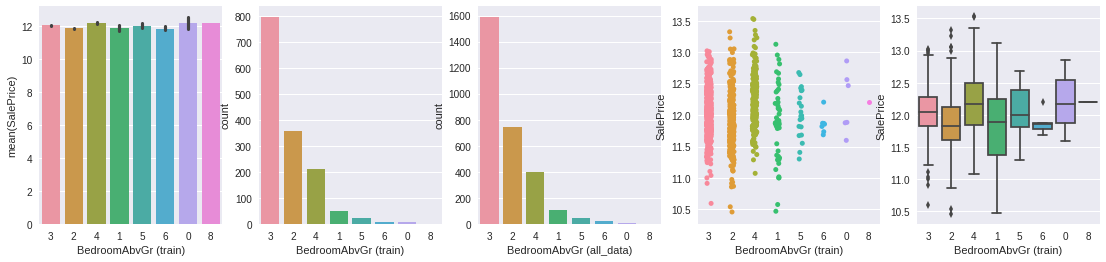

In [99]:
type_based_feature_analysis('BedroomAbvGr')

<p>Most house has 3 bedrooms. This is a continuous numeric feature. So we will keep it as it is</p>

####8.2.17 KitchenAbvGr

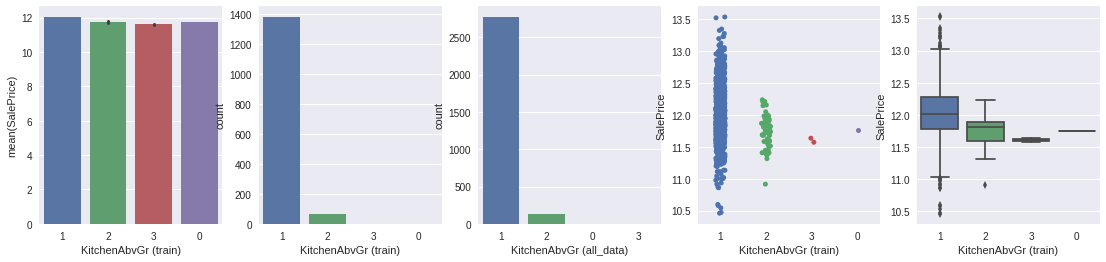

In [100]:
type_based_feature_analysis('KitchenAbvGr')

<p>This is a continuous numeric feature. So we will keep it as it is</p>

####8.2.18 KitchenQual

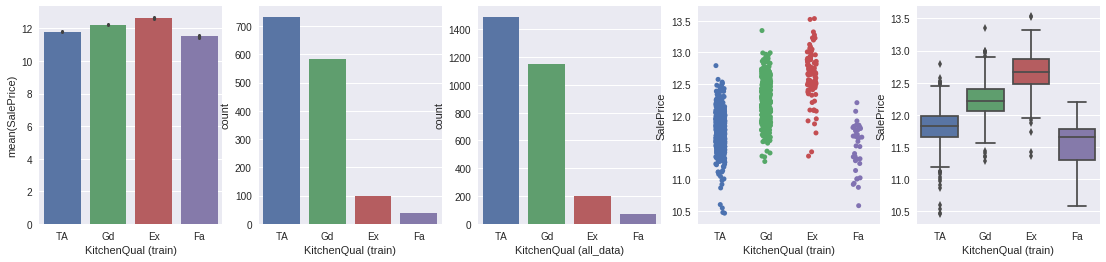

In [101]:
type_based_feature_analysis('KitchenQual')

<p>The feature contains comparative information in its order. So we will categorize it</p>

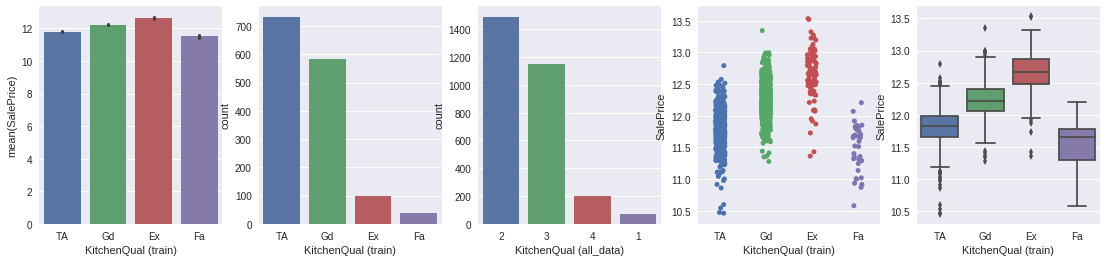

In [102]:
all_data['KitchenQual'] = all_data['KitchenQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})

# AFTER FEATURE ENGINEERING
type_based_feature_analysis('KitchenQual')

<p>So the feature: KitchenQual has been label-encoded</p>

####8.2.19 TotRmsAbvGrd

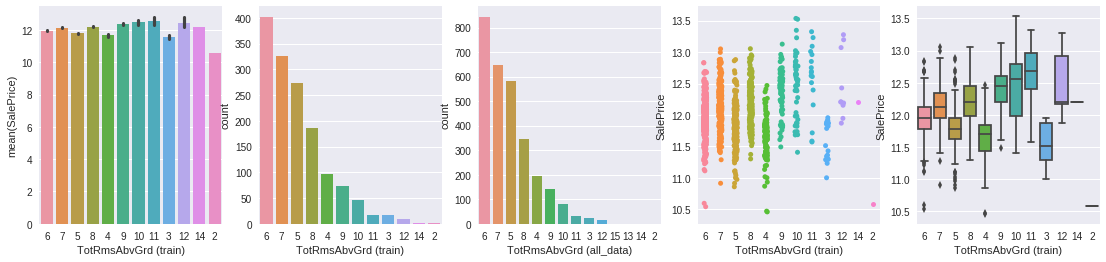

In [103]:
type_based_feature_analysis('TotRmsAbvGrd')

<p>This is a continuous numeric feature. So we will keep it as it is</p>

####8.2.20 Fireplaces

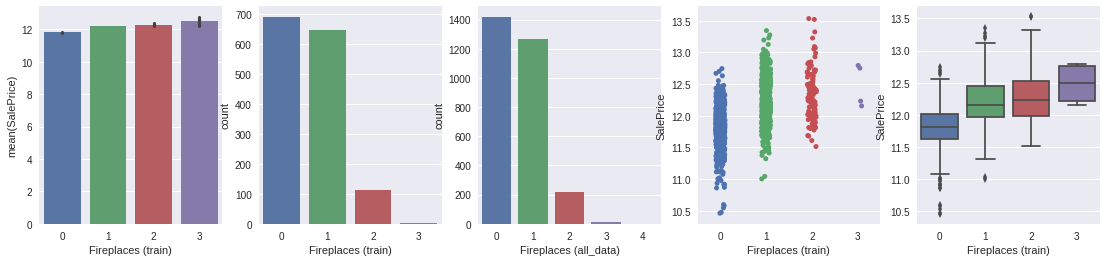

In [104]:
type_based_feature_analysis('Fireplaces')

<p>This is a continuous numeric feature. So we will keep it as it is</p>

####8.2.21 FireplaceQu

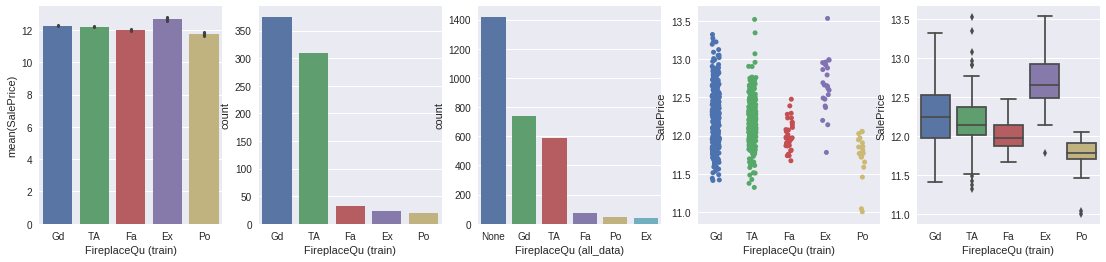

In [105]:
type_based_feature_analysis('FireplaceQu')



```
# The feature contains comparative information in its oreder. So we will categorize it
```



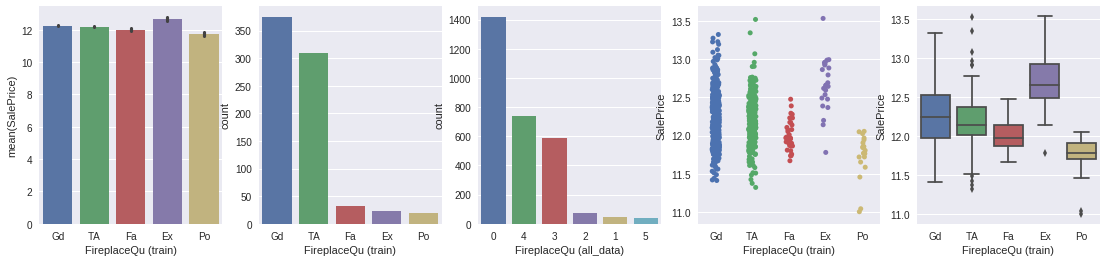

In [106]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].map({"None":zero, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

# AFTER FEATURE ENGINEERING
type_based_feature_analysis('FireplaceQu')

####8.2.22 GrLivArea

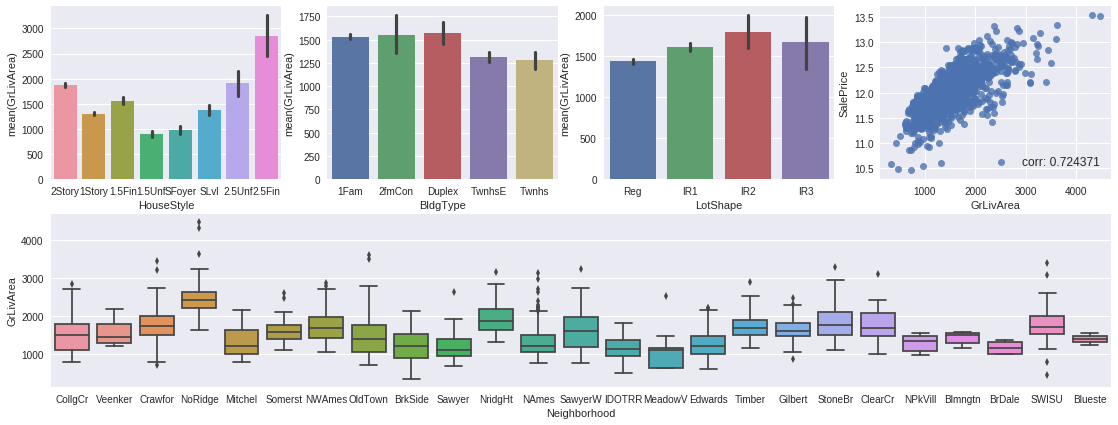

In [107]:
size_based_feature_analysis('GrLivArea')

<p>High positive correlation with SalePrice so we Slice it & make dummies</p>

In [108]:
all_data['GrLivArea_Band'] = pd.cut(all_data['GrLivArea'], 6)

pd.DataFrame({'seperations' :all_data['GrLivArea_Band'].unique()})

seperations
0   (1127.5, 1921.0]
1   (1921.0, 2714.5]
2  (329.239, 1127.5]
3   (2714.5, 3508.0]
4   (3508.0, 4301.5]
5   (4301.5, 5095.0]

In [109]:
slices = slicing(list(all_data['GrLivArea_Band'].unique()))
slices_df= pd.DataFrame({'slices' : slices})
slices_df

slices
0 1127.5000
1 1921.0000
2 2714.5000
3 1127.5000
4 3508.0000
5 4301.5000
6 5095.0000

In [110]:
all_data.loc[all_data['GrLivArea']<=slices[zero], 'GrLivArea'] = 1
all_data.loc[(all_data['GrLivArea']>slices[zero]) & (all_data['GrLivArea']<=slices[1]), 'GrLivArea'] = 2
all_data.loc[(all_data['GrLivArea']>slices[1]) & (all_data['GrLivArea']<=slices[2]), 'GrLivArea'] = 3
all_data.loc[(all_data['GrLivArea']>slices[2]) & (all_data['GrLivArea']<=slices[4]), 'GrLivArea'] = 4
all_data.loc[(all_data['GrLivArea']>slices[4]) & (all_data['GrLivArea']<=slices[5]), 'GrLivArea'] = 5
all_data.loc[all_data['GrLivArea']>slices[5], 'GrLivArea'] = 6
all_data['GrLivArea'] = all_data['GrLivArea'].astype(int)

all_data.drop('GrLivArea_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["GrLivArea"], prefix="GrLivArea")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-6:all_data.shape[1]].head(3)

GrLivArea_1  GrLivArea_2  GrLivArea_3  GrLivArea_4  GrLivArea_5  \
0            0            1            0            0            0   
1            0            1            0            0            0   
2            0            1            0            0            0   

   GrLivArea_6  
0            0  
1            0  
2            0

####8.2.23 MSSubClass

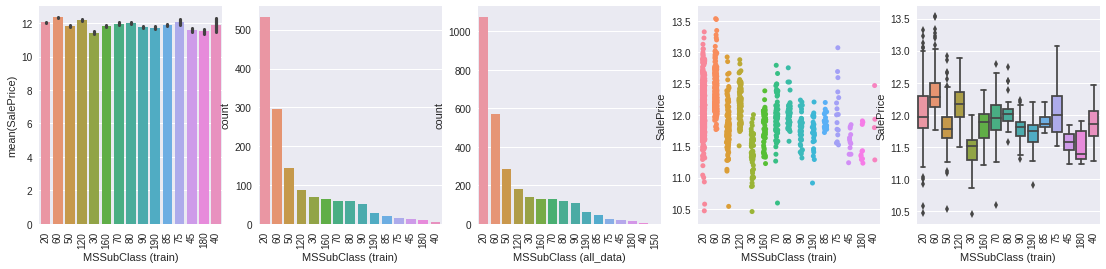

In [111]:
type_based_feature_analysis('MSSubClass', rotation = ninety)

<p>This is a numeric feature with categories no comparative relation in between. So we will just do dummy-generation</p>

In [112]:
uniques=(all_data['MSSubClass'].unique()).size
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data = pd.get_dummies(all_data, columns = ['MSSubClass'], prefix='MSSubClass')

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-uniques:all_data.shape[1]].head(3)

MSSubClass_120  MSSubClass_150  MSSubClass_160  MSSubClass_180  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   

   MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0               0              0              0              0              0   
1               0              1              0              0              0   
2               0              0              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  
0              0              0  
1              0              0  
2              0              0

####8.2.24 BldgType

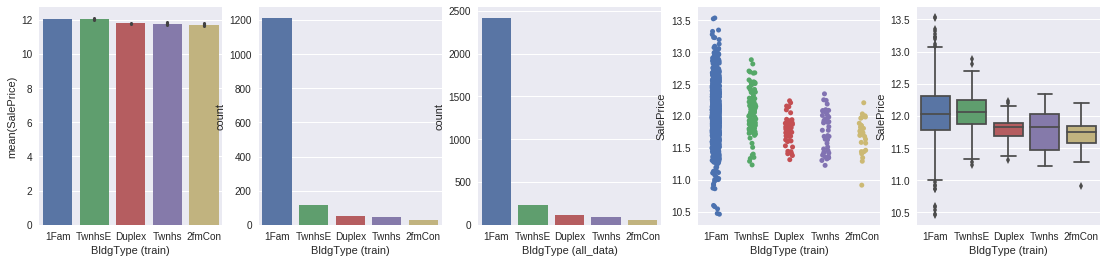

In [113]:
type_based_feature_analysis('BldgType')

<p>This is a numeric feature with categories no comparative relation in between. So we will just do dummy-generation</p>

In [114]:
uniques=(all_data['BldgType'].unique()).size
all_data['BldgType'] = all_data['BldgType'].astype(str)

all_data = pd.get_dummies(all_data, columns = ["BldgType"], prefix="BldgType")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-uniques:all_data.shape[1]].head(3)

BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   

   BldgType_TwnhsE  
0                0  
1                0  
2                0

####8.2.25 HouseStyle

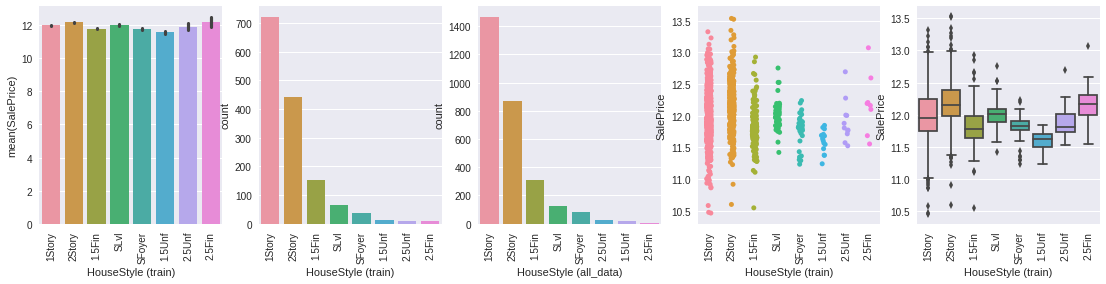

In [115]:
type_based_feature_analysis('HouseStyle', rotation = ninety)

<p>The highest average SalePrice comes from 2.5Fin though 2Story houses are also very highly priced on average. So we will cluster these into one category and then create dummy variables.</p>

After clustering


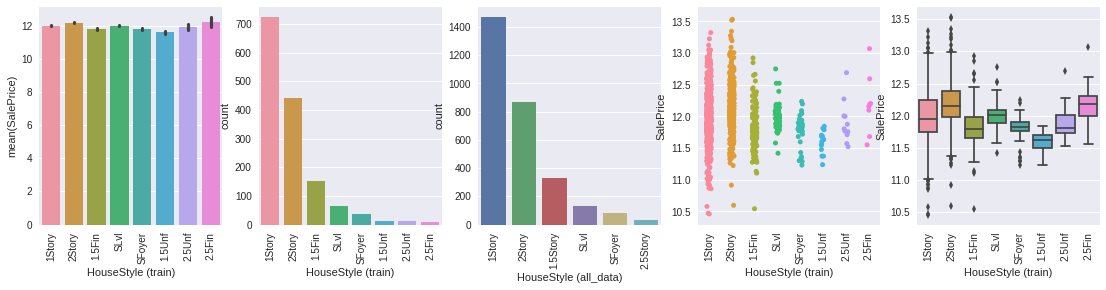

In [116]:
all_data['HouseStyle'] = all_data['HouseStyle'].map({"2Story":"2Story", "1Story":"1Story", "1.5Fin":"1.5Story", 
                                                     "1.5Unf":"1.5Story","SFoyer":"SFoyer", "SLvl":"SLvl", 
                                                     "2.5Unf":"2.5Story", "2.5Fin":"2.5Story"})

# AFTER CLUSTERING
print('After clustering')
type_based_feature_analysis('HouseStyle', rotation = ninety)

<P>The categories have no comperative relationship in between them. so lets generate dummies</P>

In [117]:
uniques=(all_data['HouseStyle'].unique()).size
all_data = pd.get_dummies(all_data, columns = ['HouseStyle'], prefix='HouseStyle')

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-uniques:all_data.shape[1]].head(3)

HouseStyle_1.5Story  HouseStyle_1Story  HouseStyle_2.5Story  \
0                    0                  0                    0   
1                    0                  1                    0   
2                    0                  0                    0   

   HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  
0                  1                  0                0  
1                  0                  0                0  
2                  1                  0                0

####8.2.26 OverallQual

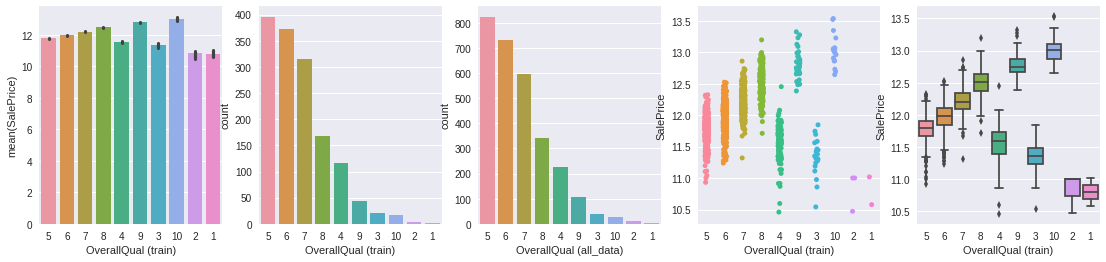

In [118]:
type_based_feature_analysis('OverallQual')

<p>This is a continuous numeric feature with comperative categories. So we will keep it as it is</p>

####8.2.27 OverallCond

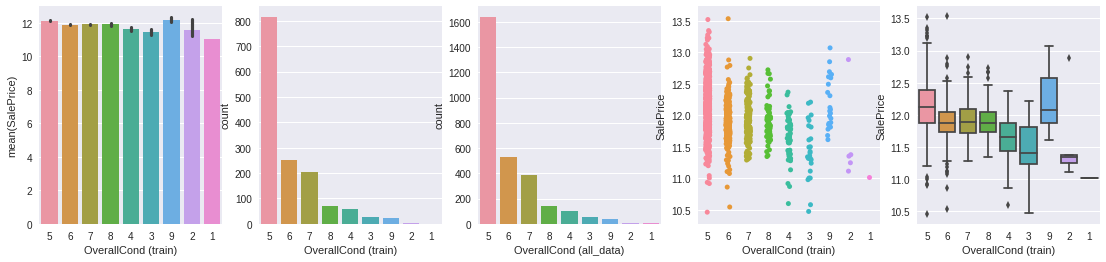

In [119]:
type_based_feature_analysis('OverallCond')



```
# This is a continuous numeric feature with comperative categories. So we will keep it as it is
```



####8.2.28 YearRemodAdd
<p>This is a year-based feature showing the year of adding remodification to the houses.</p>

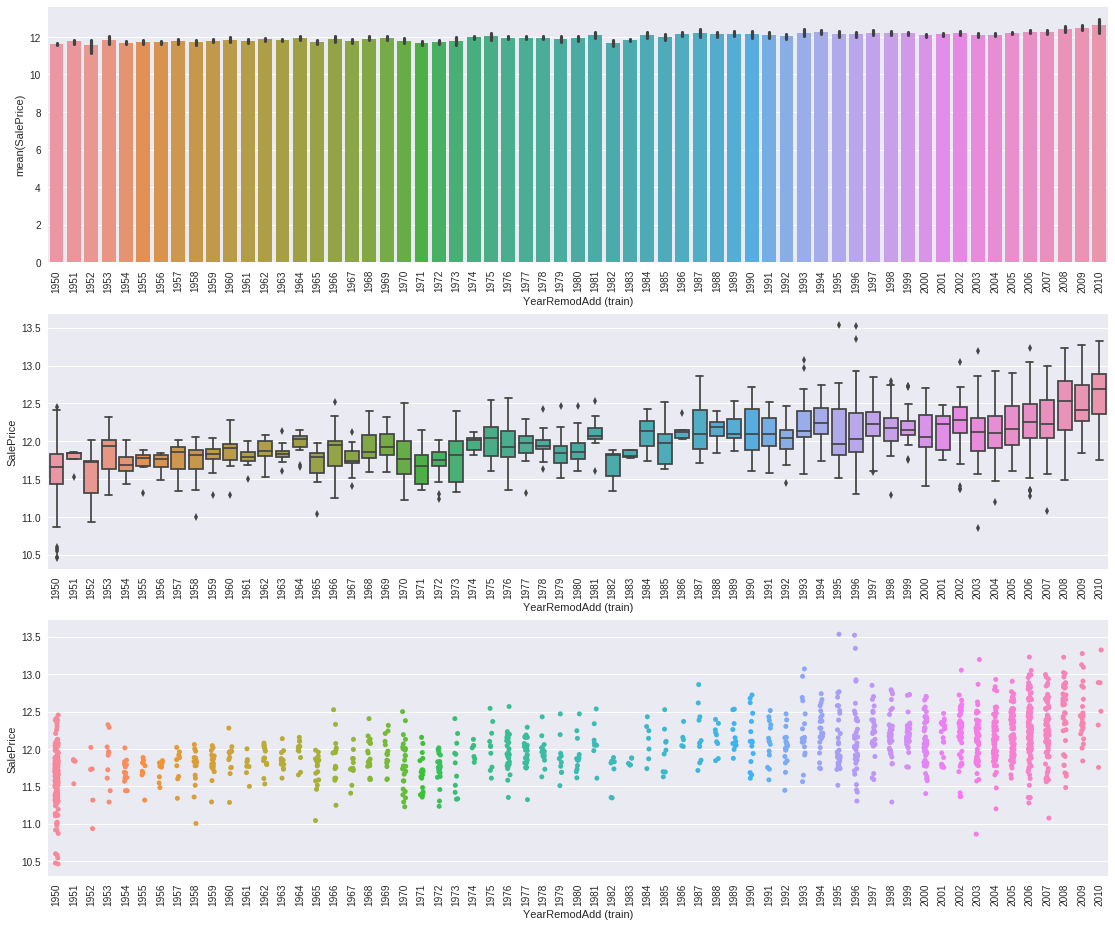

In [120]:
year_based_feature_analysis('YearRemodAdd')

<p>Here the newer the remodelling of a house, the higher the SalePrice. Therefore creating a new feature describing the time-gap in between remodeling and construction may be a good choice.</p>

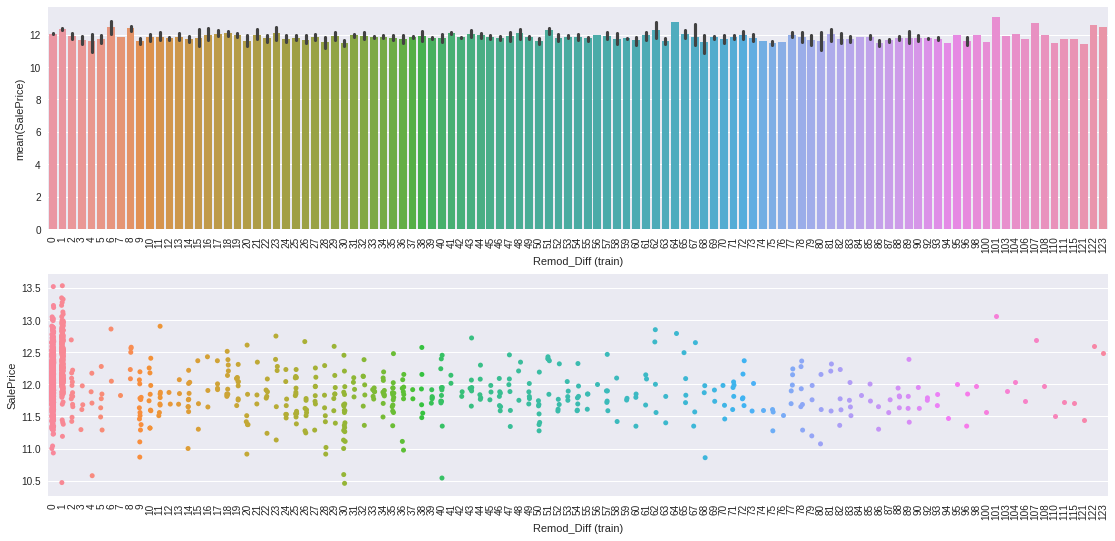

In [121]:
train['Remod_Diff'] = train['YearRemodAdd'] - train['YearBuilt']
year_based_feature_analysis('Remod_Diff', box=False)

<p>Now we can see clearly that houses modified recently have much higher SalePrice than others. So lets apply it on all_data now</p>

In [122]:
all_data['Remod_Diff'] = all_data['YearRemodAdd'] - all_data['YearBuilt']
all_data.drop('YearRemodAdd', axis=1, inplace=True)

#LETS DISCOVER THE NEW-VARIABLE GENERATED
all_data.iloc[:,all_data.shape[1]-1:all_data.shape[1]].head(3)

Remod_Diff
0           0
1           0
2           1

####8.2.29 YearBuilt

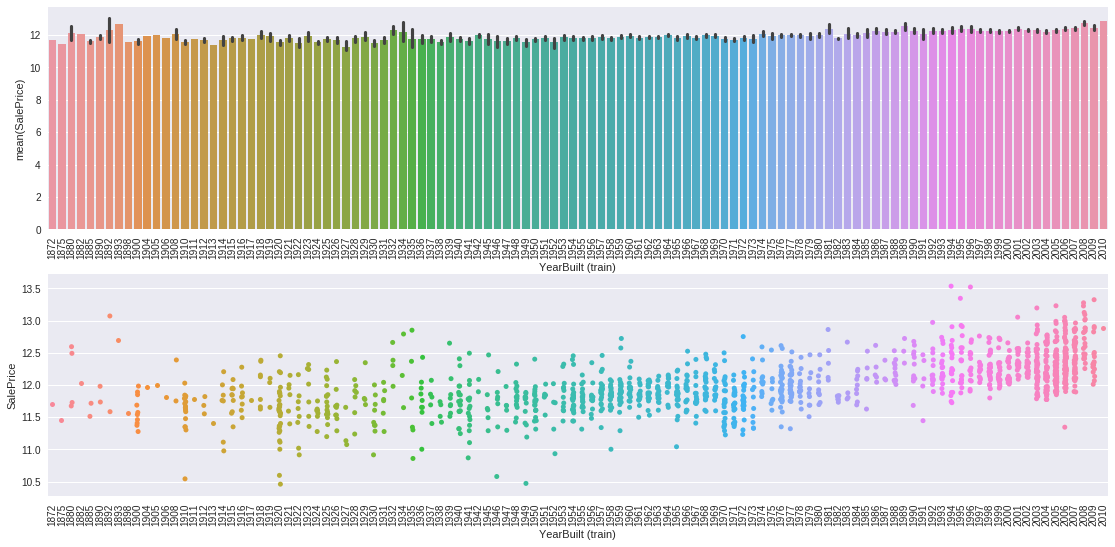

In [123]:
year_based_feature_analysis('YearBuilt', box=False)

<p>Latest houses have higher SalePrice. So there is a good corrilation. So we are going to create slices and dummys</p>

In [124]:
all_data['YearBuilt_Band'] = pd.cut(all_data['YearBuilt'], 7)

pd.DataFrame({'seperations' :all_data['YearBuilt_Band'].unique()})

seperations
0    (1990.286, 2010.0]
1  (1970.571, 1990.286]
2  (1911.429, 1931.143]
3  (1931.143, 1950.857]
4  (1950.857, 1970.571]
5  (1891.714, 1911.429]
6  (1871.862, 1891.714]

In [125]:
slices = slicing(list(all_data['YearBuilt_Band'].unique()))
slices_df = pd.DataFrame({'slices' : slices}).sort_values(by=['slices']).reset_index(drop = True)
slices = list(slices_df['slices'])
slices_df

slices
0 1891.7140
1 1911.4290
2 1931.1430
3 1950.8570
4 1970.5710
5 1990.2860
6 1990.2860
7 2010.0000

In [126]:
all_data.loc[all_data['YearBuilt']<=slices[zero], 'YearBuilt'] = 1
all_data.loc[(all_data['YearBuilt']>slices[zero]) & (all_data['YearBuilt']<=slices[1]), 'YearBuilt'] = 2
all_data.loc[(all_data['YearBuilt']>slices[1]) & (all_data['YearBuilt']<=slices[2]), 'YearBuilt'] = 3
all_data.loc[(all_data['YearBuilt']>slices[2]) & (all_data['YearBuilt']<=slices[3]), 'YearBuilt'] = 4
all_data.loc[(all_data['YearBuilt']>slices[3]) & (all_data['YearBuilt']<=slices[4]), 'YearBuilt'] = 5
all_data.loc[(all_data['YearBuilt']>slices[4]) & (all_data['YearBuilt']<=slices[5]), 'YearBuilt'] = 6
all_data.loc[all_data['YearBuilt']>slices[5], 'YearBuilt'] = 7
all_data['YearBuilt'] = all_data['YearBuilt'].astype(int)

all_data.drop('YearBuilt_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["YearBuilt"], prefix="YearBuilt")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-7:all_data.shape[1]].head(3)

YearBuilt_1  YearBuilt_2  YearBuilt_3  YearBuilt_4  YearBuilt_5  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   

   YearBuilt_6  YearBuilt_7  
0            0            1  
1            1            0  
2            0            1

####8.2.30 Foundation

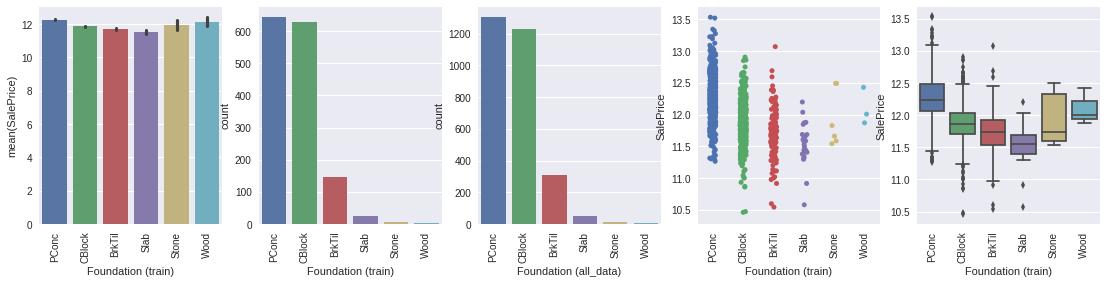

In [127]:
type_based_feature_analysis('Foundation', rotation = ninety)



```
# The categories of this feature are not comperative.So no need to label them. So lets create dummies
```



In [128]:
all_data = pd.get_dummies(all_data, columns = ["Foundation"], prefix="Foundation")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-6:all_data.shape[1]].head(3)

Foundation_BrkTil  Foundation_CBlock  Foundation_PConc  Foundation_Slab  \
0                  0                  0                 1                0   
1                  0                  1                 0                0   
2                  0                  0                 1                0   

   Foundation_Stone  Foundation_Wood  
0                 0                0  
1                 0                0  
2                 0                0

####8.2.31 Functional

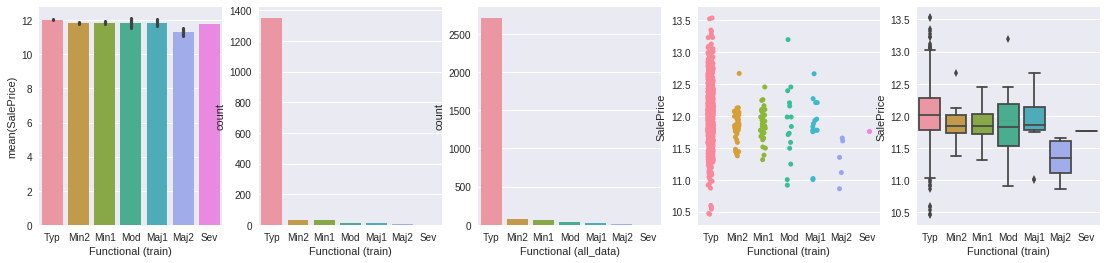

In [129]:
type_based_feature_analysis('Functional')

<P>Categories of this feature are comperative (maintains order). So lets just label them</P>

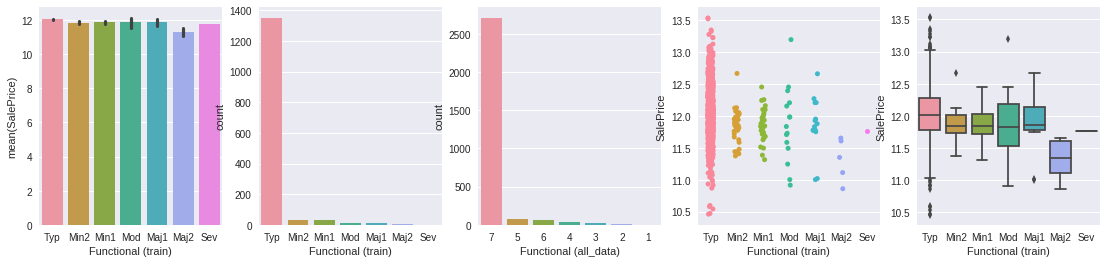

In [130]:
all_data['Functional'] = all_data['Functional'].map({"Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7})

# AFTER FEATURE ENGINEERING
type_based_feature_analysis('Functional')

####8.2.32 RoofStyle

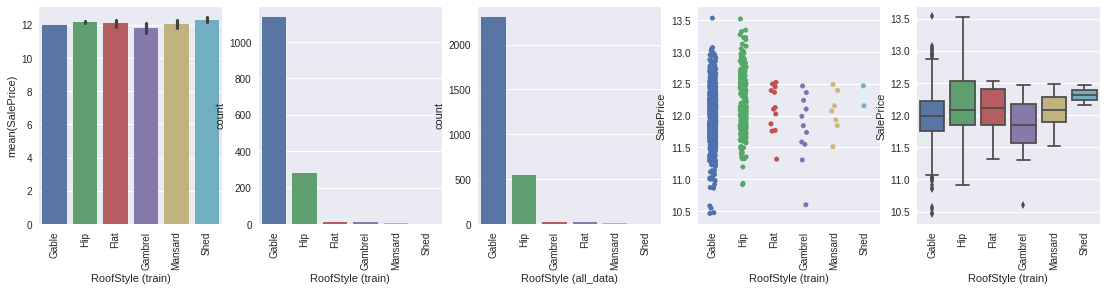

In [131]:
type_based_feature_analysis('RoofStyle',rotation = ninety)

<P>Categories of this feature are not comperative(no order). So lets just get dummies</P>

In [132]:
all_data = pd.get_dummies(all_data, columns = ["RoofStyle"], prefix="RoofStyle")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-6:all_data.shape[1]].head(3)

RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
0               0                1                  0              0   
1               0                1                  0              0   
2               0                1                  0              0   

   RoofStyle_Mansard  RoofStyle_Shed  
0                  0               0  
1                  0               0  
2                  0               0

####8.2.33 RoofMatl

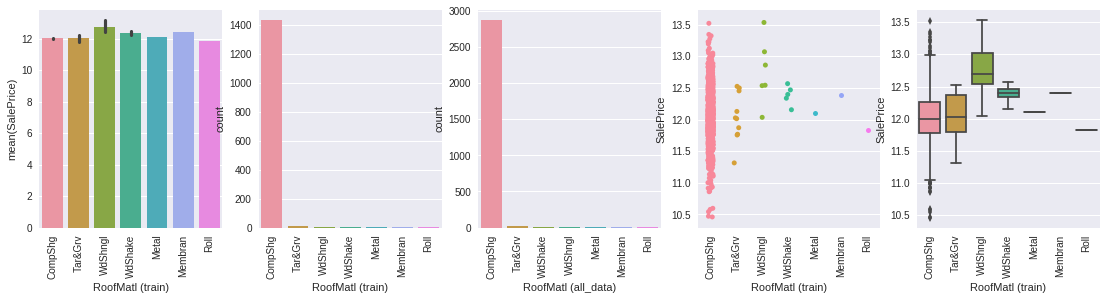

In [133]:
type_based_feature_analysis('RoofMatl', rotation = ninety)

<P>Categories of this feature are not comperative(no order). So lets just get dummies</P>

In [134]:
all_data = pd.get_dummies(all_data, columns = ['RoofMatl'], prefix='RoofMatl')

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-7:all_data.shape[1]].head(3)

RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  \
0                 1                 0               0              0   
1                 1                 0               0              0   
2                 1                 0               0              0   

   RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  
0                 0                 0                 0  
1                 0                 0                 0  
2                 0                 0                 0

####8.2.34 Exterior1st & Exterior2nd

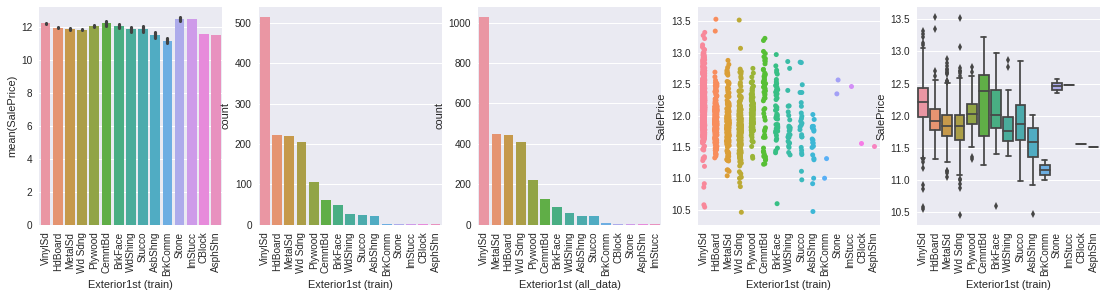

In [135]:
type_based_feature_analysis('Exterior1st', rotation = ninety)

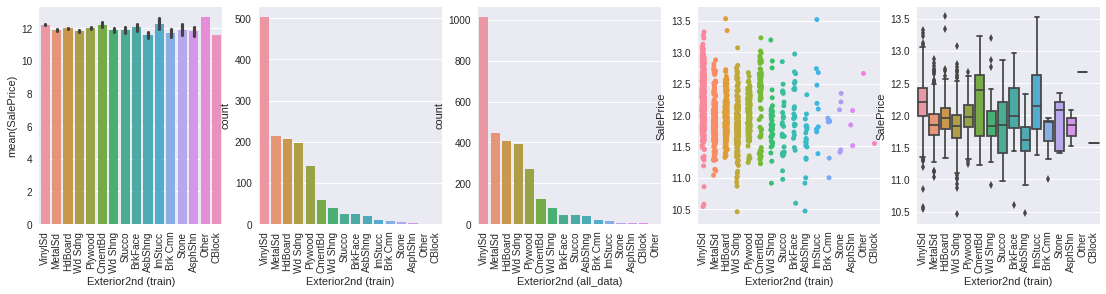

In [136]:
type_based_feature_analysis('Exterior2nd', rotation = ninety)

<p>Exterior1st and Exterior2nd are almost same. So we replace exterior2nd with a flag to represent whether it is similar to Exterior1st or not. We will keep Exterior1st and create dummys from it.</p>

In [137]:
def Exter2(col):
    if col['Exterior2nd'] == col['Exterior1st']:
        return 1
    else:
        return zero
    
all_data['ExteriorMatch_Flag'] = all_data.apply(Exter2, axis=1)
all_data.drop('Exterior2nd', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["Exterior1st"], prefix="Exterior1st")

#LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-16:all_data.shape[1]].head(3)

ExteriorMatch_Flag  Exterior1st_AsbShng  Exterior1st_AsphShn  \
0                   1                    0                    0   
1                   1                    0                    0   
2                   1                    0                    0   

   Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   

   Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   

   Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  \
0                    0                    0                  0   
1                    1                    0                  0   
2                    0                    0                  0   

   Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  \
0                   0                    1                    0   
1                   0                    0                    0   
2                   0                    1                    0   

   Exterior1st_WdShing  
0                    0  
1                    0  
2                    0

####8.2.35 MasVnrType

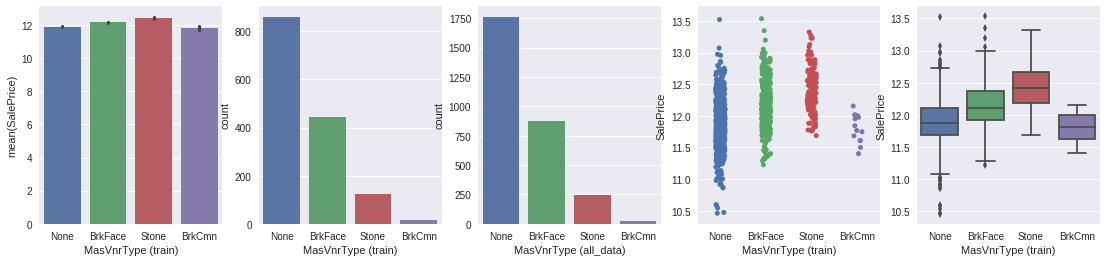

In [138]:
type_based_feature_analysis('MasVnrType')

<P>Categories are not comperative. So lets dummy it</P>

In [139]:
all_data = pd.get_dummies(all_data, columns = ["MasVnrType"], prefix="MasVnrType")

#LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-4:all_data.shape[1]].head(3)

MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone
0                  0                   1                0                 0
1                  0                   0                1                 0
2                  0                   1                0                 0

####8.2.36 MasVnrArea

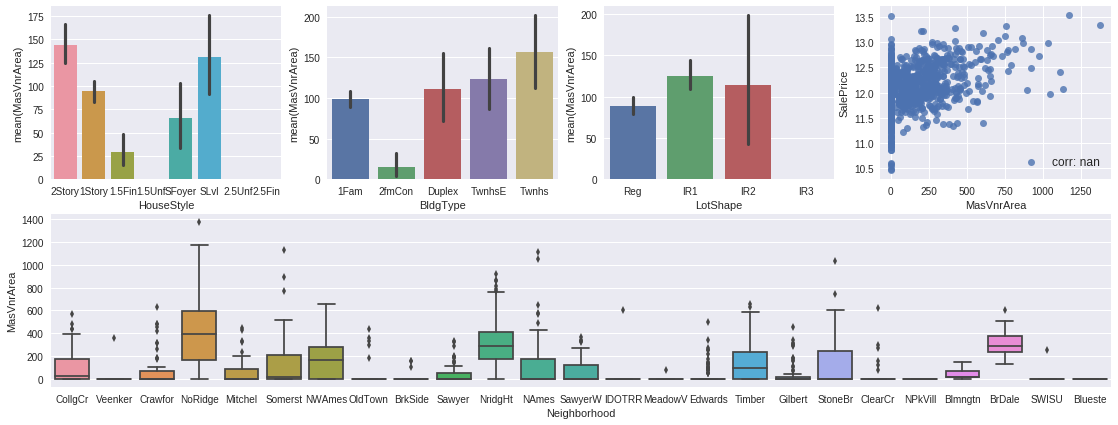

In [140]:
size_based_feature_analysis('MasVnrArea')

<p>No corrilation to salePrice! So we Just drop it</p>

In [0]:
all_data.drop('MasVnrArea', axis=1, inplace=True)

####8.2.37 ExterQual

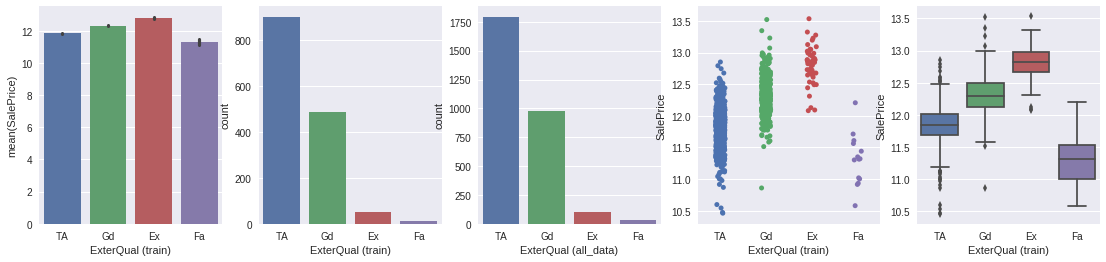

In [142]:
type_based_feature_analysis('ExterQual')

<p>Categories are comperative (maintains order among them). so lets label it</p>

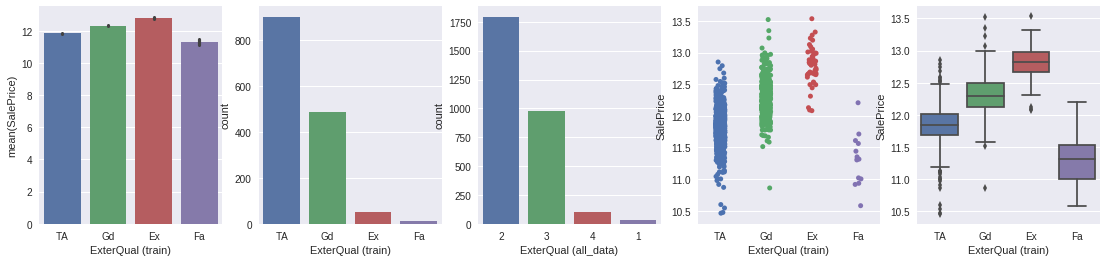

In [143]:
all_data['ExterQual'] = all_data['ExterQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
# AFTER FEATURE ENGINEERING
type_based_feature_analysis('ExterQual')

####8.2.38 ExterCond

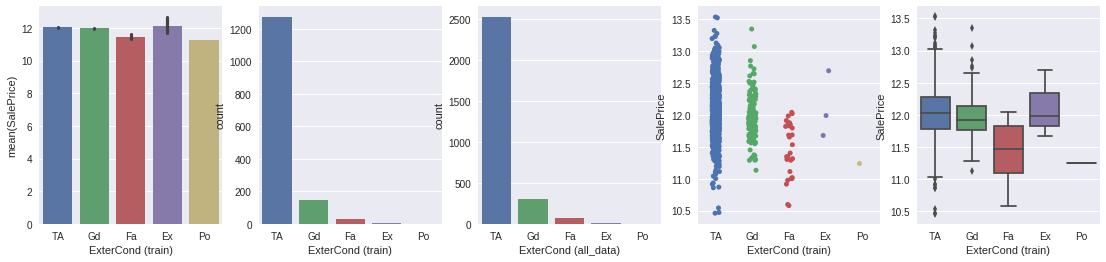

In [144]:
type_based_feature_analysis('ExterCond')

<p>This categorical feature has Comperative order. But the SalePrice has no necessary correlation to this order. So we just get dummies.</p>

In [145]:
all_data = pd.get_dummies(all_data, columns = ["ExterCond"], prefix="ExterCond")
all_data.iloc[:,all_data.shape[1]-5:all_data.shape[1]].head(3)

ExterCond_Ex  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA
0             0             0             0             0             1
1             0             0             0             0             1
2             0             0             0             0             1

####8.2.39 GarageType

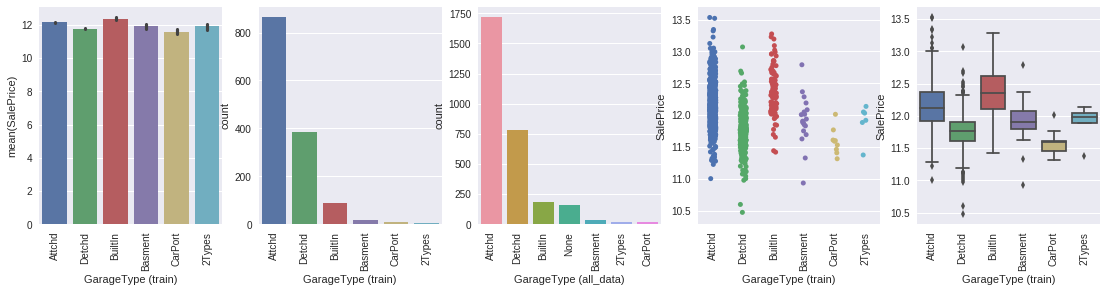

In [146]:
type_based_feature_analysis('GarageType', rotation=ninety)

<p>Categories maintain no order (not comperative). so just get dummies</p>

In [147]:
all_data = pd.get_dummies(all_data, columns = ["GarageType"], prefix="GarageType")
# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-6:all_data.shape[1]].head(3)

GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_None  
0                   0                  0                0  
1                   0                  0                0  
2                   0                  0                0

####8.2.40 GarageYrBlt

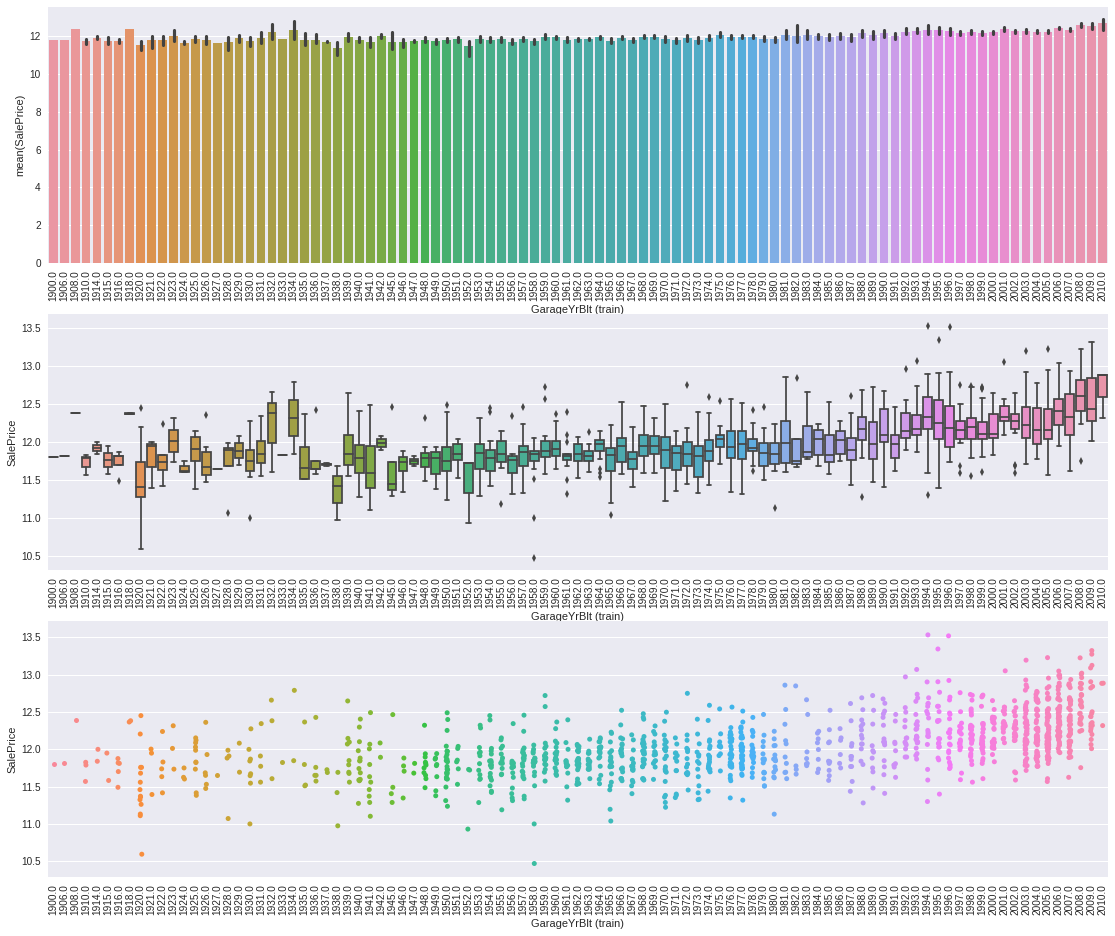

In [148]:
year_based_feature_analysis('GarageYrBlt')

<p>Most of the recently built garages are found with high salePrice. So good corrilation. So we will bin this feature and generate dummy variables</p>

In [149]:
all_data['GarageYrBlt_Band'] = pd.qcut(all_data['GarageYrBlt'], 3)

pd.DataFrame({'seperations' :all_data['GarageYrBlt_Band'].unique()})

seperations
0  (1996.0, 2207.0]
1  (1964.0, 1996.0]
2  (-0.001, 1964.0]

In [150]:
slices = slicing(list(all_data['GarageYrBlt_Band'].unique()))
slices_df = pd.DataFrame({'slices' : slices}).sort_values(by=['slices']).reset_index(drop = True)
slices = list(slices_df['slices'])
slices_df

slices
0 1964.0000
1 1996.0000
2 1996.0000
3 2207.0000

In [151]:
all_data.loc[all_data['GarageYrBlt']<=slices[zero], 'GarageYrBlt'] = 1
all_data.loc[(all_data['GarageYrBlt']>slices[zero]) & (all_data['GarageYrBlt']<=slices[1]), 'GarageYrBlt'] = 2
all_data.loc[all_data['GarageYrBlt']>slices[1], 'GarageYrBlt'] = 3
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(int)
all_data.drop('GarageYrBlt_Band', axis=1, inplace=True)
all_data = pd.get_dummies(all_data, columns = ["GarageYrBlt"], prefix="GarageYrBlt")

#LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-3:all_data.shape[1]].head(3)

GarageYrBlt_1  GarageYrBlt_2  GarageYrBlt_3
0              0              0              1
1              0              1              0
2              0              0              1

####8.2.41 GarageFinish

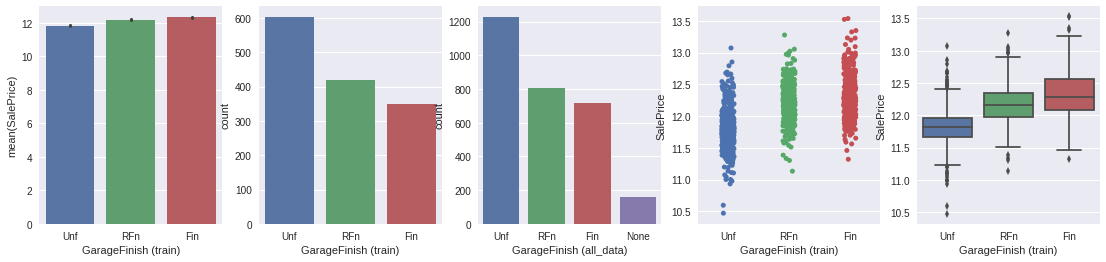

In [152]:
type_based_feature_analysis('GarageFinish')

<p>Nice split among 3 classes but categories are not ordered. So lets create dummies</p>

In [153]:
all_data = pd.get_dummies(all_data, columns = ["GarageFinish"], prefix="GarageFinish")

#LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-4:all_data.shape[1]].head(3)

GarageFinish_Fin  GarageFinish_None  GarageFinish_RFn  GarageFinish_Unf
0                 0                  0                 1                 0
1                 0                  0                 1                 0
2                 0                  0                 1                 0

####8.2.42 GarageCars

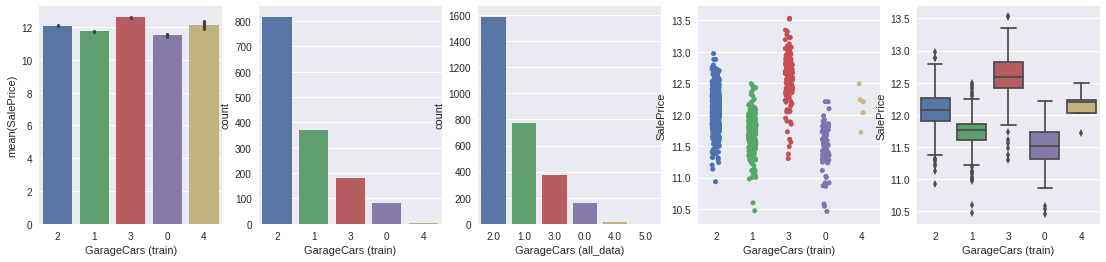

In [154]:
type_based_feature_analysis('GarageCars')

<p>Categories are corrilated to salePrice. But houses with 4 cars showed similar salePrice compared to 2 cars. This is alrady labeled as we need.</p>

####8.2.43 GarageArea

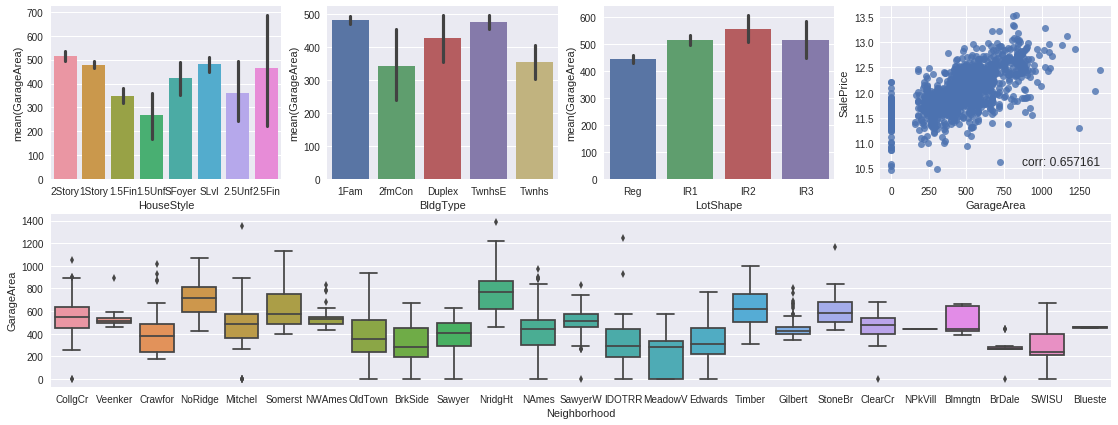

In [155]:
size_based_feature_analysis('GarageArea')

<p> High positive correlation with SalePrice. Varient to Building type and house-style. We can just bin/slice it and create dummy variables</p>

In [156]:
all_data['GarageArea_Band'] = pd.cut(all_data['GarageArea'], 3)
pd.DataFrame({'seperations' :all_data['GarageArea_Band'].unique()})

seperations
0   (496.0, 992.0]
1  (-1.488, 496.0]
2  (992.0, 1488.0]

In [157]:
slices = slicing(list(all_data['GarageArea_Band'].unique()))
slices_df = pd.DataFrame({'slices' : slices}).sort_values(by=['slices']).reset_index(drop = True)
slices = list(slices_df['slices'])
slices_df

slices
0  496.0000
1  496.0000
2  992.0000
3 1488.0000

In [158]:
all_data.loc[all_data['GarageArea']<=slices[1], 'GarageArea'] = 1
all_data.loc[(all_data['GarageArea']>slices[1]) & (all_data['GarageArea']<=slices[2]), 'GarageArea'] = 2
all_data.loc[all_data['GarageArea']>slices[2], 'GarageArea'] = 3
all_data['GarageArea'] = all_data['GarageArea'].astype(int)
all_data.drop('GarageArea_Band', axis=1, inplace=True)
all_data = pd.get_dummies(all_data, columns = ["GarageArea"], prefix="GarageArea")

#LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-3:all_data.shape[1]].head(3)

GarageArea_1  GarageArea_2  GarageArea_3
0             0             1             0
1             1             0             0
2             0             1             0

####8.2.44 GarageQual

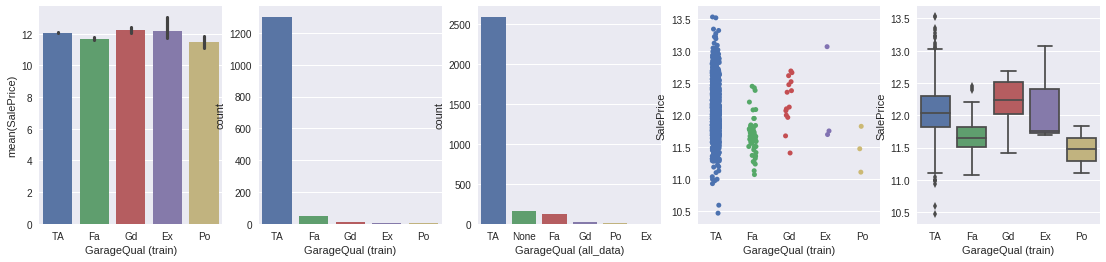

In [159]:
type_based_feature_analysis('GarageQual')

<p>Good positive corrilation to sale-price. Contains comperative information but not labeled. So lets label it. We will combine poor-garages together and good-garages together while labeling</p>

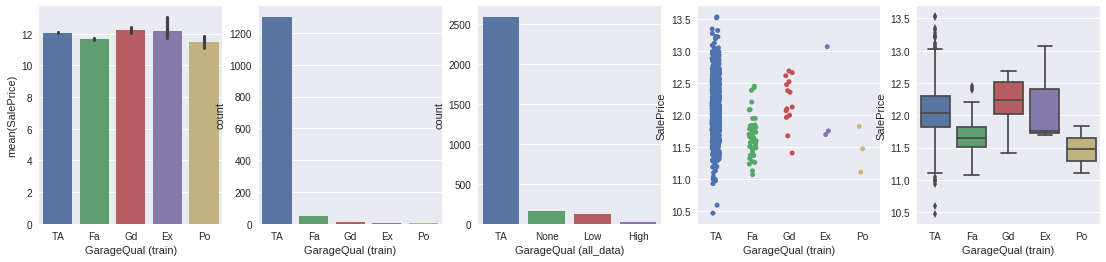

In [160]:
all_data['GarageQual'] = all_data['GarageQual'].map({"None":"None", "Po":"Low", "Fa":"Low", "TA":"TA", "Gd":"High", "Ex":"High"})

# AFTER FEATURE ENGINEERING
type_based_feature_analysis('GarageQual')

In [161]:
# MAKING DUMMIES
all_data = pd.get_dummies(all_data, columns = ["GarageQual"], prefix="GarageQual")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-4:all_data.shape[1]].head(3)

GarageQual_High  GarageQual_Low  GarageQual_None  GarageQual_TA
0                0               0                0              1
1                0               0                0              1
2                0               0                0              1

####8.2.45 GarageCond

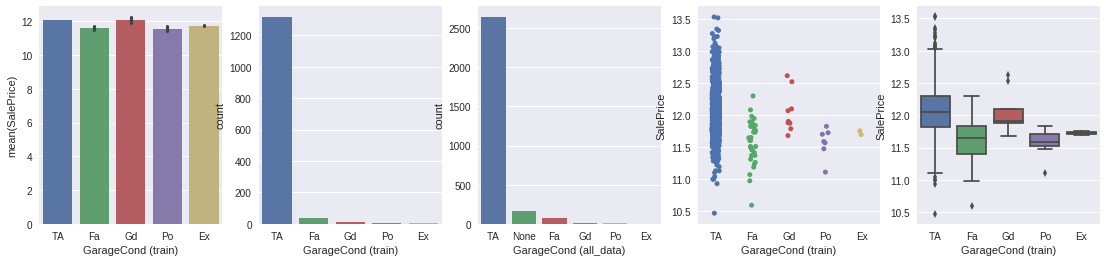

In [162]:
type_based_feature_analysis('GarageCond')

<p>Good positive corrilation to sale-price. Contains comperative information but not labeled. So lets label it. Combine poor-garages together and good-garages together while labeling</p>

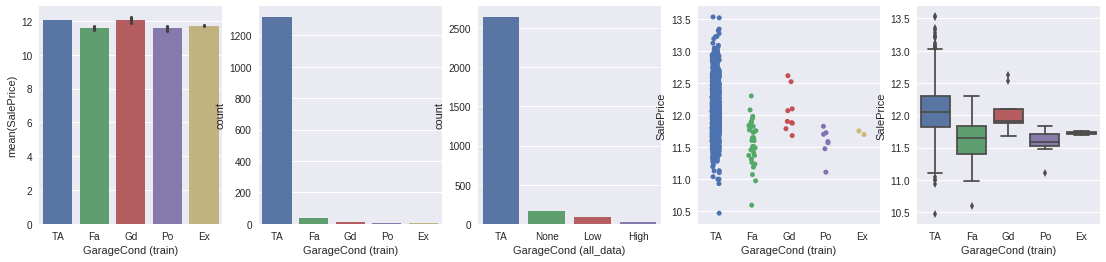

In [163]:
all_data['GarageCond'] = all_data['GarageCond'].map({"None":"None", "Po":"Low", "Fa":"Low", "TA":"TA", "Gd":"High", "Ex":"High"})

# AFTER FEATURE ENGINEERING
type_based_feature_analysis('GarageCond')

In [164]:
# MAKING DUMMIES
all_data = pd.get_dummies(all_data, columns = ["GarageCond"], prefix="GarageCond")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-4:all_data.shape[1]].head(3)

GarageCond_High  GarageCond_Low  GarageCond_None  GarageCond_TA
0                0               0                0              1
1                0               0                0              1
2                0               0                0              1

####8.2.46 WoodDeckSF

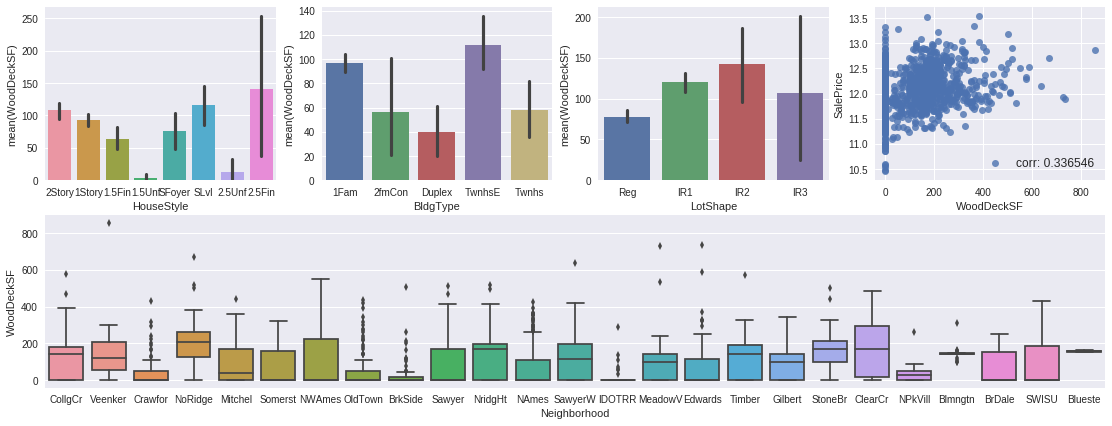

In [165]:
size_based_feature_analysis('WoodDeckSF')

<p>Varient to location, building type and house-style. High positive correlation with SalePrice bot lots of values are Zero. So we create a flag to indicate there is Wood Deck or not.</p>

In [166]:
def WoodDeckFlag(col):
    if col['WoodDeckSF'] == zero:
        return 1
    else:
        return zero
    
all_data['NoWoodDeck_Flag'] = all_data.apply(WoodDeckFlag, axis=1)

# LETS DISCOVER THE FLAG-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-1:all_data.shape[1]].head(3)

NoWoodDeck_Flag
0                1
1                0
2                1

In [167]:
# NOW WE BIN THE FEATURE AND CREATE DUMMY FEATURES FROM IT
all_data['WoodDeckSF_Band'] = pd.cut(all_data['WoodDeckSF'], 4)

pd.DataFrame({'seperations' :all_data['WoodDeckSF_Band'].unique()})

seperations
0   (-1.424, 356.0]
1    (356.0, 712.0]
2   (712.0, 1068.0]
3  (1068.0, 1424.0]

In [168]:
slices = slicing(list(all_data['WoodDeckSF_Band'].unique()))
slices_df= pd.DataFrame({'slices' : slices})
slices_df

slices
0   -1.4240
1  356.0000
2  712.0000
3 1068.0000
4 1424.0000

In [169]:
all_data.loc[all_data['WoodDeckSF']<=slices[1], 'WoodDeckSF'] = 1
all_data.loc[(all_data['WoodDeckSF']>slices[1]) & (all_data['WoodDeckSF']<=slices[2]), 'WoodDeckSF'] = 2
all_data.loc[(all_data['WoodDeckSF']>slices[2]) & (all_data['WoodDeckSF']<=slices[3]), 'WoodDeckSF'] = 3
all_data.loc[all_data['WoodDeckSF']>slices[3], 'WoodDeckSF'] = 4
all_data['WoodDeckSF'] = all_data['WoodDeckSF'].astype(int)

all_data.drop('WoodDeckSF_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["WoodDeckSF"], prefix="WoodDeckSF")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-4:all_data.shape[1]].head(3)

WoodDeckSF_1  WoodDeckSF_2  WoodDeckSF_3  WoodDeckSF_4
0             1             0             0             0
1             1             0             0             0
2             1             0             0             0

####8.2.47 OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch
<P>We will sum these features together to get total porch in square-feet</P>

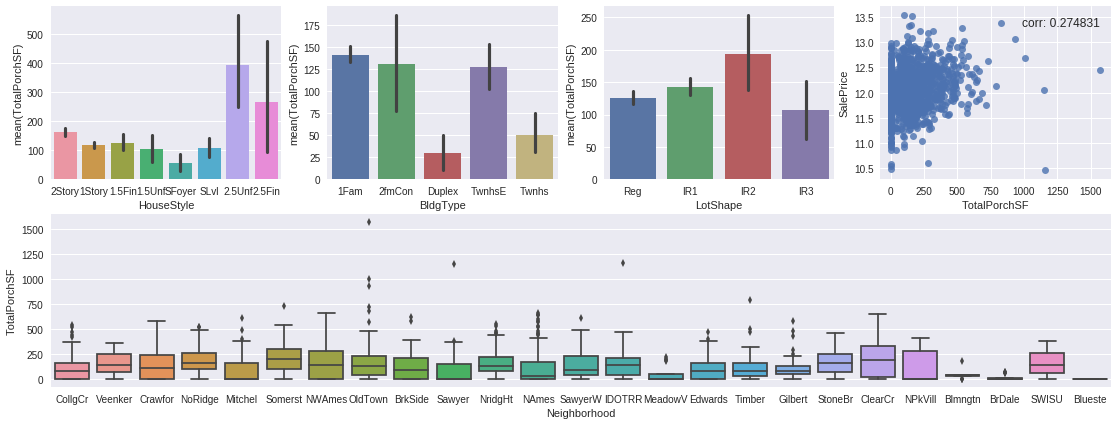

In [170]:
all_data['TotalPorchSF'] = all_data['OpenPorchSF'] + all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch'] 

train['TotalPorchSF'] = train['OpenPorchSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']

#LETS DISCOVER THE NEW-VARIABLE GENERATED
size_based_feature_analysis('TotalPorchSF')

<p>Good positive correlation with SalePrice.Invarient to location, building type, house-style and lot. Large number of data points having zero values. So we create a flag to get whether there is any porch or not</p>

In [171]:
def PorchFlag(col):
    if col['TotalPorchSF'] == zero:
        return 1
    else:
        return zero
all_data['NoPorch_Flag'] = all_data.apply(PorchFlag, axis=1)

# LETS DISCOVER THE FLAG GENERATED-
all_data.iloc[:,all_data.shape[1]-1:all_data.shape[1]].head(3)

NoPorch_Flag
0             0
1             1
2             0

In [172]:
#NOW WE BIN THE FEATURE AND CREATE DUMMY FEATURES
all_data['TotalPorchSF_Band'] = pd.cut(all_data['TotalPorchSF'], 4)
pd.DataFrame({'seperations' :all_data['TotalPorchSF_Band'].unique()})

seperations
0   (-1.724, 431.0]
1    (431.0, 862.0]
2   (862.0, 1293.0]
3  (1293.0, 1724.0]

In [173]:
slices = slicing(list(all_data['TotalPorchSF_Band'].unique()))
slices_df= pd.DataFrame({'slices' : slices})
slices_df

slices
0   -1.7240
1  431.0000
2  862.0000
3 1293.0000
4 1724.0000

In [174]:
all_data.loc[all_data['TotalPorchSF']<=slices[1], 'TotalPorchSF'] = 1
all_data.loc[(all_data['TotalPorchSF']>slices[1]) & (all_data['TotalPorchSF']<=slices[2]), 'TotalPorchSF'] = 2
all_data.loc[(all_data['TotalPorchSF']>slices[2]) & (all_data['TotalPorchSF']<=slices[3]), 'TotalPorchSF'] = 3
all_data.loc[all_data['TotalPorchSF']>slices[3], 'TotalPorchSF'] = 4
all_data['TotalPorchSF'] = all_data['TotalPorchSF'].astype(int)

all_data.drop('TotalPorchSF_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["TotalPorchSF"], prefix="TotalPorchSF")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-4:all_data.shape[1]].head(3)

TotalPorchSF_1  TotalPorchSF_2  TotalPorchSF_3  TotalPorchSF_4
0               1               0               0               0
1               1               0               0               0
2               1               0               0               0

####8.2.48 poolArea

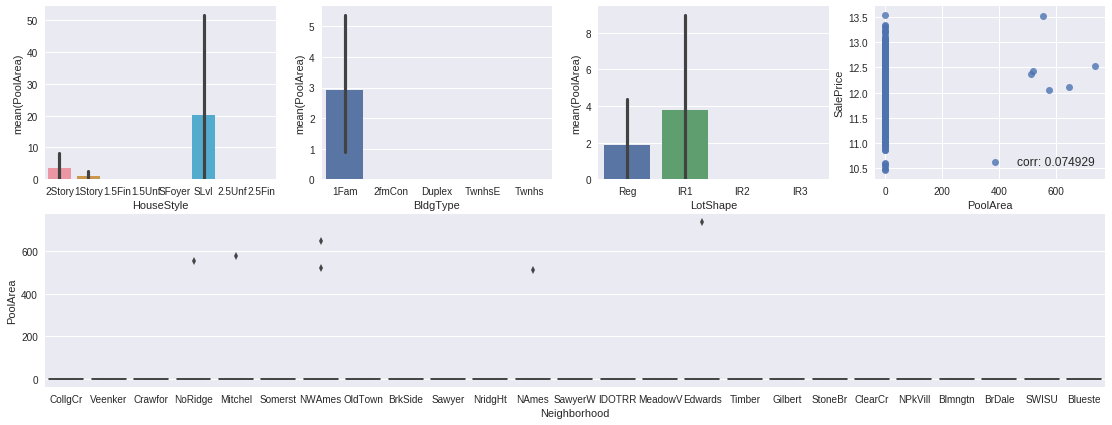

In [175]:
size_based_feature_analysis('PoolArea')

<p>We see almost zero correlation due to the high number of houses have no pool. So we can create a flag here.</p>

In [176]:
def PoolFlag(col):
    if col['PoolArea'] == zero:
        return zero
    else:
        return 1
all_data['HasPool_Flag'] = all_data.apply(PoolFlag, axis=1)
all_data.drop('PoolArea', axis=1, inplace=True)

#LETS DISCOVER THE FLAG GENERATED-
all_data.iloc[:,all_data.shape[1]-1:all_data.shape[1]].head(3)

HasPool_Flag
0             0
1             0
2             0

####8.2.49 PoolQC

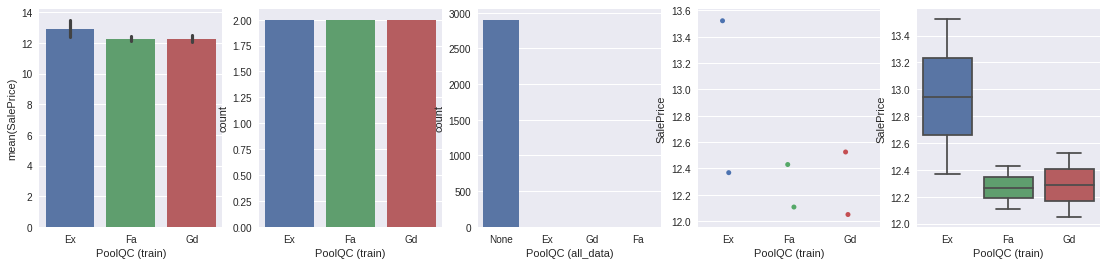

In [177]:
type_based_feature_analysis('PoolQC')

<P>Most houses have no pool. So we can simply drop the feature</P>

In [0]:
all_data.drop('PoolQC', axis=1, inplace=True)

####8.2.50 Fence

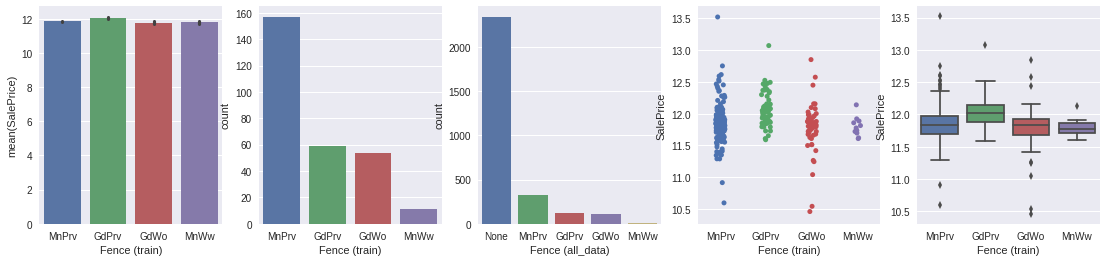

In [179]:
type_based_feature_analysis('Fence')

<p>Houses with the most privacy have the highest average SalePrice. But on average all categories have similar salePrice. So these categories are not camperative that much. So we can create dummies</p>

In [180]:
all_data = pd.get_dummies(all_data, columns = ["Fence"], prefix="Fence")

#LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-5:all_data.shape[1]].head(3)

Fence_GdPrv  Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_None
0            0           0            0           0           1
1            0           0            0           0           1
2            0           0            0           0           1

####8.2.51 MSZoning

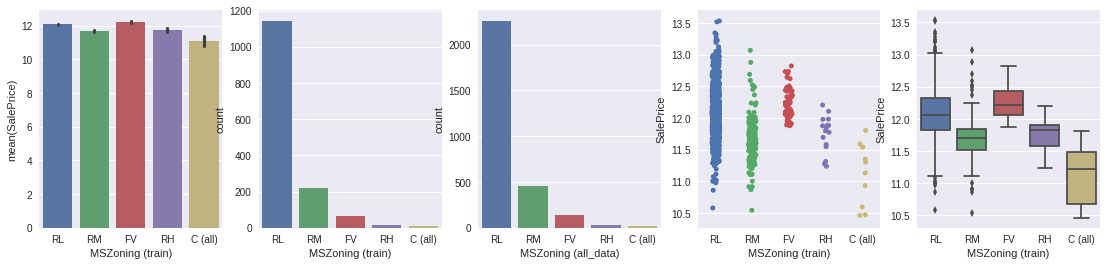

In [181]:
type_based_feature_analysis('MSZoning')

<p>Categorical feature without order (Categories are not not comperative that much). So lets create dummies</p>

In [182]:
all_data = pd.get_dummies(all_data, columns = ["MSZoning"], prefix="MSZoning")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-5:all_data.shape[1]].head(3)

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0                 0            0            0            1            0
1                 0            0            0            1            0
2                 0            0            0            1            0

####8.2.52 Neighborhood

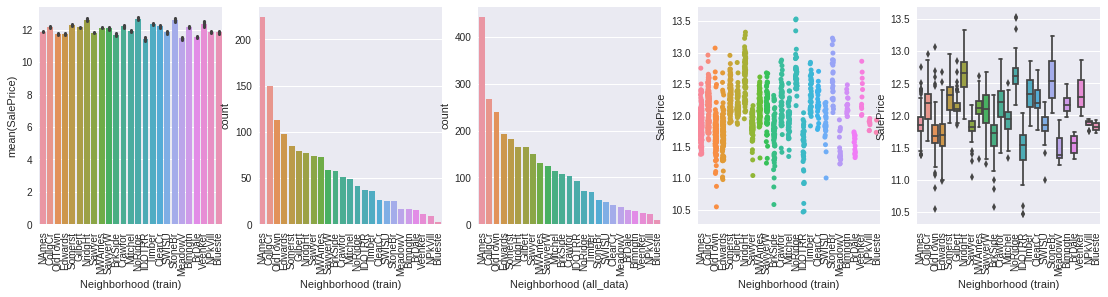

In [183]:
type_based_feature_analysis('Neighborhood', rotation = ninety)

<p>Categorical feature without order so create dummy features</p>

In [184]:
uniques=(all_data['Neighborhood'].unique()).size
all_data = pd.get_dummies(all_data, columns = ["Neighborhood"], prefix="Neighborhood")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-uniques:all_data.shape[1]].head(3)


Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   

   Neighborhood_Veenker  
0                     0  
1                     1  
2                     0

####8.2.53 Condition1 & Condition2

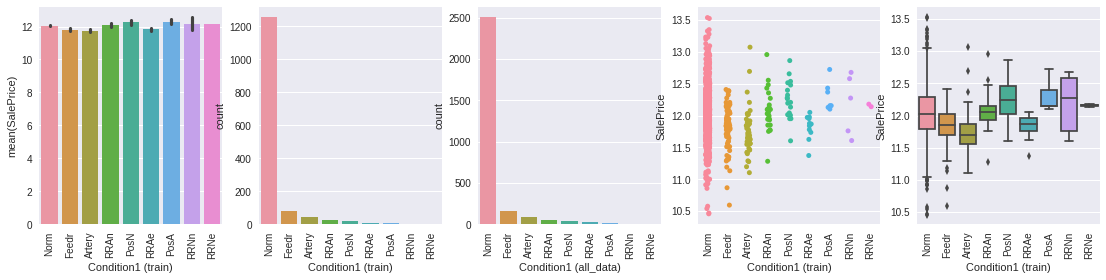

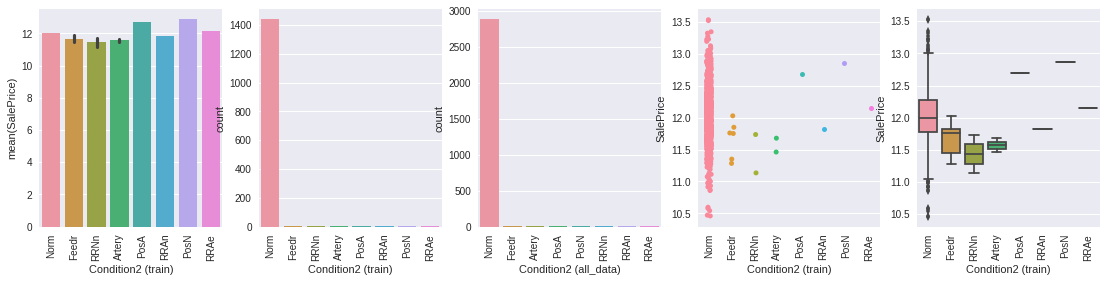

In [185]:
type_based_feature_analysis('Condition1', rotation = ninety)
type_based_feature_analysis('Condition2', rotation = ninety)

<p>Lets cluster these features based on the class description</p>

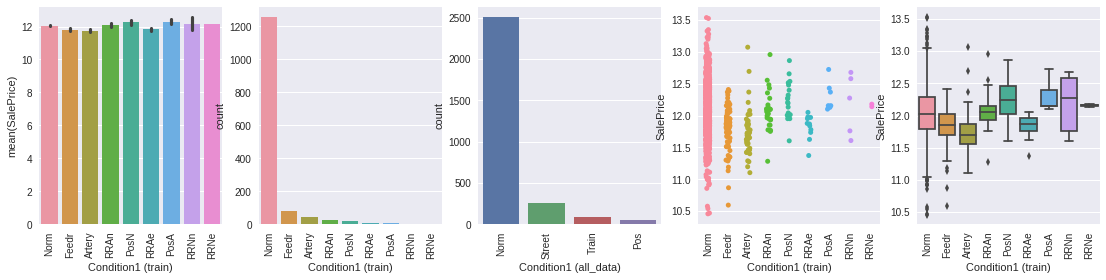

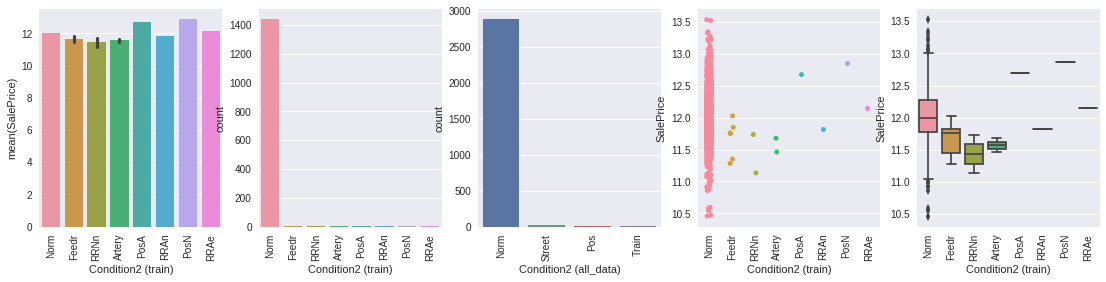

In [186]:
all_data['Condition1'] = all_data['Condition1'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", 
                                                     "RRAe":"Train","RRNn":"Train", "RRAn":"Train", "PosA":"Pos", 
                                                     "RRNe":"Train"})
all_data['Condition2'] = all_data['Condition2'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", 
                                                     "RRAe":"Train","RRNn":"Train", "RRAn":"Train", "PosA":"Pos", 
                                                     "RRNe":"Train"})

# AFTER FEATURE ENGINEERING
type_based_feature_analysis('Condition1', rotation = ninety)
type_based_feature_analysis('Condition2', rotation = ninety)

<p>Lets create a flag whether Condition1 matches to Condition2 or not</p>

In [187]:
def ConditionMatch(col):
    if col['Condition1'] == col['Condition2']:
        return zero
    else:
        return 1    
all_data['Diff2ndCondition_Flag'] = all_data.apply(ConditionMatch, axis=1)
all_data.drop('Condition2', axis=1, inplace=True)

#LETS DISCOVER THE FLAGS GENERATED-
all_data.iloc[:,all_data.shape[1]-1:all_data.shape[1]].head(3)

Diff2ndCondition_Flag
0                      0
1                      1
2                      0

<p>Create dummies for condition1</p>

In [188]:
all_data = pd.get_dummies(all_data, columns = ["Condition1"], prefix="Condition1")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-4:all_data.shape[1]].head(3)

Condition1_Norm  Condition1_Pos  Condition1_Street  Condition1_Train
0                1               0                  0                 0
1                0               0                  1                 0
2                1               0                  0                 0

####8.2.54 LotFrontage

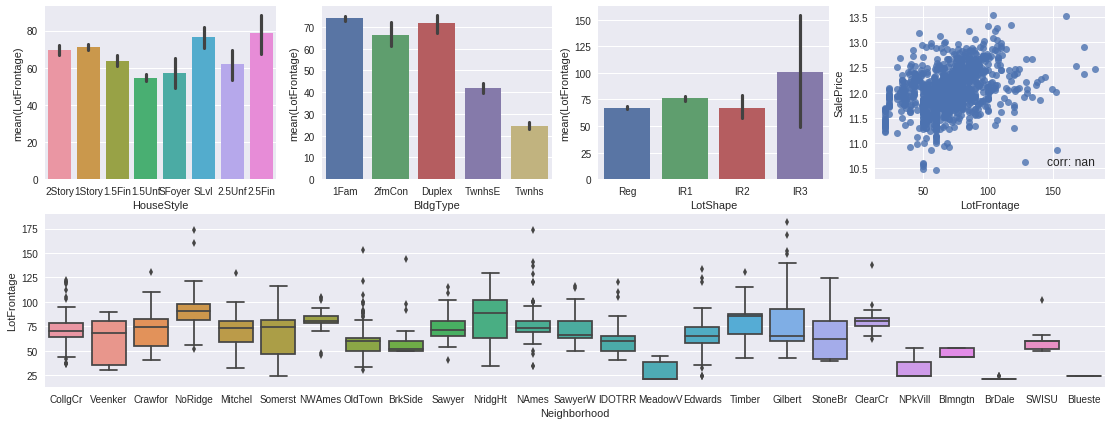

In [189]:
size_based_feature_analysis('LotFrontage')

<p>No corrilation with SalePrice so we cannot bin(slice) it. Has varience with houseStyle, Bldg-type and lotShape so we cannot drop it either. So lets keep it untouched for now</p>

####8.2.55 LotArea

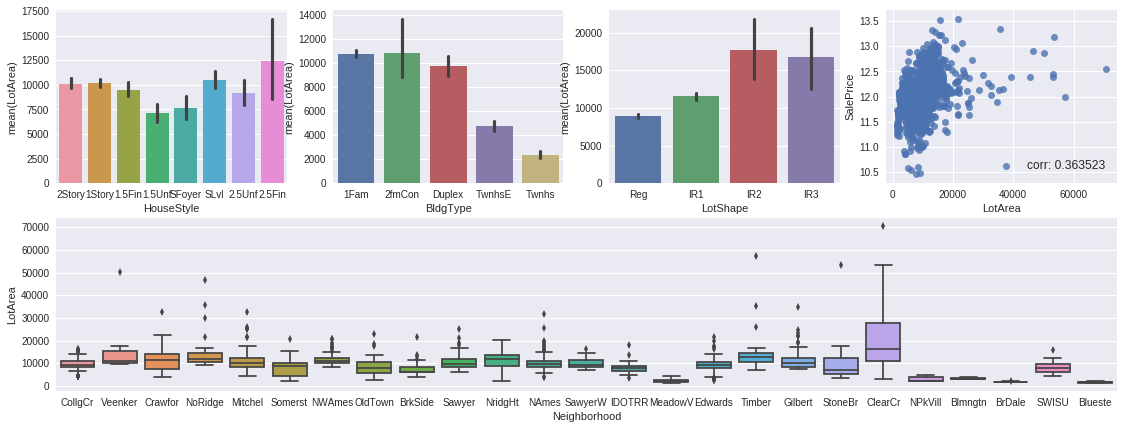

In [190]:
size_based_feature_analysis('LotArea')

<p>Highly corrilated to SalePrice but values are skewed to the left. So lets create quantile bins and then dummies</p>

In [191]:
all_data['LotArea_Band'] = pd.qcut(all_data['LotArea'], 8)
pd.DataFrame({'seperations' :all_data['LotArea_Band'].unique()})

seperations
0    (7474.0, 8520.0]
1   (9450.0, 10336.5]
2  (10336.5, 11523.0]
3  (13600.0, 70761.0]
4    (5683.0, 7474.0]
5  (11523.0, 13600.0]
6  (1299.999, 5683.0]
7    (8520.0, 9450.0]

In [192]:
slices = slicing(list(all_data['LotArea_Band'].unique()))
slices_df = pd.DataFrame({'slices' : slices}).sort_values(by=['slices']).reset_index(drop = True)
slices = list(slices_df['slices'])
slices_df

slices
0  5683.0000
1  7474.0000
2  7474.0000
3  8520.0000
4  9450.0000
5 10336.5000
6 11523.0000
7 13600.0000
8 70761.0000

In [193]:
all_data.loc[all_data['LotArea']<=slices[zero], 'LotArea'] = 1
all_data.loc[(all_data['LotArea']>slices[zero]) & (all_data['LotArea']<=slices[2]), 'LotArea'] = 2
all_data.loc[(all_data['LotArea']>slices[2]) & (all_data['LotArea']<=slices[3]), 'LotArea'] = 3
all_data.loc[(all_data['LotArea']>slices[3]) & (all_data['LotArea']<=slices[4]), 'LotArea'] = 4
all_data.loc[(all_data['LotArea']>slices[4]) & (all_data['LotArea']<=slices[5]), 'LotArea'] = 5
all_data.loc[(all_data['LotArea']>slices[5]) & (all_data['LotArea']<=slices[6]), 'LotArea'] = 6
all_data.loc[(all_data['LotArea']>slices[6]) & (all_data['LotArea']<=slices[7]), 'LotArea'] = 7
all_data.loc[all_data['LotArea']>slices[7], 'LotArea'] = 8
all_data['LotArea'] = all_data['LotArea'].astype(int)

all_data.drop('LotArea_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["LotArea"], prefix="LotArea")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-8:all_data.shape[1]].head(3)

LotArea_1  LotArea_2  LotArea_3  LotArea_4  LotArea_5  LotArea_6  \
0          0          0          1          0          0          0   
1          0          0          0          0          1          0   
2          0          0          0          0          0          1   

   LotArea_7  LotArea_8  
0          0          0  
1          0          0  
2          0          0

####8.2.56 LotShape

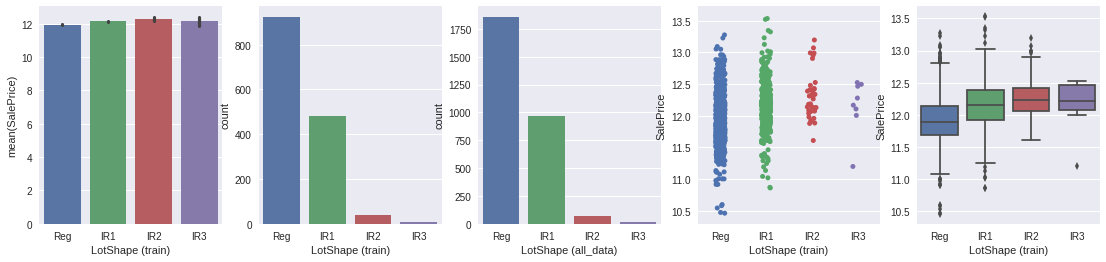

In [194]:
type_based_feature_analysis('LotShape')

<p>categorical feature without order so lets create dummies</p>

In [195]:
all_data = pd.get_dummies(all_data, columns = ["LotShape"], prefix="LotShape")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-4:all_data.shape[1]].head(3)

LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg
0             0             0             0             1
1             0             0             0             1
2             1             0             0             0

####8.2.57 LandContour

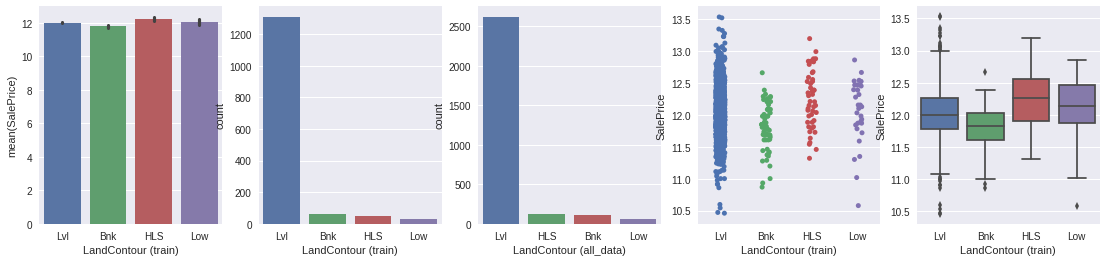

In [196]:
type_based_feature_analysis('LandContour')

<p>Categorical feature without order so lets create dummies</p>

In [197]:
all_data = pd.get_dummies(all_data, columns = ["LandContour"], prefix="LandContour")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-4:all_data.shape[1]].head(3)

LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl
0                0                0                0                1
1                0                0                0                1
2                0                0                0                1

####8.2.58 LotConfig

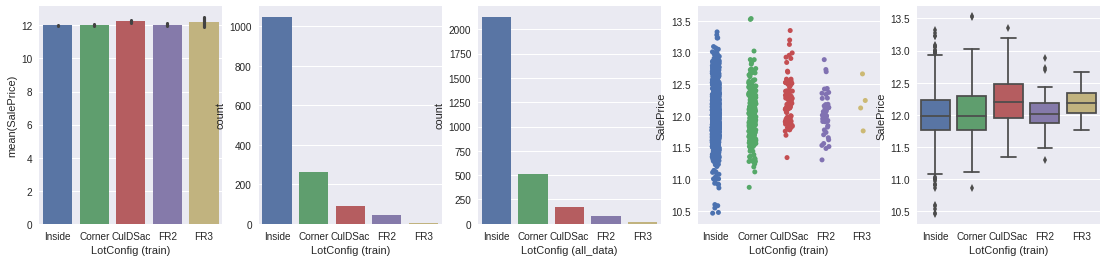

In [198]:
type_based_feature_analysis('LotConfig')

<p>FR2 and FR3 are similer. So lets cluster them</p>

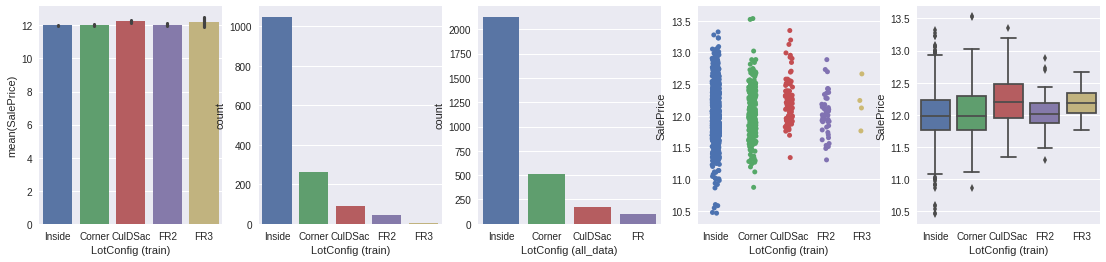

In [199]:
all_data['LotConfig'] = all_data['LotConfig'].map({"Inside":"Inside", "FR2":"FR", "Corner":"Corner", 
                                                   "CulDSac":"CulDSac", "FR3":"FR"})
# AFTER FEATURE ENGINEERING
type_based_feature_analysis('LotConfig')



```
# This is a categorical feature without order so lets create dummies
```



In [200]:
all_data = pd.get_dummies(all_data, columns = ["LotConfig"], prefix="LotConfig")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-4:all_data.shape[1]].head(3)

LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR  LotConfig_Inside
0                 0                  0             0                 1
1                 0                  0             1                 0
2                 0                  0             0                 1

####8.2.59 LandSlope

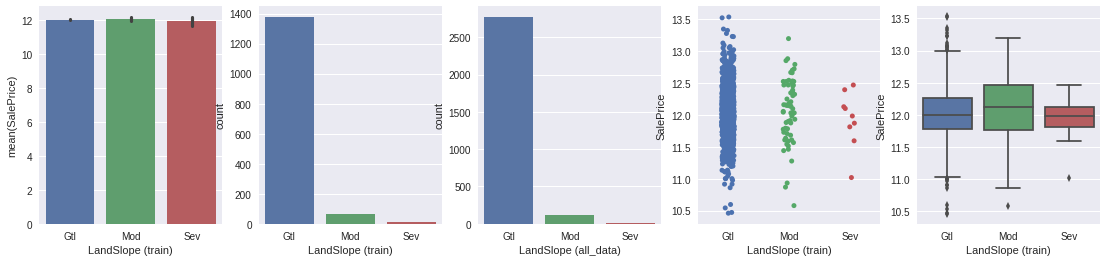

In [201]:
type_based_feature_analysis('LandSlope')

<p>Very few samples are :Mod and Sev. So they can be clustered as: not Gtl.  </p>

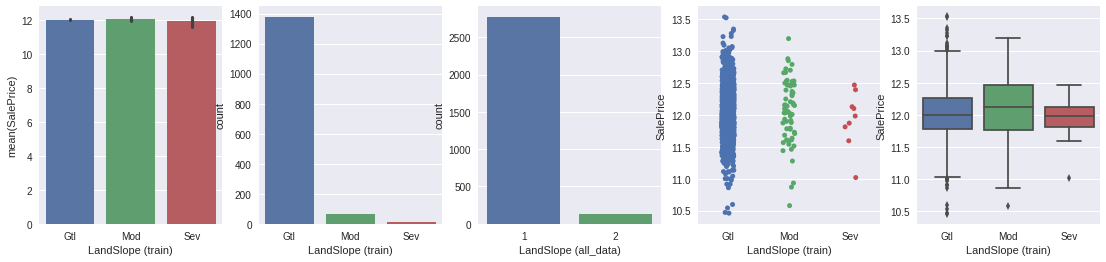

In [202]:
all_data['LandSlope'] = all_data['LandSlope'].map({"Gtl":1, "Mod":2, "Sev":2})

# AFTER FEATURE ENGINEERING
type_based_feature_analysis('LandSlope')

<p>Now we can create a flag whether Slope is Gtl or not</p>

In [203]:
def Slope(col):
    if col['LandSlope'] == 1:
        return 1
    else:
        return zero 
all_data['GentleSlope_Flag'] = all_data.apply(Slope, axis=1)
all_data.drop('LandSlope', axis=1, inplace=True)

# LETS DISCOVER THE FLAGS GENERATED-
all_data.iloc[:,all_data.shape[1]-1:all_data.shape[1]].head(3)

GentleSlope_Flag
0                 1
1                 1
2                 1

####8.2.60 Street

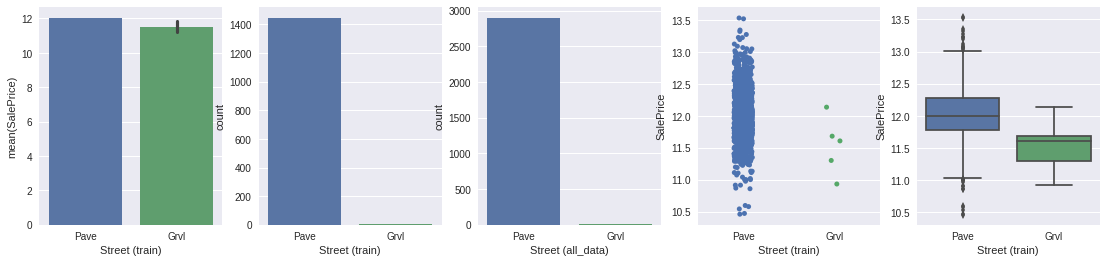

In [204]:
type_based_feature_analysis('Street')

<p>The category: Grvl is very few. And there is only one more category left. So nothing to compare here. So lets drop this feature</p>

In [0]:
all_data.drop('Street', axis=1, inplace=True)

####8.2.61 Alley

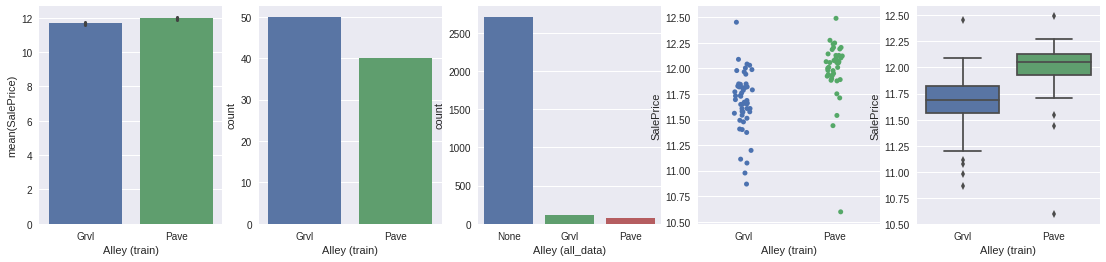

In [206]:
type_based_feature_analysis('Alley')

<p>Most categories are: none. Only two categories but they are not comperative (no order in between). So lets just dummy it</p>

In [207]:
all_data = pd.get_dummies(all_data, columns = ["Alley"], prefix="Alley")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-3:all_data.shape[1]].head(3)

Alley_Grvl  Alley_None  Alley_Pave
0           0           1           0
1           0           1           0
2           0           1           0

####8.2.62 PavedDrive

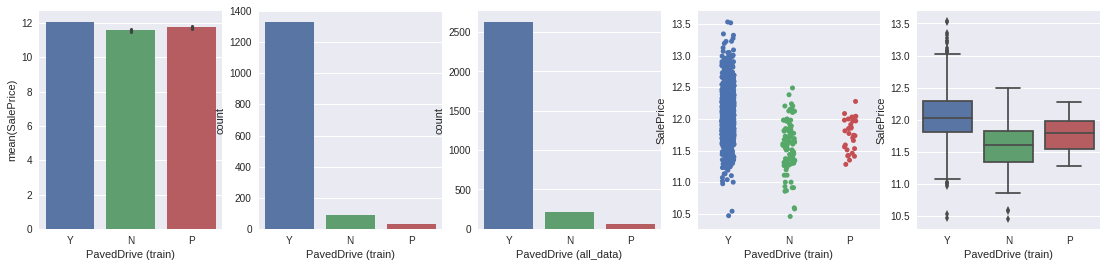

In [208]:
type_based_feature_analysis('PavedDrive')

<p>Categorical feature without order. so lets create dummy variables</p>

In [209]:
all_data = pd.get_dummies(all_data, columns = ["PavedDrive"], prefix="PavedDrive")

#LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-3:all_data.shape[1]].head(3)

PavedDrive_N  PavedDrive_P  PavedDrive_Y
0             0             0             1
1             0             0             1
2             0             0             1

####8.2.63 Heating

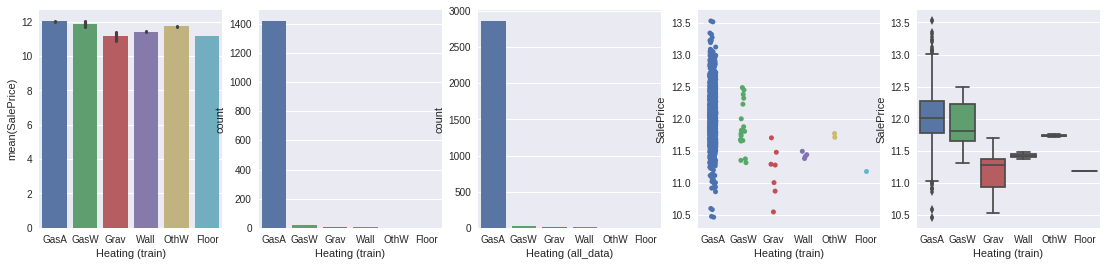

In [210]:
type_based_feature_analysis('Heating')

<p>GasA has very high count-ration compared to others. So lets create a flag whether Heating is GasA or not</p>

In [211]:
all_data['GasA_Flag'] = all_data['Heating'].map({"GasA":1, "GasW":zero, "Grav":zero, "Wall":zero, "OthW":zero, "Floor":zero})
all_data.drop('Heating', axis=1, inplace=True)

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-1:all_data.shape[1]].head(3)

GasA_Flag
0          1
1          1
2          1

####8.2.64 HeatingQC

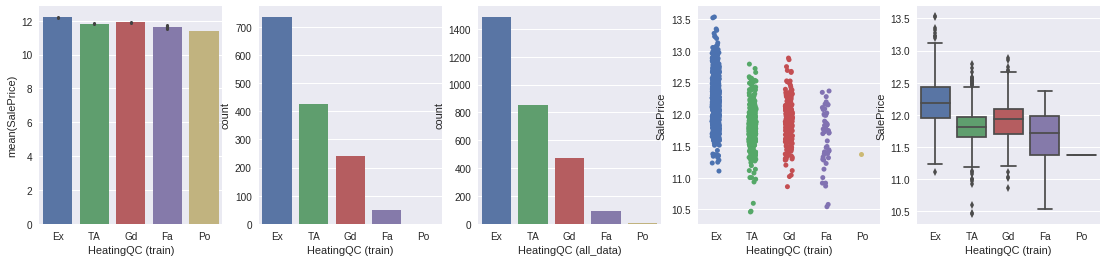

In [212]:
type_based_feature_analysis('HeatingQC')

<p>Good positive corrilation to SalePrice and categories maintain order. So lets relabel it</p>

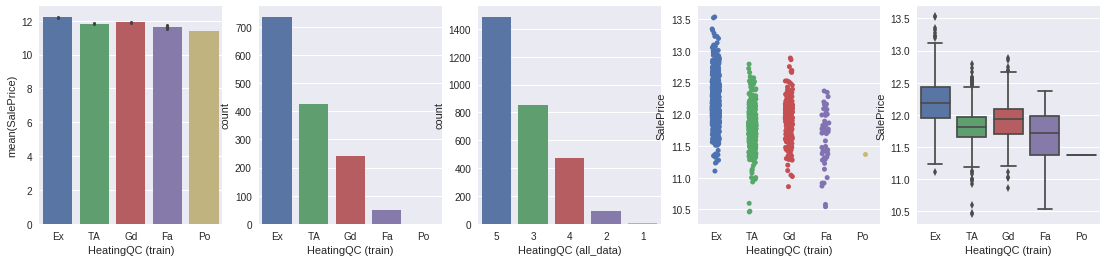

In [213]:
all_data['HeatingQC'] = all_data['HeatingQC'].map({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
type_based_feature_analysis('HeatingQC')

####8.2.65 CentralAir

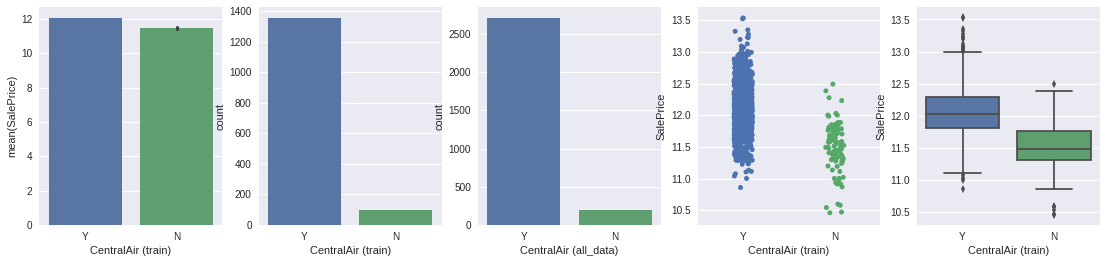

In [214]:
type_based_feature_analysis('CentralAir')

<p>Two binary-categories. So just relabel them</p>

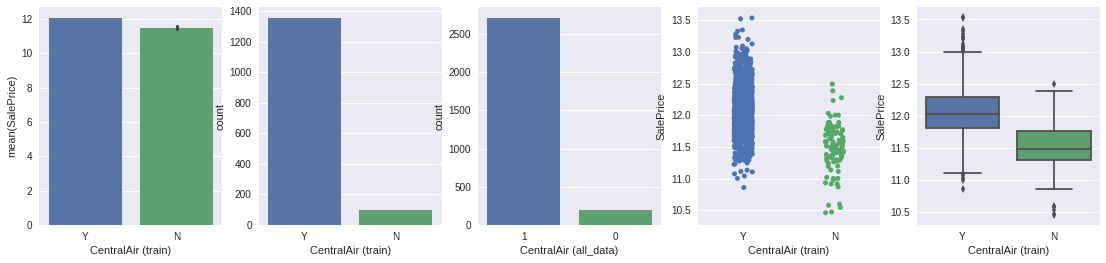

In [215]:
all_data['CentralAir'] = all_data['CentralAir'].map({'Y':1, 'N':zero})

# AFTER FEATURE ENGINEERING
type_based_feature_analysis('CentralAir')

####8.2.66 Electrical

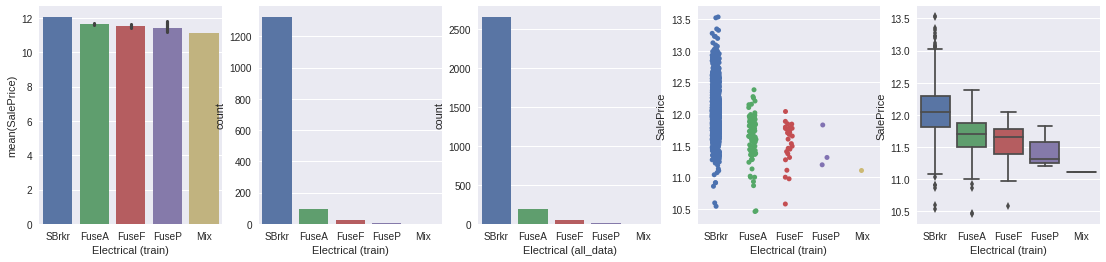

In [216]:
type_based_feature_analysis('Electrical')

<p>Fuse related categories are less in count. So lets cluster all kinds of fuses together </p>

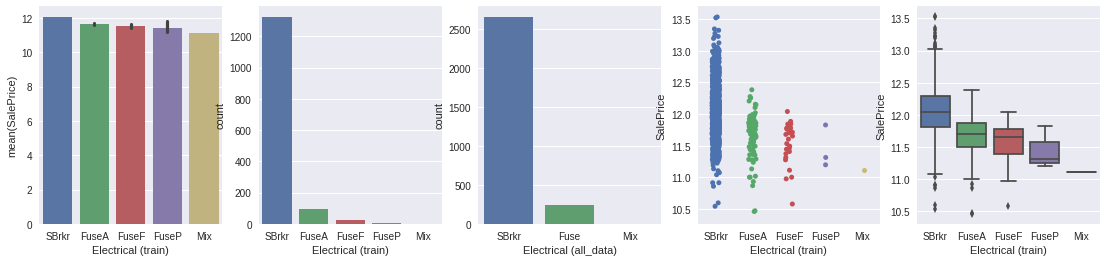

In [217]:
all_data['Electrical'] = all_data['Electrical'].map({"SBrkr":"SBrkr", "FuseF":"Fuse", "FuseA":"Fuse", 
                                                     "FuseP":"Fuse", "Mix":"Mix"})
# AFTER FEATURE ENGINEERING
type_based_feature_analysis('Electrical')

In [218]:
# NOW MAKING DUMMIES
all_data = pd.get_dummies(all_data, columns = ["Electrical"], prefix="Electrical")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-3:all_data.shape[1]].head(3)

Electrical_Fuse  Electrical_Mix  Electrical_SBrkr
0                0               0                 1
1                0               0                 1
2                0               0                 1

####8.2.67 MiscFeature

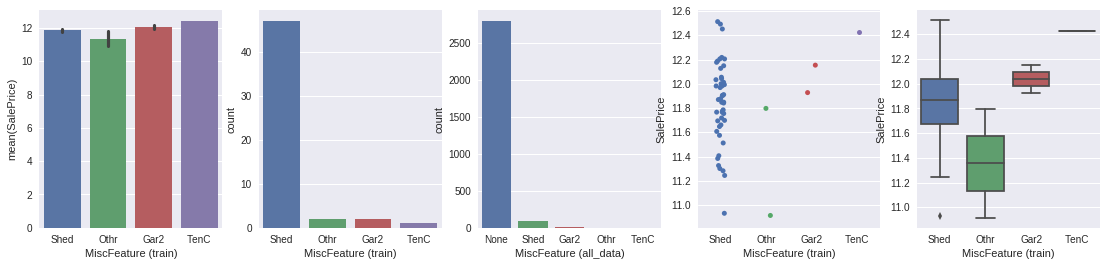

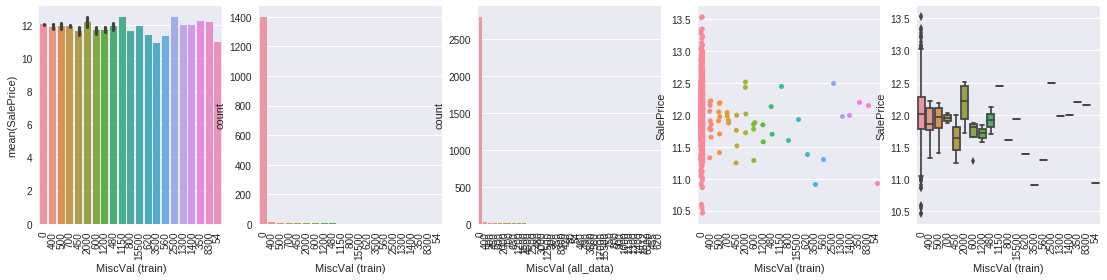

In [219]:
type_based_feature_analysis('MiscFeature')
type_based_feature_analysis('MiscVal', rotation=ninety)

<P>Almost all values are none and zero in MiscFeature and MiscVal. So lets just drop it</P>

In [0]:
columns=['MiscFeature', 'MiscVal']
all_data.drop(columns, axis=1, inplace=True)

####8.2.68 MoSold
<P>This feature shows the month when the house was sold</P>

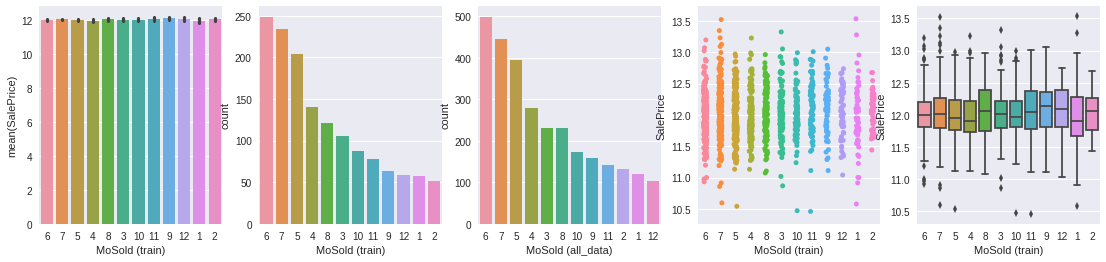

In [221]:
type_based_feature_analysis('MoSold')

<P>SalePrice is almost uniformly distributed to all months. So lets just dummy it</P>

In [222]:
all_data = pd.get_dummies(all_data, columns = ["MoSold"], prefix="MoSold")

#LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-12:all_data.shape[1]].head(3)

MoSold_1  MoSold_2  MoSold_3  MoSold_4  MoSold_5  MoSold_6  MoSold_7  \
0         0         1         0         0         0         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         0         0         0         0   

   MoSold_8  MoSold_9  MoSold_10  MoSold_11  MoSold_12  
0         0         0          0          0          0  
1         0         0          0          0          0  
2         0         1          0          0          0

####8.2.69 YrSold

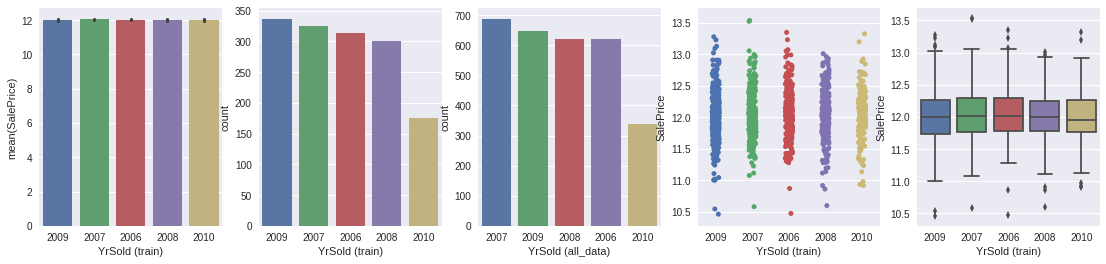

In [223]:
type_based_feature_analysis('YrSold')

In [224]:
#SalePrice is almost uniformly distributed to all years. So lets just dummy it
all_data = pd.get_dummies(all_data, columns = ["YrSold"], prefix="YrSold")

#Now lets discover the dummy-variables generated-
all_data.iloc[:,all_data.shape[1]-5:all_data.shape[1]].head(3)

YrSold_2006  YrSold_2007  YrSold_2008  YrSold_2009  YrSold_2010
0            0            0            1            0            0
1            0            1            0            0            0
2            0            0            1            0            0

####8.2.70 SaleType

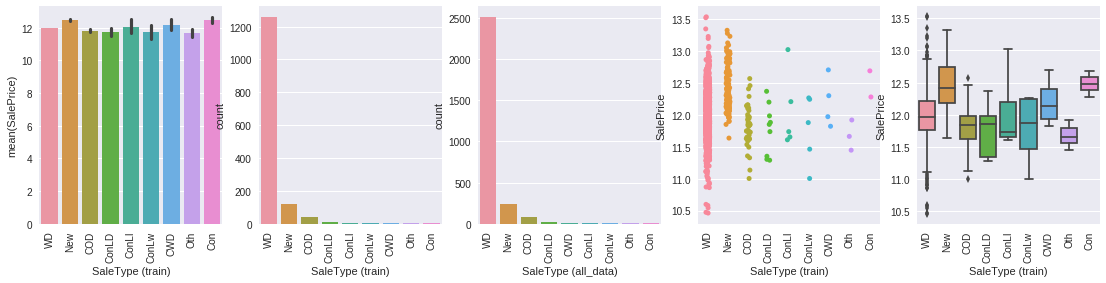

In [225]:
type_based_feature_analysis('SaleType', rotation=ninety)

<P>Most of the categories are WD. Others are very few. So lets culsterize some of them</P>

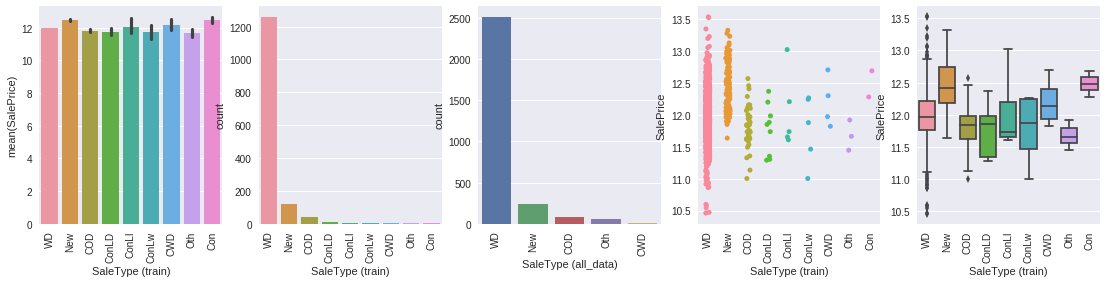

In [226]:
all_data['SaleType'] = all_data['SaleType'].map({"WD":"WD", "New":"New", "COD":"COD", "CWD":"CWD", "ConLD":"Oth", 
                                                 "ConLI":"Oth","ConLw":"Oth", "Con":"Oth", "Oth":"Oth"})
# AFTER FEATURE ENGINEERING
type_based_feature_analysis('SaleType', rotation=ninety)

<P>Now the categories are not comperative(No order among them). So lets just create dummies</P>

In [227]:
all_data = pd.get_dummies(all_data, columns = ["SaleType"], prefix="SaleType")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-5:all_data.shape[1]].head(3)

SaleType_COD  SaleType_CWD  SaleType_New  SaleType_Oth  SaleType_WD
0             0             0             0             0            1
1             0             0             0             0            1
2             0             0             0             0            1

####8.2.71 SaleCondition

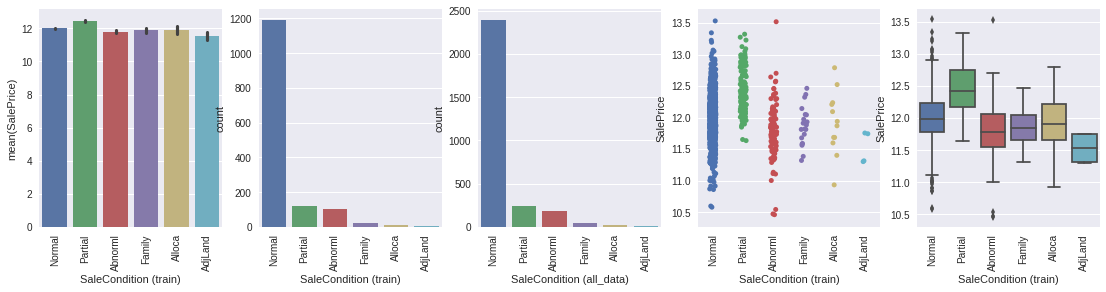

In [228]:
type_based_feature_analysis('SaleCondition', rotation=ninety)

<P>Most values are: Normal and No order in categories. So lets just create dummies</P>

In [229]:
all_data = pd.get_dummies(all_data, columns = ["SaleCondition"], prefix="SaleCondition")

# LETS DISCOVER THE DUMMY-VARIABLES GENERATED
all_data.iloc[:,all_data.shape[1]-6:all_data.shape[1]].head(3)

SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0

##Step 9: Handling Skewness
<p>Now we will try to reduce the skewness of highly skewed features</p>

In [230]:
# RECREATING THE TRAINING AND TEST DATASETS
train = all_data[:ntrain]
test = all_data[ntrain:]

# MAKING A SET OF COPY
trainFeatured = train.copy()
testFeatured = test.copy()

# MAKING A LIST OF NUMERIC FEATURES
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

# CHECKING THE SKEW OF ALL NUMERIC FEATURES
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(5)


Skew in numerical features: 



Skew
TotalSF_9     53.9259
WoodDeckSF_4  53.9259
1stFlrSF_5    53.9259
BsmtFinSF1_4  53.9259
TotalBsmtSF_8 53.9259

In [231]:
# STORING UNSKEWED FEATURES 
unskewed_feats = skewed_feats

# SHOWING HOW MANY FEATURES TO BE SKEWED
skewness = skewness[abs(skewness) > .5]
print('There are {} skewed numerical features to Box Cox transform'.format(skewness.shape[zero]))

There are 339 skewed numerical features to Box Cox transform


In [232]:
# BOX COX TRANSFORMATION OF HIGHLY SKEWED FEATURES
skewed_features = skewness.index
lam = .15
for feat in skewed_features:
  
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
# SKEWED FEATURES
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

# CHECKING THE SKEW OF ALL NUMERIC FEATURES
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print('\nSkew in numerical features: \n')
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(5)


Skew in numerical features: 



Skew
RoofMatl_Metal 53.9259
Electrical_Mix 53.9259
TotalSF_7      53.9259
WoodDeckSF_4   53.9259
RoofMatl_Roll  53.9259

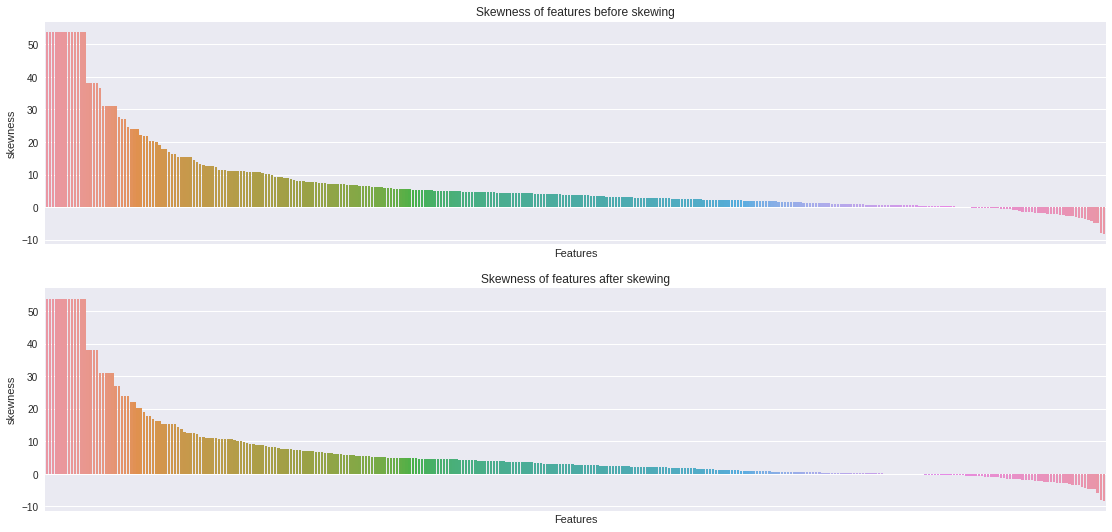

In [233]:
# GRAPHICAL REPRESENTATION OF THE SKEWNESS
plt.subplots(figsize=(19, 9))

plt.subplot(2, 1, 1)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
sns.barplot(x=unskewed_feats.index, y=unskewed_feats)
plt.xlabel('Features')
plt.ylabel('skewness')
plt.title('Skewness of features before skewing')

plt.subplot(2, 1, 2)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
sns.barplot(x=skewed_feats.index, y=skewed_feats)
plt.xlabel('Features')
plt.ylabel('skewness')
plt.title('Skewness of features after skewing')
plt.show()

##Step 10: Recreating Train & Test DB

In [234]:
# FINAL SHAPE OF ALL_DATA
all_data.shape

(2911, 339)

In [235]:
# RE-CREATING THE TRAINING AND TEST DATASETS
train = all_data[:ntrain]
test = all_data[ntrain:]

#MAKING A SET OF COPY
trainCopyMod = train.copy()
testCopyMod = test.copy()

print(train.shape)
print(test.shape)

(1452, 339)
(1459, 339)


##Step 11: Regressor Models Implementation

###11.1 Remove Irrelevant Features

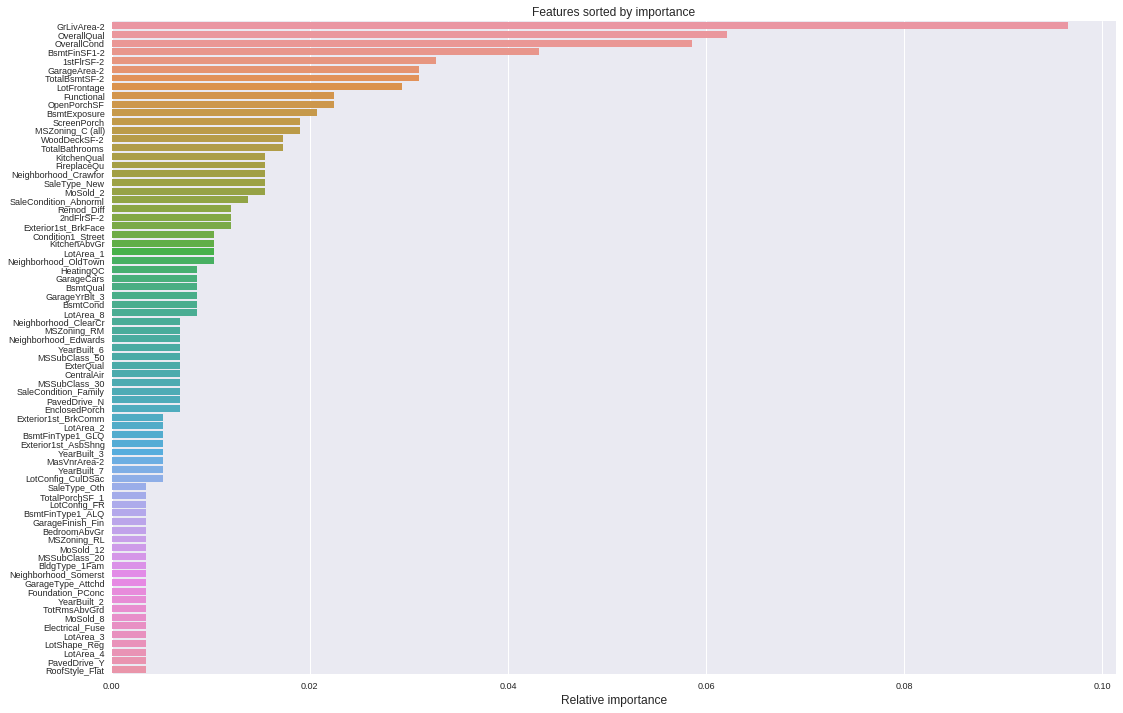

In [236]:
# DEFINING MODEL
model = xgb.XGBRegressor()
model.fit(train, y_train)

# SORT FEATURE IMPORTANCES
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# VISUALIZATION
plt.subplots(figsize=(18, 12))
g = sns.barplot(y=train.columns[indices], x = model.feature_importances_[indices])
g.set_xlabel("Relative importance",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Features sorted by importance")
plt.show()

In [237]:
xgb_train = train.copy()
xgb_test = test.copy()

model = xgb.XGBRegressor()
model.fit(xgb_train, y_train)

# SELECTING THE MOST IMPORTANT FEATURES
xgb_feat_red = SelectFromModel(model, prefit = True)

# REDUCING ESTIMATION VALIDATION AND TEST DATASETS
xgb_train = xgb_feat_red.transform(xgb_train)
xgb_test = xgb_feat_red.transform(xgb_test)

print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

Results of 'feature_importances_':
X_train:  (1452, 75) 
X_test:  (1459, 75)


###11.2 Separate Validation Dataset

<p>We separated 30% data randomly from train-set for validation. Here<br>
X-train = predictor features for estimation dataset<br>  
X-test = predictor variables for validation dataset<br>
Y-train = target variable for the estimation dataset<br>  
Y-test = target variable for the estimation dataset</p>


In [238]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(xgb_train, y_train, test_size=.3, random_state=42)
dataset=['X_train', 'X_test','Y_train', 'Y_test']
shape=[X_train.shape, X_test.shape, Y_train.shape, Y_test.shape]
datasets = pd.DataFrame(
    {'DataSet': dataset,
     'shape': shape
    })
datasets

DataSet       shape
0  X_train  (1016, 75)
1   X_test   (436, 75)
2  Y_train     (1016,)
3   Y_test      (436,)

###11.3 Begin Training

####11.3.1 Training Models with Default Parameters
<p>Lets train several regressor models of Scikit-learn with their default parameter values</p>

In [239]:
# ALGORITHM SELECTION AND INITIALIZATION
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), 
          BayesianRidge(), LassoLarsIC(), RandomForestRegressor(), xgb.XGBRegressor()]

# RANDOMISING THE CROSS VALIDATION SAMPLES
shuff = ShuffleSplit(n_splits = 5, test_size =.2, random_state=42)

# CREATING TABLE TO COMPARE MODEL ACCURACY
columns = ['Name', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

# INDEXING THROUGH MODELS AND SAVING PERFORMANCE TO TABLE
row_index = zero
percent = 100 
for alg in models:

    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    alg.fit(X_train, Y_train)
    
    training_results = np.sqrt((-cross_val_score(alg, X_train, Y_train, cv = shuff, scoring= 'neg_mean_squared_error')).mean())
    test_results = np.sqrt((np.square((Y_test-alg.predict(X_test)))).mean())
    
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = np.multiply(training_results, percent)
    before_model_compare.loc[row_index, 'Test Accuracy'] = np.multiply(test_results, percent)
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained!')

decimals = 3
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
before_model_compare

1 KernelRidge trained!
2 ElasticNet trained!
3 Lasso trained!
4 GradientBoostingRegressor trained!
5 BayesianRidge trained!
6 LassoLarsIC trained!
7 RandomForestRegressor trained!
8 XGBRegressor trained!


Name  Train Accuracy Mean  Test Accuracy
0                KernelRidge              25.9700        32.5670
1                 ElasticNet              22.9520        21.8610
2                      Lasso              28.5360        27.1100
3  GradientBoostingRegressor              12.4570        11.1880
4              BayesianRidge              11.7090        11.4920
5                LassoLarsIC              12.9080        11.8330
6      RandomForestRegressor              14.8740        13.8990
7               XGBRegressor              12.4900        11.9350

<p>Here Gradient-Boosting-Regressor has the best accuracy score(lowest mean-squared-error). And the main reason for the bad performance of many models is their default configuration of parameters. Lets use GridSearchCV to find the best combinations of parameters and increase accuracy. Due to time-shortage I just created a framework to apply grid-search and set only a few 
alternatives for each parameter.</p>

####11.3.2 Applying Grid-Search

In [0]:
# MAKING A LIST OF MODELS
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), 
          RandomForestRegressor(), xgb.XGBRegressor()]

# SETTING PARAMETER-VALUES FOR EACH MODEL
KR_param_grid = {'alpha': [0.1, 0.6], 'coef0': [100, 2.5], 'degree': [1, 2], 'gamma': [None], 'kernel': ['polynomial']}
EN_param_grid = {'alpha': [1e-3, 0.0005], 'copy_X': [True], 'l1_ratio': [0.6, 0.9], 'fit_intercept': [True], 
                 'normalize': [False],'precompute': [False], 'max_iter': [300], 'tol': [1e-3], 'selection': ['random'],
                 'random_state': [None]}
LASS_param_grid = {'alpha': [5e-4, 0.0001], 'copy_X': [True], 'fit_intercept': [True], 'normalize': [False], 
                   'precompute': [False],'max_iter': [300], 'tol': [1e-2], 'selection': ['random'], 
                   'random_state': [None]}
GB_param_grid = {'loss': ['huber'], 'learning_rate': [0.1, 0.05], 'n_estimators': [300], 'max_depth': [3, 4], 
                                        'min_samples_split': [2.5e-3], 'min_samples_leaf': [5, 15]}
BR_param_grid = {'n_iter': [200], 'tol': [1e-5, 1e-6], 'alpha_1': [1e-8, 1e-6], 'alpha_2': [5e-6, 5e-4], 
                 'lambda_1': [5e-6, 5e-4],'lambda_2': [1e-8, 1e-6], 'copy_X': [True]}
LL_param_grid = {'criterion': ['aic'], 'normalize': [True], 'max_iter': [100], 'copy_X': [True], 'precompute': ['auto'], 
                 'eps': [1e-6]}
RFR_param_grid = {'n_estimators': [50], 'max_features': ['auto'], 'max_depth': [None], 'min_samples_split': [5], 
                  'min_samples_leaf': [2]}
XGB_param_grid = {'max_depth': [3], 'learning_rate': [0.1, 0.05], 'n_estimators': [300], 'booster': ['gbtree'], 
                  'gamma': [zero, 0.0468], 'reg_alpha': [0.1, 0.4640], 'reg_lambda': [0.7, 0.8571], 
                  'max_delta_step': [zero], 'min_child_weight': [1, 1.7817], 'colsample_bytree': [.5, 0.4603],
                  'colsample_bylevel': [0.2], 'scale_pos_weight': [1]}

# MAKING A LIST OF PARAMETER-GRIDS
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, 
               RFR_param_grid, XGB_param_grid]

In [241]:
# LETS TRAIN EACH OF THE MODELS
after_model_compare = pd.DataFrame(columns = columns)
row_index = zero
for alg in models:  
    gs_alg = GridSearchCV(alg, param_grid = params_grid[zero], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(zero)
    model_name = alg.__class__.__name__
    after_model_compare.loc[row_index, 'Name'] = model_name
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    
    after_training_results = np.sqrt(-gs_alg.best_score_)
    after_test_results = np.sqrt((np.square(Y_test-gs_alg.predict(X_test))).mean()) 
    after_model_compare.loc[row_index, 'Train Accuracy Mean'] = np.multiply(after_training_results, percent)
    after_model_compare.loc[row_index, 'Test Accuracy'] = np.multiply(after_test_results, percent)
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained!')
    
decimals = 3
after_model_compare['Train Accuracy Mean'] = after_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
after_model_compare['Test Accuracy'] = after_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
after_model_compare

1 KernelRidge trained!
2 ElasticNet trained!
3 Lasso trained!
4 GradientBoostingRegressor trained!
5 BayesianRidge trained!
6 LassoLarsIC trained!
7 RandomForestRegressor trained!
8 XGBRegressor trained!


Name  Train Accuracy Mean  Test Accuracy
0                KernelRidge              11.6770        11.7500
1                 ElasticNet              11.6770        11.4760
2                      Lasso              11.6740        11.5040
3  GradientBoostingRegressor              12.0610        11.4870
4              BayesianRidge              11.7090        11.4920
5                LassoLarsIC              12.9080        11.8330
6      RandomForestRegressor              14.4440        13.0150
7               XGBRegressor              11.7630        11.3780

<p>As we can see that The best test-accuracy was achieved from XG-Boost Regressor. The accuracy has increased and so mean-squared-error has decreased significantly for almost all models after applying grid-search. It could be even better with more and more parameter-tunning which is not possible for now due to time-limitation. Now lets apply stacking-method for more improved results</p>

####11.3.3 Applying Stacking
<p>We will perform stacking of models to achieve better performance. Here we are using lesso as meta-model. We could use all good-performing models as meta and check performance for each of the combinations. So there is scope for more tinkering.</p>

In [242]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), 
          RandomForestRegressor(), xgb.XGBRegressor()]
names = ['KernelRidge', 'ElasticNet', 'Lasso', 'Gradient Boosting', 'Bayesian Ridge', 'Lasso Lars IC', 
         'Random Forest', 'XGBoost']
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, 
               RFR_param_grid, XGB_param_grid]
stacked_validation_train = pd.DataFrame()
stacked_test_train = pd.DataFrame()
row_index=zero
for alg in models:
    gs_alg = GridSearchCV(alg, param_grid = params_grid[0], cv = shuff, scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(zero)
    gs_alg.fit(X_train, Y_train)
    gs_best = gs_alg.best_estimator_
    stacked_validation_train.insert(loc = row_index, column = names[zero], value = gs_best.predict(X_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking validation dataset!')
    
    stacked_test_train.insert(loc = row_index, column = names[zero], value = gs_best.predict(xgb_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking test dataset!')
    names.pop(zero)
    row_index+=1
print('Done')

1 KernelRidge predictions added to stacking validation dataset!
1 KernelRidge predictions added to stacking test dataset!
2 ElasticNet predictions added to stacking validation dataset!
2 ElasticNet predictions added to stacking test dataset!
3 Lasso predictions added to stacking validation dataset!
3 Lasso predictions added to stacking test dataset!
4 GradientBoostingRegressor predictions added to stacking validation dataset!
4 GradientBoostingRegressor predictions added to stacking test dataset!
5 BayesianRidge predictions added to stacking validation dataset!
5 BayesianRidge predictions added to stacking test dataset!
6 LassoLarsIC predictions added to stacking validation dataset!
6 LassoLarsIC predictions added to stacking test dataset!
7 RandomForestRegressor predictions added to stacking validation dataset!
7 RandomForestRegressor predictions added to stacking test dataset!
8 XGBRegressor predictions added to stacking validation dataset!
8 XGBRegressor predictions added to stackin

In [243]:
stacked_validation_train.head()

KernelRidge  ElasticNet   Lasso  Gradient Boosting  Bayesian Ridge  \
0      12.4702     12.4633 12.4639            12.5236         12.4647   
1      11.6089     11.6018 11.6009            11.5423         11.6330   
2      12.2016     12.1964 12.1957            12.1269         12.1989   
3      12.5777     12.5621 12.5598            12.6934         12.5801   
4      12.1552     12.1483 12.1504            12.1383         12.1393   

   Lasso Lars IC  Random Forest  XGBoost  
0        12.4382        12.5372  12.4411  
1        11.6237        11.5418  11.6321  
2        12.1916        12.1321  12.1796  
3        12.5135        12.5775  12.6055  
4        12.2044        12.1618  12.1704

In [244]:
stacked_test_train.head()

KernelRidge  ElasticNet   Lasso  Gradient Boosting  Bayesian Ridge  \
0      11.6424     11.6679 11.6702            11.7780         11.6487   
1      12.0644     12.0771 12.0781            12.0726         12.0665   
2      12.1606     12.1547 12.1546            12.1158         12.1670   
3      12.2457     12.2506 12.2513            12.1668         12.2521   
4      12.1318     12.1445 12.1462            12.1574         12.1265   

   Lasso Lars IC  Random Forest  XGBoost  
0        11.6227        11.7188  11.7229  
1        12.0426        12.0147  11.9907  
2        12.1007        12.0228  12.0989  
3        12.1786        12.0831  12.1630  
4        12.1896        12.1708  12.1493

<P>We drop the Lasso results from the table, as it will be used as the meta-model for stacking</P>

In [245]:
drop = ['Lasso']
stacked_validation_train.drop(drop, axis=1, inplace=True)
stacked_test_train.drop(drop, axis=1, inplace=True)

# FITTING META MODEL AND GETTING PREDICTION
meta_model = make_pipeline(RobustScaler(), Lasso(alpha=1e-5, copy_X = True, fit_intercept = True,
                                              normalize = False, precompute = False, max_iter = 10000,
                                              tol = 1e-4, selection = 'random', random_state = None))
meta_model.fit(stacked_validation_train, Y_test)
meta_model_pred = np.expm1(meta_model.predict(stacked_test_train))
print("Meta-model trained and applied!")

Meta-model trained and applied!


In [246]:
models = [KernelRidge(), ElasticNet(), Lasso(), GradientBoostingRegressor(), BayesianRidge(), LassoLarsIC(), 
          RandomForestRegressor(),xgb.XGBRegressor()]
names = ['KernelRidge', 'ElasticNet', 'Lasso', 'Gradient Boosting', 'Bayesian Ridge', 'Lasso Lars IC', 
         'Random Forest', 'XGBoost']
params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, 
               RFR_param_grid, XGB_param_grid]
final_predictions = pd.DataFrame()
row_index=zero
for alg in models:
    gs_alg = GridSearchCV(alg, param_grid = params_grid[zero], cv = shuff, 
                          scoring = 'neg_mean_squared_error', n_jobs=-1)
    params_grid.pop(0)
    gs_alg.fit(stacked_validation_train, Y_test)
    gs_best = gs_alg.best_estimator_
    final_predictions.insert(loc = row_index, column = names[zero], 
                             value = np.expm1(gs_best.predict(stacked_test_train)))
    print(row_index+1, alg.__class__.__name__, 'final results predicted added to table!')
    names.pop(0)
    row_index+=1
print("Done")
final_predictions.head()

1 KernelRidge final results predicted added to table!
2 ElasticNet final results predicted added to table!
3 Lasso final results predicted added to table!
4 GradientBoostingRegressor final results predicted added to table!
5 BayesianRidge final results predicted added to table!
6 LassoLarsIC final results predicted added to table!
7 RandomForestRegressor final results predicted added to table!
8 XGBRegressor final results predicted added to table!
Done


KernelRidge  ElasticNet       Lasso  Gradient Boosting  Bayesian Ridge  \
0  121967.5923 119570.8863 118772.6137        121620.0643     121693.8674   
1  170107.8054 169125.2835 168727.9456        172130.5952     169957.0699   
2  181039.1625 180645.6059 180901.6949        175443.1763     181164.3168   
3  196323.9868 194248.0658 194351.9191        200881.7269     196141.5575   
4  186596.7074 187009.6573 185735.6578        188445.3425     186378.3316   

   Lasso Lars IC  Random Forest     XGBoost  
0    118914.3989    122031.7483 121467.5703  
1    168947.6308    175045.0807 171919.5312  
2    180721.5668    179656.1779 178532.2656  
3    194267.7569    195845.1531 203231.7031  
4    186666.5231    189365.4642 186690.3125

####11.3.4 Applying Ensemble
<p>We ensembled all the models for better performance. But it is not always certain that the result will be better. Therefore there is option to tune the effect of each model on final prediction. We applied weights to each model based on their performances. But further tunning was required.</p>

In [247]:
ensemble =  np.multiply(meta_model_pred, (.1))+ \
            np.multiply(final_predictions['XGBoost'], (.15))+ \
            np.multiply(final_predictions['Gradient Boosting'], (.2))+ \
            np.multiply(final_predictions['Bayesian Ridge'], (.1))+ \
            np.multiply(final_predictions['Lasso'], (.1))+ \
            np.multiply(final_predictions['KernelRidge'], (.1))+ \
            np.multiply(final_predictions['Lasso Lars IC'],(.1))+ \
            np.multiply(final_predictions['Random Forest'],(.15))
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = ensemble
submission.to_csv('/content/drive/My Drive/housePrice/hpdb/final_submission.csv',index=False)
print("Submission file, created!")

Submission file, created!


##Step 12 DNN Implementation

###12.1 Importing

In [0]:
import csv
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import ParameterGrid

# TO AVOID WATCHING WARNINGS FOR TENSORFLOW
import logging
def keep_every_nth_info(n):
    i = -1
    def filter_record(record):
        nonlocal i
        i += 1
        return int( i % n == 15)
    return filter_record
logging.getLogger('tensorflow').addFilter(keep_every_nth_info(15))
zero = 0

###12.2 Functions to load and process data



<p> Load-data function loads the already processed data for DNN and shows its shape. And the Pre-process-data function is created to do one-hot encoding of categorical columns. Though we have already created dummies...this is Just to be sure. The intuition is if there is any column left that is still containing string...we will one-hot encode it.</p>

In [0]:
def load_data(train_path, test_path):

    train_data = train_path
    test_data = test_path
    print("number of training examples = " + str(train_data.shape[zero]))
    print("number of test examples = " + str(test_data.shape[zero]))
    print("train shape: " + str(train_data.shape))
    print("test shape: " + str(test_data.shape))
    return train_data, test_data

# PROCESS DATA: CREATING DUMMIES / ONE-HOT ENCODING
def pre_process_data(df):
    df = pd.get_dummies(df)
    return df

###12.3 Function to Create Mini-batches

```
# We will make a function to create mini-batches from train dataset
```





```
# Parameter description:
    :param train_set: data set with the examples
    :param train_labels: data set with the labels
    :param mini_batch_size: mini batch size
    :return: mini batches
```



In [0]:
def mini_batches(train_set, train_labels, mini_batch_size):
    
    set_size = train_set.shape[zero]
    batches = []
    num_complete_minibatches = set_size // mini_batch_size

    for k in range(zero, num_complete_minibatches):
        mini_batch_x = train_set[k * mini_batch_size: (k + 1) * mini_batch_size]
        mini_batch_y = train_labels[k * mini_batch_size: (k + 1) * mini_batch_size]
        mini_batch = (mini_batch_x, mini_batch_y)
        batches.append(mini_batch)
    if set_size % mini_batch_size != zero:
        mini_batch_x = train_set[(set_size - (set_size % mini_batch_size)):]
        mini_batch_y = train_labels[(set_size - (set_size % mini_batch_size)):]
        mini_batch = (mini_batch_x, mini_batch_y)
        batches.append(mini_batch)
    return batches

###12.4 Mathematical Functions

####12.4.1 Place-holder 



```
# Parameter descriptions:
Function-Name: place-holders
Creates the placeholders for the tensorflow session.
    :param input_size: scalar, input size
    :param output_size: scalar, output size
    :return: X  placeholder for the data input, of shape [None, input_size] and dtype "float"
    :return: Y placeholder for the input labels, of shape [None, output_size] and dtype "float"
```



In [0]:
def create_placeholders(input_size, output_size):

    x = tf.placeholder(shape=(None, input_size), dtype=tf.float32, name="X")
    y = tf.placeholder(shape=(None, output_size), dtype=tf.float32, name="Y")

    return x, y

####12.4.2 Forward-propagation



```
# Function-Name: forward-propagation
Implement forward propagation with dropout for the [LINEAR->RELU]*(L-1)->LINEAR-> computation
    :param x: data, pandas array of shape (input size, number of examples)
    :param parameters: output of initialize_parameters()
    :param keep_prob: probability to keep each node of the layer
    :param hidden_activation: activation function of the hidden layers
    :return: last LINEAR value
```



In [0]:
def forward_propagation(x, parameters, keep_prob=1, hidden_activation='relu'):

    a_dropout = x
    n_layers = len(parameters) // 2  # NUMBER OF LAYERS IN THE NEURAL NETWORK

    for l in range(1, n_layers):
        a_prev = a_dropout
        a_dropout = linear_activation_forward(a_prev, parameters['w%s' % l], parameters['b%s' % l], hidden_activation)

        if keep_prob < 1:
            a_dropout = tf.nn.dropout(a_dropout, keep_prob)

    al = tf.matmul(a_dropout, parameters['w%s' % n_layers]) + parameters['b%s' % n_layers]

    return al

####12.4.3  Linear Activation Function



```
# Function-Name: linear-activation-forward    
Implement the forward propagation for the LINEAR->ACTIVATION layer
    :param a_prev: activations from previous layer (or input data): (size of previous layer, number of examples)
    :param w: weights matrix: numpy array of shape (size of current layer, size of previous layer)
    :param b: bias vector, numpy array of shape (size of the current layer, 1)
    :param activation: the activation to be used in this layer, stored as a text string: 'sigmoid' or 'relu'
    :return: the output of the activation function, also called the post-activation value
```



In [0]:
def linear_activation_forward(a_prev, w, b, activation):
    
    a = None
    if activation == "sigmoid":
        z = tf.matmul(a_prev, w) + b
        a = tf.nn.sigmoid(z)

    elif activation == "relu":
        z = tf.matmul(a_prev, w) + b
        a = tf.nn.relu(z)

    elif activation == "leaky-relu":
        z = tf.matmul(a_prev, w) + b
        a = tf.nn.leaky_relu(z)

    return a

####12.4.4 Prameter-Initialization



```
# Function-Name: initialize_parameters
    :param layer_dims: python array (list) containing the dimensions of each layer in our network
    :return: python dictionary containing your parameters: w1, b1, ..., wn ,bn:
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
```



In [0]:
def initialize_parameters(layer_dims, weight_initializer):

    parameters = {}
    n_layers = len(layer_dims) 
    
    for l in range(1, n_layers):
        if(weight_initializer == 'random-normal'):
            parameters['w' + str(l)] = tf.get_variable('w' + str(l), [layer_dims[l - 1], layer_dims[l]],
                                                   initializer = tf.random_normal_initializer)
        else:
            parameters['w' + str(l)] = tf.get_variable('w' + str(l), [layer_dims[l - 1], layer_dims[l]],
                                                   initializer = tf.contrib.layers.xavier_initializer())
        parameters['b' + str(l)] = tf.get_variable('b' + str(l), [layer_dims[l]], initializer=tf.zeros_initializer())

    return parameters

####12.4.5 Cost-computation



```
# Function-Name: Compute-cost
    :param z3: output of forward propagation (output of the last LINEAR unit)
    :param y: "true" labels vector placeholder, same shape as Z3
    :return: Tensor of the cost function (RMSE as it is a regression)
```



In [0]:
def compute_cost(z3, y):
    cost = tf.sqrt(tf.reduce_mean(tf.square(y - z3)))
    return cost

####12.4.6 Prediction



```
# Function-Name: predict
make a prediction based on a data set and parameters
    :param data: based data set
    :param parameters: based parameters
    :return: array of predictions
```



In [0]:
def predict(data, parameters):
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        dataset = tf.cast(tf.constant(data), tf.float32)
        fw_prop_result = forward_propagation(dataset, parameters)
        prediction = fw_prop_result.eval()
    return prediction

####12.4.7 RMS and Log-RMS Calculation




```
# Function-Name: rmse and Function-name: rmsle
calculate cost between two data sets
    :param predictions: data set of predictions
    :param labels: data set of labels (real values)
    :return: percentage of correct predictions
```
<p>Function to calculate Root-Mean-Square-Error: RMS error and  RMS logarithmic error</p>


In [1]:
def rmse(predictions, labels):
    prediction_size = predictions.shape[zero]
    prediction_cost = np.sqrt(np.sum(np.square(labels - predictions)) / prediction_size)
    return prediction_cost

def rmsle(predictions, labels):
    prediction_size = predictions.shape[zero]
    prediction_cost = np.sqrt(np.sum(np.square(np.log(predictions + 1) - np.log(labels + 1))) / prediction_size)

    return prediction_cost

####12.4.8 L2 Regularization



```
# Function-name: L2 Regularizer
Function to apply l2 regularization to the model
    :param cost: usual cost of the model
    :param l2_beta: beta value used for the normalization
    :param parameters: parameters from the model (used to get weights values)
    :param n_layers: number of layers of the model
    :return: cost updated
```



In [0]:
def l2_regularizer(cost, l2_beta, parameters, n_layers):
    regularizer = zero
    for i in range(1, n_layers):
        regularizer += tf.nn.l2_loss(parameters['w%s' % i])
    cost = tf.reduce_mean(cost + l2_beta * regularizer)
    return cost

###12.5 Functions to Generate Output

####12.5.1 Generate Kaggle-Submission File



```
# Parameter description:
    :param test_ids: vector with test dataset ids
    :param predictions: vector with test dataset predictions
    :param id_column: name of the output id column
    :param predction_column: name of the output predction column
    :param file_name: string for the output file name
    :return: output a csv with ids ands predictions
```



In [0]:
def output_submission(test_ids, predictions, id_column, predction_column, file_name):

    print('Preparing submission file...')
    with open('/content/drive/My Drive/housePrice/hpdb/' + file_name, 'w') as submission:
        writer = csv.writer(submission)
        writer.writerow([id_column, predction_column])
        for test_id, test_prediction in zip(test_ids, predictions):
            writer.writerow([test_id, test_prediction])
    print('File Ready')

####12.5.2 Generate Submission-File Name



```
# builds a string (submission file name), based on the model parameters
    :param layers_dims: model layers dimensions
    :param num_epochs: model number of epochs
    :param lr_decay: model learning rate decay
    :param learning_rate: model learning rate
    :param l2_beta: beta used on l2 normalization
    :param keep_prob: keep probability used on dropout normalization
    :param minibatch_size: model mini batch size (0 to do not use mini batches)
    :param num_examples: number of model examples (training data)
    :return: built string
```



In [0]:
def build_submission_name(layers_dims, num_epochs, lr_decay,
                          learning_rate, l2_beta, keep_prob, minibatch_size, num_examples):
    submission_name = 'ly{}-epoch{}.csv' \
        .format(layers_dims, num_epochs)
    if lr_decay != zero:
        submission_name = 'lrdc{}-'.format(lr_decay) + submission_name
    else:
        submission_name = 'lr{}-'.format(learning_rate) + submission_name
    if l2_beta > zero:
        submission_name = 'l2{}-'.format(l2_beta) + submission_name
    if keep_prob < 1:
        submission_name = 'dk{}-'.format(keep_prob) + submission_name
    if minibatch_size != num_examples:
        submission_name = 'mb{}-'.format(minibatch_size) + submission_name
    return submission_name

####12.5.3 Plot Model Costs

```
# We will define a function to plot both train and validation costs after each 10 iterations
```





```
# Parameter descriptions-
    :param train_costs: array with the costs from the model training
    :param validation_costs: array with the costs from the model validation
    :param submission_name: name of the submission (used for the plot title)
    :return: Figure
```



In [0]:
#Function to plot train and validation costs
def plot_model_cost(train_costs, validation_costs, set_optimizer, weight_initializer, hidden_activation):
    plt.subplots(figsize=(8, 6))
    plt.plot(np.squeeze(train_costs), label='Train cost')
    plt.plot(np.squeeze(validation_costs), label='Validation cost')
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title('Optimizer: '+set_optimizer+' |  Weight-initializer: '+ weight_initializer+' | Activation: '+hidden_activation)
    plt.legend()
    plt.show()

In [0]:
def plot_prediction(validation_labels, prediction):
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.style.use('ggplot')
    plt.plot(prediction, validation_labels, 'ro')
    ax.plot([min(validation_labels), max(validation_labels)], [min(validation_labels), max(validation_labels)], 'k--', lw=4)
    plt.xlabel('Predictions')
    plt.ylabel('Reality')
    plt.title('Predictions vs Reality on dataset Test')
    plt.show()  

###12.6 The DNN Model



```
# Parameter Descriptions-
:param train_set: training set
    :param train_labels: training labels
    :param validation_set: validation set
    :param validation_labels: validation labels
    :param layers_dims: array with the layer for the model
    :param learning_rate: learning rate of the optimization
    :param num_epochs: number of epochs of the optimization loop
    :param print_cost: True to print the cost every 500 epochs
    :param plot_cost: True to plot the train and validation cost
    :param l2_beta: beta parameter for the l2 regularization
    :param keep_prob: probability to keep each node of each hidden layer (dropout)
    :param hidden_activation: activation function to be used on the hidden layers
    :param return_best: True to return the highest params from all epochs
    :param minibatch_size: size of th mini batch
    :param lr_decay: if != 0, sets de learning rate decay on each epoch
    :return parameters: parameters learnt by the model. They can then be used to predict.
    :return submission_name: name for the trained model
```



####12.6.0 Variable Initializer

```
# Initialize variables 
```



In [0]:
def ann_init(layers_dims,train_set):
    input_size = layers_dims[zero]
    output_size = layers_dims[-1]
    num_examples = train_set.shape[zero]
    n_layers = len(layers_dims)
    train_costs = []
    validation_costs = []
    best_iteration = [float('inf'), zero]
    best_params = None
    return input_size,output_size,num_examples,n_layers,train_costs,validation_costs,best_iteration,best_params

####12.6.1 Optimizer Tunner


```
# #A function to tune optimizer using cost and learning-rate
```



In [0]:
 def opt_tunning(l2_beta, train_cost, parameters, n_layers, validation_cost,
                      lr_decay, learning_rate,set_optimizer):
    if l2_beta > zero:
        train_cost = l2_regularizer(train_cost, l2_beta, parameters, n_layers)
        validation_cost = l2_regularizer(validation_cost, l2_beta, parameters, n_layers)

    if lr_decay != zero:
        global_step = tf.Variable(zero, trainable=False)
        learning_rate = tf.train.inverse_time_decay(learning_rate, global_step=global_step, decay_rate=lr_decay,
                                                    decay_steps=1)
        if(set_optimizer == 'adam'):
            optimizer = tf.train.AdamOptimizer(learning_rate).minimize(train_cost, global_step=global_step)
        else:
            optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(train_cost, global_step=global_step)
          
    else:
        if(set_optimizer == 'adam'):
            optimizer = tf.train.AdamOptimizer(learning_rate).minimize(train_cost)
        else:
            optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(train_cost)
        
    return train_cost, validation_cost, learning_rate, optimizer    

####12.6.2 Cost Printer


```
# A function to print costs after certain number of epochs
```



In [0]:
def cost_printing(print_cost, epoch, train_epoch_cost, plot_cost,
               validation_epoch_cost, train_costs, validation_costs):
    if print_cost is True and epoch % (998) == zero:
        print("Train cost after epoch %i: %f" % (epoch, train_epoch_cost))
        print("Validation cost after epoch %i: %f" % (epoch, validation_epoch_cost))

    if plot_cost is True and epoch % 9 == zero:
        train_costs.append(train_epoch_cost)
        validation_costs.append(validation_epoch_cost)

    return train_costs, validation_costs

####12.6.3 All Loss Calculator


```
# A function to calculate all kinds of losses
```



In [0]:
def all_loss(train_set, parameters,train_labels,validation_set,validation_labels,show_result):
    train_rmse = rmse(predict(train_set, parameters), train_labels)
    validation_rmse = rmse(predict(validation_set, parameters), validation_labels)
    train_rmsle = rmsle(predict(train_set, parameters), train_labels)
    validation_rmsle = rmsle(predict(validation_set, parameters), validation_labels)
    if show_result is True:
        print('Train RMS error: {:.4f}'.format(train_rmse))
        print('Validation RMS error: {:.4f}'.format(validation_rmse))
        print('Train RMS Log error: {:.4f}'.format(train_rmsle))
        print('Validation RMS Log error: {:.4f}'.format(validation_rmsle))

    return train_rmse,validation_rmse,train_rmsle,validation_rmsle

####12.6.4 Process Data & Make Validation set

<p>In this section we will process the train-data further. Though we have already competed the feature-engineering portion, now we will just check whether there is any scope to create more dummies or not and then we will separate the validation dataset which is 30% of the train-db. The vilidation-db will be used to check the efficiency of the network.</p>

In [267]:
# GETTING TRAIN AND TEST DATASETS
train, test = load_data(trainFeatured, testFeatured)

# SEPARATING LABEL: SALEPRICE COLUMN
train_raw_labels = trainNoOutlier['SalePrice'].to_frame().as_matrix()

# PREPROCESSING DATA
train_pre = pre_process_data(train)
test_pre = pre_process_data(test)

# JOINING TRAIN AND TEST DB
train_pre, test_pre = train_pre.align(test_pre, join='outer', axis=1)

# REPLACING ALL MISSING-VALUES (IF STILL ANY) WITH ZERO
train_pre.replace(to_replace=np.nan, value=zero, inplace=True)
test_pre.replace(to_replace=np.nan, value=zero, inplace=True)

# CREATING MATRIX FROM TRAIN AND TEST DATA
train_pre = train_pre.as_matrix().astype(np.float)
test_pre = test_pre.as_matrix().astype(np.float)

# SCALE DATA USING STANDARD-SCALER
standard_scaler = preprocessing.StandardScaler()
train_pre = standard_scaler.fit_transform(train_pre)
test_pre = standard_scaler.fit_transform(test_pre)

# CREATING SEPARATE VALIDATION DATASET (30% OF THE TRAIN-DB)
X_train, X_valid, Y_train, Y_valid = train_test_split(train_pre, train_raw_labels, 
                                                      test_size=0.30, random_state=1)
input_size = train_pre.shape[1]
output_size = 1

number of training examples = 1452
number of test examples = 1459
train shape: (1452, 339)
test shape: (1459, 339)


####12.6.5 The Final DNN Model

<p><u>Basic Structure</u><br>This is The complete architecture of the DNN model. It performs batch-wise train and validation. For each epoch we calculate train and validation cost and update the parameters/weights of the neurons in the hidden layers accordingly. The network will have 2 hidden layers by default and each of then will have 600 neurons. Both the number of hidden-layers and neurons can be changed by passing desired parameters to the function.<br><br>
  <u>Model-Flexibility</u><br>Here we have considered several matters into count and made them tunnable as well. For example-<br>The model can cange its activation-function for hidden-neurons which can be one of Relu/Leaky-relu/Sigmoid. The optimizers can aso be set to either Adam or RMS-Prop. Even support for different weight-initializers have been provided such as-RandomNormal Initializer or Xavier Initializer.<br><br><u>Tunable Hyper-parameters</u><br>The model also contains the feature of tunning hiper-parameters as well.Such as-<br> The learning-rate or the decay of learning-rate both can be tunned. The  amount of drop-out neurons can be handelled by using keep-prob parameter. Number of epochs and L2regularization-beta constant can be adjusted. And the batch-size can also be tunned accordingly. We kept the option to tune all those parameters as it is essential to justify the model-performance before predicting the test-db. Thus a flexible model has been designed that can be tunned according to necessity.</p>

In [0]:
def model(train_set, train_labels, validation_set, validation_labels, input_size=input_size,set_optimizer = 'adam',
          hidden_neurons=600, output_size = output_size, learning_rate=1e-2, num_epochs=500,show_result = True,
          print_cost=False, plot_cost=True, l2_beta=10, keep_prob=1, hidden_activation='leaky-relu', return_best=False,
          weight_initializer='xavier',minibatch_size=zero, lr_decay=zero):
    tf.reset_default_graph()
    layers_dims = [input_size, hidden_neurons, hidden_neurons, output_size]
    input_size,output_size,num_examples,n_layers,train_costs,validation_costs,best_iteration,best_params = ann_init(
        layers_dims,train_set)
    if minibatch_size == zero or minibatch_size > num_examples: minibatch_size = num_examples
    num_minibatches = num_examples // minibatch_size
    if num_minibatches == zero: num_minibatches = 1
    submission_name = build_submission_name(layers_dims, num_epochs, lr_decay, learning_rate, l2_beta, keep_prob,
                                          minibatch_size, num_examples)
    x, y = create_placeholders(input_size, output_size)
    tf_valid_dataset = tf.cast(tf.constant(validation_set), tf.float32)
    parameters = initialize_parameters(layers_dims,weight_initializer)
    fw_output_train = forward_propagation(x, parameters, keep_prob, hidden_activation)
    train_cost = compute_cost(fw_output_train, y)
    fw_output_valid = forward_propagation(tf_valid_dataset, parameters, 1, hidden_activation)
    validation_cost = compute_cost(fw_output_valid, validation_labels)
    train_cost, validation_cost, learning_rate, optimizer = opt_tunning(l2_beta,train_cost, parameters,n_layers,
                                                                        validation_cost, lr_decay,
                                                                        learning_rate,set_optimizer)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            train_epoch_cost = zero
            validation_epoch_cost = zero
            minibatches = mini_batches(train_set, train_labels, minibatch_size)
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                feed_dict = {x: minibatch_X, y: minibatch_Y}
                _, minibatch_train_cost, minibatch_validation_cost = sess.run(
                    [optimizer, train_cost, validation_cost], feed_dict=feed_dict)
                train_epoch_cost += minibatch_train_cost / num_minibatches
                validation_epoch_cost += minibatch_validation_cost / num_minibatches
            train_costs, validation_costs = cost_printing(print_cost, epoch, train_epoch_cost, plot_cost,
                                                        validation_epoch_cost, train_costs, validation_costs)
            if return_best is True and validation_epoch_cost < best_iteration[zero]:
                best_iteration[zero] = validation_epoch_cost
                best_iteration[1] = epoch
                best_params = sess.run(parameters)
        if return_best is True: parameters = best_params
        else: parameters = sess.run(parameters)
        train_rmse,validation_rmse,train_rmsle,validation_rmsle = all_loss(train_set, parameters,train_labels,
                                                                           validation_set,validation_labels,
                                                                           show_result)
        submission_name = 'tr_cost-{:.2f}-vd_cost{:.2f}-'.format(train_rmse, validation_rmse) + submission_name
        if return_best is True:  print('Lowest RMS error: {:.2f} at epoch {}'.format(best_iteration[zero], 
                                                                                     best_iteration[1]))
        if plot_cost is True: plot_model_cost(train_costs, validation_costs, set_optimizer, 
                                              weight_initializer, hidden_activation)
        return train_rmsle, validation_rmsle, parameters, submission_name

###12.7 Launch the Model

<p>First we will run the model with default parameters. It uses Adam optimizer, Xavier initializer and leaky-relu activation by default. </p>

Train RMS error: 12431.7816
Validation RMS error: 21590.7000
Train RMS Log error: 0.0741
Validation RMS Log error: 0.1385


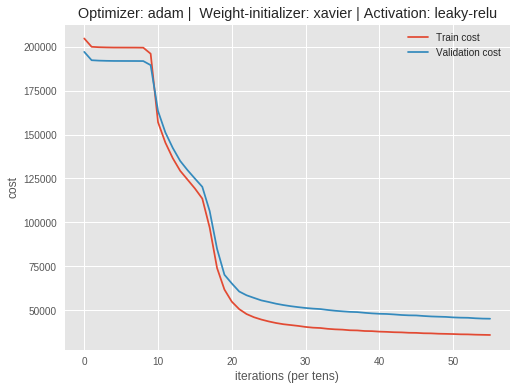

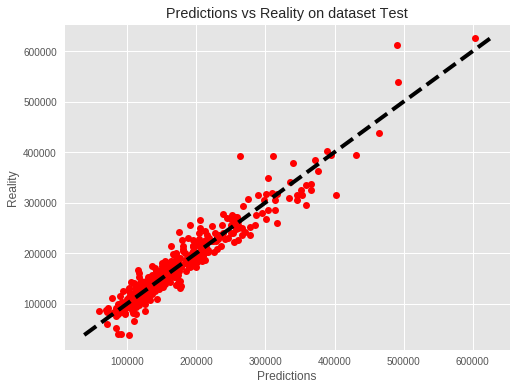

In [271]:
train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid)
plot_prediction(Y_valid, predict(X_valid, parameters))

<p><u>Plot-discussion</u><br><u>Learning-curve analysis</u><br>We can see that the prediction on validation-db is quite good for default values. Though it was obvious to have big dirrerence in between train and validation error and that was because of the way the features were engineered. In most cases we clustered similar features altogether before one-hot encoding. Therefore samples in a cluster or group are having similar feature-values. This will make the network to quickly learn the sale-price for less-diverse feature-values of train-dataset. But predicting the salePrice of validation dataset using that learned knowledge will not be closer enough to the actual saleprice. Therefore train-error will minimize early but validation-error will not. So by default the network should be over-fitting.This is because of the way we engineered the features.<br><br>Now in order to solve this problem the necessity of model-parameter tunning comes into account. We can decrease both train and validation accuracy by increasing the number of epochs. But it will only make the model more over-fitting. Therefore we need to tune the hyper-parameters in such a way that the error-difference in between train and validation decreases and the validation-error also reduces at the same time.<br><br><u>Prediction-accuracy analysis</u><br>From the second figure we see that the predictions are almost uniformly distributed along-side the marginal-line. But almost indeed. Not completely uniformly distributed. So there is still scope for tunning. We will now change the activation function to relu to see the effect</p>

Train RMS error: 10733.5349
Validation RMS error: 21403.5298
Train RMS Log error: 0.0572
Validation RMS Log error: 0.1351


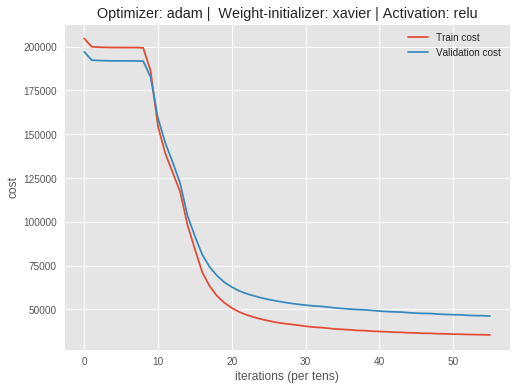

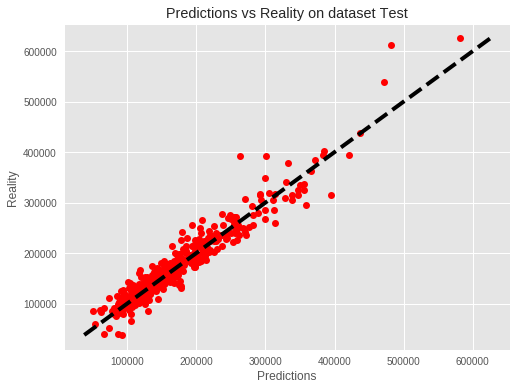

In [272]:
train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid,
                                                                   set_optimizer = 'adam',
                                                                   weight_initializer='xavier',
                                                                   hidden_activation='relu' )
plot_prediction(Y_valid, predict(X_valid, parameters))

<p><u>Plot-discussion</u>Now we can see that the validation error has decreased for using relu-activation instead of leaky-relu. From the second plot we observe that the sample-dots are more uniformly distributed and less-scattered than the previous plot. Now lets run a grid-search on the combinations of Optimizer, Weight-initializers and Activation-functions to find the best combination that reduces the validation-error to minimum maintaining significantly low error-difference in between train and validation.</p>

<p><br><u>About model-evaluation</u><br>
The outcome of evaluating a DNN model is provided within four different categories:<br>
    <ul>
      <li>Underfit – Validation and training error high</li>
    <li>Overfit – Validation error is high but training error low</li>
    <li>Good fit – Validation error low and slightly higher than the training error</li>
    <li>Unknown fit - Validation error low but training error high</li>
  </ul>
  <br><u>The get_fit_type Function</u><br>This function performs the task of model-evaluation. The function is designed in such way that the best-model estimated by this function also pervide a good kaggle-score. We want our kaggle-score to be atleast below 0.13 RMS-Log error. Therefore if any model scores above 0.13 RMS-Log error for both train and validation...it will be considered as under-fitted. The validation-error has to be below 0.13 and the error-difference in between train and validation has to be positive and below 1.0 for a good-fitted model. Otherwise the model is considered as over-fitted or unknown-fitted depending on whether the error-difference is negative or positive.
</p>

In [0]:
def get_fit_type(validation_rmsle, train_rmsle):
    fit_type = ''
    error_difference = validation_rmsle-train_rmsle
    if(error_difference < 0): 
        if((validation_rmsle > 0.13) & (train_rmsle > 0.13) ):fit_type = 'Under Fit'
        else: fit_type = 'Unknown Fit'  
    else:
        if((validation_rmsle > 0.13) & (train_rmsle > 0.13) ):fit_type = 'Under Fit'
        elif((validation_rmsle < 0.13) & (error_difference < 1.0)):fit_type = 'Good Fit'
        else: fit_type = 'Over Fit'
    return fit_type      

<p><u>The get_combinations Function</u><br>The function returns a dataFrame of all possible combinations along-with their train and validation errors and model-status. This is very effective to visualize the outcome of a grid-search. The combinations are sorted according to the validation-error in ascending order.</p>

In [0]:
def get_combinations(all_combinations,all_train_error,all_validation_error,
                     all_train_val_error_difference,model_status):
    pd.options.display.max_colwidth = 140
    parameter_combinations = pd.DataFrame(
        {'Combination': all_combinations,
         'Train-error': all_train_error,
         'Validation-error': all_validation_error,
         'Error-difference': all_train_val_error_difference,
         'Model-status': model_status
        })
    parameter_combinations = parameter_combinations[['Combination', 'Train-error','Validation-error',
                                                     'Error-difference','Model-status']]
    parameter_combinations = parameter_combinations.sort_values(by='Validation-error', ascending=True)
    return parameter_combinations

<p><u>The get_good_fitted_combinations Function</u><br>The function returns a dataFrame that contains only the good-fitted models. It also shows the total number of combinations and the number of only good-fitted combinations</p>

In [0]:
def get_good_fitted_combinations(parameter_combinations):
    print('Number of parameter-combinations: ',len(parameter_combinations))
    good_fits = parameter_combinations[parameter_combinations['Model-status']=='Good Fit']
    good_fits = good_fits.sort_values(by='Validation-error', ascending=True)
    print('Number of good-fitted parameter-combinations: ',len(good_fits))
    return good_fits

<p><br><u>Grid-search on Optimizer+Weight Initializer+Activation Function</u><br>Lets run a grid-search on different combinations of Optimizer and Weight Initializer and Activation Function. Then find the best combination that is good-fitted and reduces validation-error to minimum.</p>

In [0]:
 param_grid = {'Optimizer':['adam','RMS-Prop'],
              'Initializer':['xavier','random-normal'],
              'Activation':['relu','sigmoid','leaky-relu']}
grid = ParameterGrid(param_grid)
all_combinations = []
all_train_error = []
all_validation_error = []
all_train_val_error_difference = []
model_status = []
for params in grid:
    train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid,
                                                                     hidden_activation=params['Activation'],
                                                                     weight_initializer = params['Initializer'],
                                                                     show_result=False,plot_cost=False,
                                                                     set_optimizer = params['Optimizer'])
    all_combinations.append(str(list(params.values())))
    all_train_error.append(train_rmsle)
    all_validation_error.append(validation_rmsle)
    error_difference = validation_rmsle-train_rmsle
    all_train_val_error_difference.append(error_difference)
    model_status.append(get_fit_type(validation_rmsle, train_rmsle))
    
parameter_combinations = get_combinations(all_combinations,all_train_error,all_validation_error,
                                          all_train_val_error_difference,model_status)

In [277]:
parameter_combinations

Combination  Train-error  \
2             ['relu', 'random-normal', 'adam']       0.0455   
0                    ['relu', 'xavier', 'adam']       0.0565   
3         ['relu', 'random-normal', 'RMS-Prop']       0.0777   
8              ['leaky-relu', 'xavier', 'adam']       0.0784   
10      ['leaky-relu', 'random-normal', 'adam']       0.0910   
1                ['relu', 'xavier', 'RMS-Prop']       0.1421   
11  ['leaky-relu', 'random-normal', 'RMS-Prop']       0.1863   
9          ['leaky-relu', 'xavier', 'RMS-Prop']       0.1795   
5             ['sigmoid', 'xavier', 'RMS-Prop']       6.6922   
4                 ['sigmoid', 'xavier', 'adam']       6.7717   
7      ['sigmoid', 'random-normal', 'RMS-Prop']       6.8398   
6          ['sigmoid', 'random-normal', 'adam']       6.8611   

    Validation-error  Error-difference Model-status  
2             0.1290            0.0835     Good Fit  
0             0.1357            0.0792     Over Fit  
3             0.1379            0.0602     Over Fit  
8             0.1390            0.0606     Over Fit  
10            0.1443            0.0532     Over Fit  
1             0.1982            0.0561    Under Fit  
11            0.2057            0.0195    Under Fit  
9             0.2175            0.0380    Under Fit  
5             6.6681           -0.0240    Under Fit  
4             6.7477           -0.0240    Under Fit  
7             6.8158           -0.0240    Under Fit  
6             6.8372           -0.0239    Under Fit

<p>As we can see that the first combination (ID-2) has reduced both train and validation-errors to minimum. Also the error-difference in between train and validation is below 1.0 for this combination. This is also the only good-fitted combination. Lets choose the combination(ID-2) as final and apply it practically. </p>

Train RMS error: 8131.4790
Validation RMS error: 21088.6263
Train RMS Log error: 0.0463
Validation RMS Log error: 0.1292


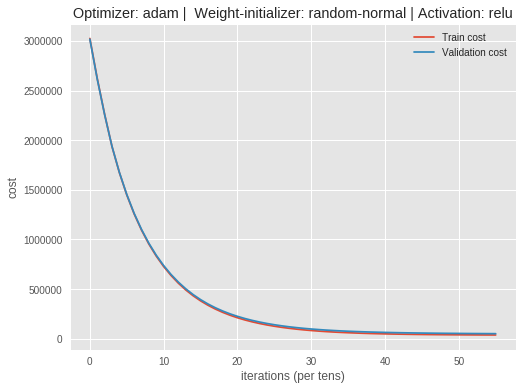

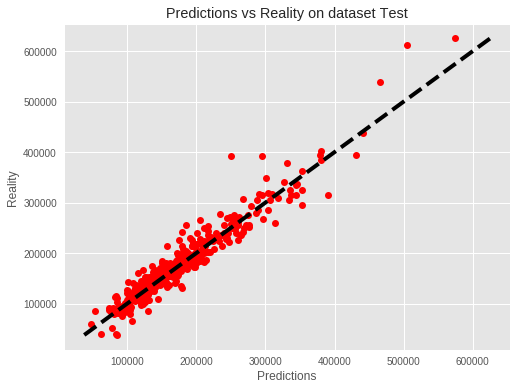

In [278]:
train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid,
                                                                   set_optimizer = 'adam',
                                                                   weight_initializer='random-normal',
                                                                   hidden_activation='relu' )
plot_prediction(Y_valid, predict(X_valid, parameters))

<p>Now we can see that the result has been improved. Both the train and validation errors have been decreased and the learning-curve has become very simplified. The errors have reduced significantly in the last iterations though the initial-errors were too high. This was due to the usage of random-normal activation.<br><br> From the second figure we can also see that the predictions are now more uniformly distributed along the marginal-line<br><br><u>Grid-Search on tunable Hyper-Parameters</u><br>Now lets apply another grid-search to find the best combination of the tunnable hyper-parameters that reduces the errors to the minimum. Now the grid-search will be performed by involving 3 parameters. One of them is the Keep_prob parameter that is used to handle the drop-out of hidden-neurons. Learn-rate and Decay of learning-rate(lr_decay)  are responsible for controlling the learning-speed. The higher the learning-rate the faster the model is but the more increase in error-rate.</p>

In [0]:
param_grid = {'keep_prob':[0.399,0.5,0.6,0.699,0.8,0.9,1.0],
              'learn-rate':[0.5e-2,1e-2,1.5e-2,2e-2,2.5e-2],
              'lr_decay':[0,0.01e-2,0.015e-2,0.02e-2,0.025e-2]}
grid = ParameterGrid(param_grid)
all_combinations = []
all_train_error = []
all_validation_error = []
all_train_val_error_difference = []
model_status = []
for params in grid:
    train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid,
                                                                       hidden_activation='relu',
                                                                       weight_initializer='random-normal', 
                                                                       set_optimizer = 'adam',
                                                                       keep_prob=params['keep_prob'],
                                                                       learning_rate=params['learn-rate'],
                                                                       print_cost=False, plot_cost=False,
                                                                       show_result=False,
                                                                       return_best=False,lr_decay=params['lr_decay'])
    all_combinations.append(str(params))
    all_train_error.append(train_rmsle)
    all_validation_error.append(validation_rmsle)
    error_difference = validation_rmsle-train_rmsle
    all_train_val_error_difference.append(error_difference)
    model_status.append(get_fit_type(validation_rmsle, train_rmsle))
parameter_combinations = get_combinations(all_combinations,all_train_error,all_validation_error,
                                          all_train_val_error_difference,model_status)

<p>Lets visualized a few combinations and see how well they are fitted</p>

In [287]:
parameter_combinations[16:22]

Combination  Train-error  \
157  {'keep_prob': 1.0, 'learn-rate': 0.01, 'lr_decay': 0.00015}       0.0463   
132  {'keep_prob': 0.9, 'learn-rate': 0.01, 'lr_decay': 0.00015}       0.0592   
156   {'keep_prob': 1.0, 'learn-rate': 0.01, 'lr_decay': 0.0001}       0.0464   
163  {'keep_prob': 1.0, 'learn-rate': 0.015, 'lr_decay': 0.0002}       0.0545   
171  {'keep_prob': 1.0, 'learn-rate': 0.025, 'lr_decay': 0.0001}       0.0628   
109  {'keep_prob': 0.8, 'learn-rate': 0.01, 'lr_decay': 0.00025}       0.0647   

     Validation-error  Error-difference Model-status  
157            0.1299            0.0836     Good Fit  
132            0.1299            0.0707     Good Fit  
156            0.1299            0.0835     Good Fit  
163            0.1300            0.0755     Over Fit  
171            0.1300            0.0672     Over Fit  
109            0.1303            0.0656     Over Fit

<p>So we can see that there are both good and over-fitted models in the dataFrame. Therefore lets visualize only good-fitted combinations</p>

In [288]:
good_fits = get_good_fitted_combinations(parameter_combinations)
good_fits[:10]

Number of parameter-combinations:  175
Number of good-fitted parameter-combinations:  19


Combination  \
160        {'keep_prob': 1.0, 'learn-rate': 0.015, 'lr_decay': 0}   
167   {'keep_prob': 1.0, 'learn-rate': 0.02, 'lr_decay': 0.00015}   
174  {'keep_prob': 1.0, 'learn-rate': 0.025, 'lr_decay': 0.00025}   
166    {'keep_prob': 1.0, 'learn-rate': 0.02, 'lr_decay': 0.0001}   
155         {'keep_prob': 1.0, 'learn-rate': 0.01, 'lr_decay': 0}   
165         {'keep_prob': 1.0, 'learn-rate': 0.02, 'lr_decay': 0}   
172  {'keep_prob': 1.0, 'learn-rate': 0.025, 'lr_decay': 0.00015}   
164  {'keep_prob': 1.0, 'learn-rate': 0.015, 'lr_decay': 0.00025}   
161   {'keep_prob': 1.0, 'learn-rate': 0.015, 'lr_decay': 0.0001}   
159   {'keep_prob': 1.0, 'learn-rate': 0.01, 'lr_decay': 0.00025}   

     Train-error  Validation-error  Error-difference Model-status  
160       0.0546            0.1284            0.0738     Good Fit  
167       0.0595            0.1286            0.0691     Good Fit  
174       0.0626            0.1289            0.0662     Good Fit  
166       0.0593            0.1290            0.0697     Good Fit  
155       0.0455            0.1291            0.0836     Good Fit  
165       0.0602            0.1291            0.0689     Good Fit  
172       0.0623            0.1291            0.0668     Good Fit  
164       0.0544            0.1291            0.0747     Good Fit  
161       0.0546            0.1292            0.0746     Good Fit  
159       0.0449            0.1292            0.0843     Good Fit

<p>As we can see that the first combination (ID-160) has reduced the validation-error to minimum. Also the error-difference in between train and validation is below 1.0 for this combination. Lets choose the combination as final and use it for further evaluation. <br><br><u>Grid-Search on Regularization-beta Constant</u></p>

In [0]:
param_grid = {'l2_beta':list(range(20))[1:]}
grid = ParameterGrid(param_grid)
all_combinations = []
all_train_error = []
all_validation_error = []
all_train_val_error_difference = []
model_status = []
for params in grid:
    train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid,
                                                                       hidden_activation='relu',
                                                                       weight_initializer='random-normal', 
                                                                       set_optimizer = 'adam',
                                                                       keep_prob=1,
                                                                       learning_rate=0.015,
                                                                       lr_decay=0,
                                                                       print_cost=False, plot_cost=False,
                                                                       show_result=False,
                                                                       l2_beta=params['l2_beta'],return_best=False)
    all_combinations.append(str(params))
    all_train_error.append(train_rmsle)
    all_validation_error.append(validation_rmsle)
    error_difference = validation_rmsle-train_rmsle
    all_train_val_error_difference.append(error_difference)
    model_status.append(get_fit_type(validation_rmsle, train_rmsle))
parameter_combinations = get_combinations(all_combinations,all_train_error,all_validation_error,
                                          all_train_val_error_difference,model_status)

<p>Lets discover only the good-fitted combinations</p>

In [290]:
good_fits = get_good_fitted_combinations(parameter_combinations)
good_fits[:10]

Number of parameter-combinations:  19
Number of good-fitted parameter-combinations:  3


Combination  Train-error  Validation-error  Error-difference  \
9   {'l2_beta': 10}       0.0547            0.1288            0.0741   
10  {'l2_beta': 11}       0.0638            0.1297            0.0659   
8    {'l2_beta': 9}       0.0436            0.1298            0.0862   

   Model-status  
9      Good Fit  
10     Good Fit  
8      Good Fit

<p>As we can see that the first combination (ID-9) has reduced the validation-error to minimum. It is also one of the good-fitted models. Lets choose the combination as final and use it for further evaluation.<br><br><u>Grid-search on number of neurons in hidden-layer and number of epochs</u><br>Now lets focus on the network architecture one more time. This time we will play with the number of neurons and epochs. We will run another small grid-search for these two parameters only to figure out the best combination of them that minimizes the validation error. All previously tunned parameters will be kept constant according to the values of the best combinations.The default minibatch-size-1 has been kept constant all over the tunning process. </p>

In [0]:
param_grid = {'hidden_neurons':[300,399,500,600,699,800,900,1000],
              'num_epochs':[300,500,699,800,1000,1500,2000]}
grid = ParameterGrid(param_grid)
all_combinations = []
all_train_error = []
all_validation_error = []
all_train_val_error_difference = []
model_status = []
for params in grid:
    train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid,
                                                                       hidden_activation='relu',
                                                                       weight_initializer='random-normal', 
                                                                       set_optimizer = 'adam',
                                                                       keep_prob=1.0,learning_rate=0.015,
                                                                       num_epochs = params['num_epochs'],
                                                                       print_cost=False, plot_cost=False,
                                                                       show_result=False,
                                                                       l2_beta=10,return_best=False,lr_decay=0,
                                                                       hidden_neurons = params['hidden_neurons'])
    all_combinations.append(str(params))
    all_train_error.append(train_rmsle)
    all_validation_error.append(validation_rmsle)
    error_difference = validation_rmsle-train_rmsle
    all_train_val_error_difference.append(error_difference)
    model_status.append(get_fit_type(validation_rmsle, train_rmsle))
parameter_combinations = get_combinations(all_combinations,all_train_error,all_validation_error,
                                          all_train_val_error_difference,model_status)

<p>Lets discover only the good-fitted combinations</p>

In [301]:
good_fits = get_good_fitted_combinations(parameter_combinations)
good_fits[:10]

Number of parameter-combinations:  56
Number of good-fitted parameter-combinations:  36


Combination  Train-error  \
48   {'hidden_neurons': 900, 'num_epochs': 2000}       0.0849   
41   {'hidden_neurons': 800, 'num_epochs': 2000}       0.0850   
34   {'hidden_neurons': 699, 'num_epochs': 2000}       0.0841   
54  {'hidden_neurons': 1000, 'num_epochs': 1500}       0.0829   
47   {'hidden_neurons': 900, 'num_epochs': 1500}       0.0821   
13   {'hidden_neurons': 399, 'num_epochs': 2000}       0.0819   
27   {'hidden_neurons': 600, 'num_epochs': 2000}       0.0838   
20   {'hidden_neurons': 500, 'num_epochs': 2000}       0.0822   
40   {'hidden_neurons': 800, 'num_epochs': 1500}       0.0813   
55  {'hidden_neurons': 1000, 'num_epochs': 2000}       0.0849   

    Validation-error  Error-difference Model-status  
48            0.1256            0.0406     Good Fit  
41            0.1257            0.0407     Good Fit  
34            0.1258            0.0417     Good Fit  
54            0.1260            0.0431     Good Fit  
47            0.1261            0.0440     Good Fit  
13            0.1261            0.0443     Good Fit  
27            0.1264            0.0427     Good Fit  
20            0.1265            0.0443     Good Fit  
40            0.1266            0.0453     Good Fit  
55            0.1266            0.0417     Good Fit

<p>Now this grid-search was very crucial. As we can see that the 1st combination of ID-48  has the lowest validation-error. Though its train-error is not the minimum but is actually a good sign. Because due the rise of train-error the error-difference in between train and validation has been minimum. This is what we want most. As the lowest error-difference means the model is the best fitted to the data. The more the error-difference the more the model will over-fit the train-data. So the 1st combination of ID-48 is considered as the best one. Lets see the performance of the currently tunned model practically </p>

Train RMS error: 15215.6875
Validation RMS error: 20413.9086
Train RMS Log error: 0.0855
Validation RMS Log error: 0.1259


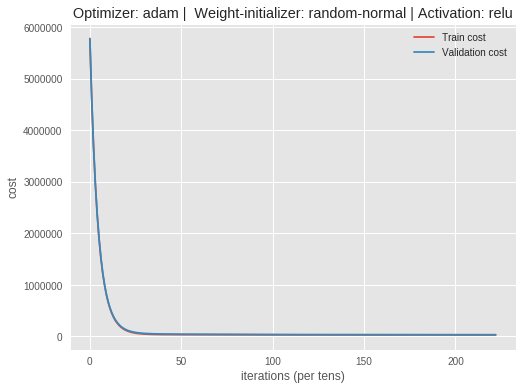

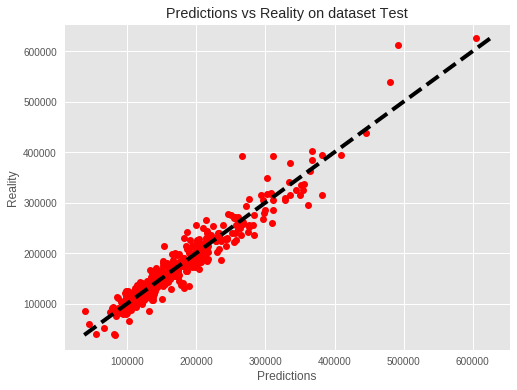

In [302]:
train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid,
                                                                   hidden_activation='relu',
                                                                   weight_initializer='random-normal',
                                                                   set_optimizer = 'adam',
                                                                   keep_prob=1.0,learning_rate=0.015,
                                                                   num_epochs = 2000,
                                                                   print_cost=False, plot_cost=True,
                                                                   show_result=True,l2_beta=10,
                                                                   return_best=False,lr_decay=0.0,
                                                                   hidden_neurons = 900)
plot_prediction(Y_valid, predict(X_valid, parameters))

<p>As we can see that both train and validation error-curves are so close that they are almost over-lapping one another. The 2nd figure is showing that predictions are now very unifomly distributed alongside the marginal line.This is the best what we have got until now. Its time to predict the test data and generate the submission file</p>

In [304]:
# PRINT FILE-NAME IF NECESSARY
print('File-Name: ',submission_name)

# GET PREDICTIONS
prediction = list(map(lambda val: float(val), predict(test_pre, parameters)))

# GENERATE SUBMISSION-FILE
output_submission(test_ID, prediction, 'Id', 'SalePrice', submission_name)

File-Name:  tr_cost-15215.69-vd_cost20413.91-l210-lr0.015-ly[339, 900, 900, 1]-epoch2000.csv
Preparing submission file...
File Ready


####Lets see the kaggle Score

<img src="a.png" alt="Kaggle-result"><br>
<p>So we can see that the kaggle score for this DNN model is 0.12856 which is below 0.13 but still pretty low. Scores of some more submissions taught us the following things-
  <ul><u>0.1</u> The current network has over-fitted the train data. Therefore in order to simplify the network we had to reduce the number of epochs as well as hidden-neurons by around 50%.</ul>
  <ul><u>0.2</u> As the model is already tunned now, there is no need to keep the validation-data apart. We will keep only 1% of train-data as validation just to monitor the system. Almost all the data will be used for training from now on. Lets dig in.</ul><br>
  <u>Keeping only 1% of train-data as validation and predict test-data</u></p>

Train RMS error: 15640.3674
Validation RMS error: 12051.8427
Train RMS Log error: 0.0894
Validation RMS Log error: 0.0983


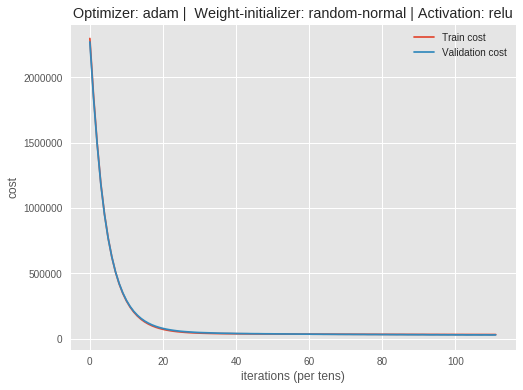

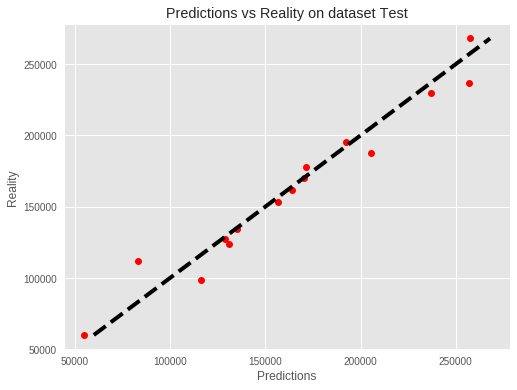

In [306]:
X_train, X_valid, Y_train, Y_valid = train_test_split(train_pre, train_raw_labels, test_size=0.01, random_state=1) 
train_rmsle, validation_rmsle, parameters, submission_name = model(X_train, Y_train, X_valid, Y_valid,
                                                                   hidden_activation='relu',
                                                                   weight_initializer='random-normal',
                                                                   set_optimizer = 'adam',
                                                                   keep_prob=1.0,learning_rate=0.015,
                                                                   num_epochs = 1000,
                                                                   print_cost=False, plot_cost=True,
                                                                   show_result=True,l2_beta=10,
                                                                   return_best=False,lr_decay=0,
                                                                   hidden_neurons = 500)
plot_prediction(Y_valid, predict(X_valid, parameters))

In [307]:
prediction = list(map(lambda val: float(val), predict(test_pre, parameters)))
output_submission(test_ID, prediction, 'Id', 'SalePrice', submission_name)
print('File-Name: ',submission_name)

Preparing submission file...
File Ready
File-Name:  tr_cost-15640.37-vd_cost12051.84-l210-lr0.015-ly[339, 500, 500, 1]-epoch1000.csv


####Kaggle score updated
<img src="b.png" alt="Kaggle-result"><br>
<p>So now we can see that all our efforts were not in vain indeed. The accuracy has increased and kaggle-score has improved. The current kaggle score for this DNN model is 0.12380 which is far better than the previous one.<br><br><u>Ensembling Multiple DNN models</u><br>At this stage we have our completely tunned DNN model that was tunned using the best hyper-parameters from grid-search. But there were other combinations too that worked significantly well. Therefore they also have the potential to work well on test-data too. Lets predict the test-data for top 3 combinations of keep-prob and learn-rate. And then ensemble their results altogether as our final submission to kaggle. </p>

<p>Combination2: ID-174	{'keep_prob': 1.0, 'learn-rate': 0.02, 'lr_decay': 0.00015}</p>

In [308]:
train_rmsle, validation_rmsle, parameters2, submission_name = model(X_train, Y_train, X_valid, Y_valid,
                                                                    hidden_activation='relu',
                                                                    weight_initializer='random-normal',
                                                                    set_optimizer = 'adam',
                                                                    keep_prob=1,learning_rate=0.02,
                                                                    num_epochs = 1000,
                                                                    print_cost=False, plot_cost=False,
                                                                    show_result=True,
                                                                    l2_beta=10,return_best=False,
                                                                    lr_decay=0.00015,hidden_neurons = 500)
prediction2 = list(map(lambda val: float(val), predict(test_pre, parameters2)))

Train RMS error: 15933.7083
Validation RMS error: 12379.0148
Train RMS Log error: 0.0906
Validation RMS Log error: 0.1026


<p>Combination3: ID-174	{'keep_prob': 1.0, 'learn-rate': 0.025, 'lr_decay': 0.00025}</p>

In [309]:
train_rmsle, validation_rmsle, parameters3, submission_name = model(X_train, Y_train, X_valid, Y_valid,
                                                                    hidden_activation='relu',
                                                                    weight_initializer='random-normal',
                                                                    set_optimizer = 'adam',
                                                                    keep_prob=1,learning_rate=0.025,
                                                                    num_epochs = 1000,
                                                                    print_cost=False, plot_cost=False,
                                                                    show_result=True,
                                                                    l2_beta=10,return_best=False,
                                                                    lr_decay=0.00025,hidden_neurons = 500)
prediction3 = list(map(lambda val: float(val), predict(test_pre, parameters3)))

Train RMS error: 16030.3788
Validation RMS error: 12602.9838
Train RMS Log error: 0.0911
Validation RMS Log error: 0.1072


<p>Now all these 3 predictions from 3 models were ensembled altogether. Multiple ensembling-ratio were tested and the following combination was found to be the best among the tested ones.</p>

In [310]:
ensemble =  np.multiply(prediction,  (0.95))+ \
            np.multiply(prediction2, (0.03))+ \
            np.multiply(prediction3, (0.02))
output_submission(test_ID, ensemble, 'Id', 'SalePrice', submission_name)

Preparing submission file...
File Ready


####Kaggle score updated Again
<img src="c.png" alt="Kaggle-result"><br>
<p>As we can see now that the kaggle score has been improved by a bit because of ensembling.  This combined model has scored 0.12343 which is better than any other previous scores. So the network still has the potential to improve its score. This is the best until now from one DNN architecture developed from scratch using low-level APIs of TensorFlow. </p>

<p>The best result achieved from the DNN model was further ensembled with other regressor models described earlier. My best position at kaggle was 473 with score 0.1155</p>

<img src="d.png" alt="Kaggle-result">

##Step 13 Conclusion

<p>
Some points to be noted:<br><br>

1. I highly focused on the feature-engineering section and manually engineered each and every feature to gather in-depth knowledge and minimize computational complexity. Therefore the section became very descriptive at the end.<br><br>

2. While writing this notebook, I was inspired from several Kaggle kernels. These kernels are listed here:<br>
a. https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard<br>
b. https://www.kaggle.com/zoupet/neural-network-model-for-house-prices-tensorflow<br>
c. https://github.com/dimitreOliveira/HousePrices
<br><br>



--Thanks a lot for viewing<br><br></p>